# 1. Import Data & Libraries

In [1]:
import pandas as pd
import numpy as np

# from ydata_profiling import ProfileReport

# viz
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

import functions as f

**Data**

In [2]:
df = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', 
                 sep = ';', index_col = 'ID')
df

Nationality   Age  DaysSinceCreation  \
ID                                            
1              PRT  52.0                440   
2              PRT   NaN               1385   
3              DEU  32.0               1385   
4              FRA  61.0               1385   
5              FRA  52.0               1385   
...            ...   ...                ...   
111729         DEU  31.0                 36   
111730         BRA  43.0                 36   
111731         BRA  37.0                 36   
111732         DEU  48.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
1       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111730  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111732  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
1       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111730  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111732  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
1               292.00          82.3                 1                 0   
2               280.00          53.0                 0                 0   
3                 0.00           0.0                 0                 0   
4               240.00          60.0                 0                 0   
5                 0.00           0.0                 0                 0   
...                ...           ...               ...               ...   
111729            0.00           0.0                 0                 0   
111730          755.25          20.0                 0                 0   
111731            0.00           0.0                 0                 0   
111732          708.00         185.0                 0                 0   
111733            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
1                       2              6           4              Corporate   
2                       1             10           5  Travel Agent/Operator   
3                       0              0           0  Travel Agent/Operator   
4                       1             10           5  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
...                   ...            ...    

# 2. Data Exploration

Profiling Report

In [3]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

- 89 (0.1%) duplicates
- 5173 (0.2%) missing
- many imbalanced variables 
- high % of zeros in some variables

<br>

**2.1 Duplicate Records**

Before going deep into the data analysis, it is important to verify if there are any duplicate rows in the dataset to mantain data integrity. Since `ID` was successfully set as the index, in the data importation,  we know it has no duplicate values. If duplicates were found for this specific column, setting it as the index would not have been possible.

However, eventhough `ID` had no duplicates, duplicate records of the same row might still exist in the dataset. To detect such cases, we can examine by the feature `DocIDHash` as this represents the HASH of the customer's personal idenitification number and this is unique to each individual.

In [4]:
df[df.duplicated(keep = False)]

Nationality   Age  DaysSinceCreation  \
ID                                            
594            ROU  38.0               1365   
595            ROU  38.0               1365   
701            BRA  26.0               1359   
702            BRA  26.0               1359   
1110           PRT   NaN               1345   
...            ...   ...                ...   
107561         PRT   NaN                 69   
108604         PRT   NaN                 61   
108605         PRT   NaN                 61   
110574         PRT   NaN                 46   
110575         PRT   NaN                 46   

                                                 NameHash  \
ID                                                          
594     0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
595     0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
701     0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
702     0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
1110    0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...   
...                                                   ...   
107561  0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...   
108604  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
108605  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
110574  0xB6280A5EAA35679770D4163A08B96851ED16236559DB...   
110575  0xB6280A5EAA35679770D4163A08B96851ED16236559DB...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
594     0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
595     0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
701     0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
702     0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
1110                                                  NaN                0   
...                                                   ...              ...   
107561                                                NaN                0   
108604                                                NaN                0   
108605                                                NaN                0   
110574                                                NaN                0   
110575                                                NaN                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
594                0.0           0.0                 0                 0   
595                0.0           0.0                 0                 0   
701                0.0           0.0                 0                 0   
702                0.0           0.0                 0                 0   
1110               0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
107561             0.0           0.0                 0                 0   
108604             0.0           0.0                 0                 0   
108605             0.0           0.0                 0                 0   
110574             0.0           0.0                 0                 0   
110575             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
594                     0              0           0  Travel Agent/Operator   
595                     0              0           0  Travel Agent/Operator   
701                     0              0           0              Corporate   
702                     0              0           0              Corporate   
1110                    0              0           0  Travel Agent/Operator   
...                   ...            ...    

In [5]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 111


From the output above, we can identify two scenarios:

- **Duplicate Individuals**: 111 individuals appear twice in the dataset. Since these are redundant records, we can solve this by keeping only one row of each duplicate

- **Missing Identification Data**: some individuals have no information about their hash identification number

Given these insights we will proceed to remove those 111 rows from the dataset, but will be deleted in the section `3. Data Cleaning and Preprocessing`. Regarding, the existence of missing data it will be further explored.

<br>


**2.2 Exploring the dataset structure with .info() method**

The `.info()` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

From the output above, we can identify the following:

- **Missing Values**: There exists missing data in features `Age` and `DocIDHash` (as identified previously)
- **Data Types**: 23 features are numerical (3 continuous and 20 discrete) and 5 are categorical

# Antonio que fez

In [7]:
# Loop through each column in the DataFrame
for column in df.columns:
    
    # Check if the number of unique values in the column is less than 9
    if df[column].nunique() < 9:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(f"Number of unique values: {df[column].nunique()}\n")

Unique values in 'BookingsCanceled': [ 1  0  3  2  4 15  7  5]
Number of unique values: 8

Unique values in 'BookingsNoShowed': [0 1 2 3]
Number of unique values: 4

Unique values in 'DistributionChannel': ['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
Number of unique values: 4

Unique values in 'MarketSegment': ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Number of unique values: 7

Unique values in 'SRHighFloor': [0 1]
Number of unique values: 2

Unique values in 'SRLowFloor': [0 1]
Number of unique values: 2

Unique values in 'SRAccessibleRoom': [0 1]
Number of unique values: 2

Unique values in 'SRMediumFloor': [0 1]
Number of unique values: 2

Unique values in 'SRBathtub': [0 1]
Number of unique values: 2

Unique values in 'SRShower': [0 1]
Number of unique values: 2

Unique values in 'SRCrib': [0 1]
Number of unique values: 2

Unique values in 'SRKingSizeBed': [0 1]
Number of unique values: 2

Unique values in 'SRTwinB

<br>

**2.3 Descriptive statistics**

By using the `describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. By examining these statistics, we can gain the first insights into the distribution of the data, helping to identify anomalies.

**2.3.1 Numerical Features**

By default, the `.describe()` method focuses on the numerical features of the dataset. We will begin our analysis with these features to gain insights into their characteristics and distributions. Eventhough, binary features are categorical, these are also included in this method and will be analysed in this section.

In [8]:
df.describe()

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
count  107561.000000      111733.000000    111733.000000   111733.000000   
mean       45.639191         595.026599        60.833147      283.851283   
std        17.244952         374.657382        85.115320      379.131556   
min       -10.000000          36.000000        -1.000000        0.000000   
25%        33.000000         288.000000         0.000000        0.000000   
50%        47.000000         522.000000        21.000000      208.000000   
75%        58.000000         889.000000        95.000000      393.300000   
max       123.000000        1385.000000       588.000000    21781.000000   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
count  111733.000000     111733.000000     111733.000000      111733.000000   
mean       64.682802          0.002282          0.000600           0.737607   
std       123.580715          0.080631          0.028217           0.730889   
min         0.000000          0.000000          0.000000           0.000000   
25%         0.000000          0.000000          0.000000           0.000000   
50%        31.000000          0.000000          0.000000           1.000000   
75%        84.000000          0.000000          0.000000           1.000000   
max      8859.250000         15.000000          3.000000          76.000000   

       PersonsNights     RoomNights    SRHighFloor     SRLowFloor  \
count  111733.000000  111733.000000  111733.000000  111733.000000   
mean        4.328318       2.203825       0.042512       0.001307   
std         4.630739       2.301637       0.201755       0.036125   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         4.000000       2.000000       0.000000       0.000000   
75%         6.000000       3.000000       0.000000       0.000000   
max       116.000000     185.000000       1.000000       1.000000   

       SRAccessibleRoom  SRMediumFloor      SRBathtub       SRShower  \
count     111733.000000  111733.000000  111733.000000  111733.000000   
mean           0.000224       0.000770       0.003132       0.001629   
std            0.014957       0.027733       0.055881       0.040327   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       0.000000       0.000000       0.000000   
75%            0.000000       0.000000       0.000000       0.000000   
max            1.000000       1.000000       1.000000       1.000000   

              SRCrib  SRKingSizeBed      SRTwinBed  SRNearElevator  \
count  111733.000000  111733.000000  111733.000000   111733.000000   
mean        0.016181       0.363268       0.156811        0.000331   
std         0.126173       0.480943       0.363624        0.018195   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.000000       1.000000       0.000000        0.000000   
max         1.000000       1.000000       1.000000        1.000000   

       SRAwayFromElevator  SRNoAlcoholInMiniBar    SRQuietRoom  
count       111733.000000         111733.000000  111733.000000  
mean             0.003598              0.000197       0.087718  
std              0.059874              0.014031       0.282886  
min              0.000000              0.000000       0.000000  
25%              0.000000              0.000000       0.000000  
50%              0.000000              0.000000       0.000000  
75%              0.000000              0.000000       0.000000  
max              1.000000              1.000000       1.000000

<br>

Observations:

- `Age`: The ages of customers range from a minimum of -10 to a maximum of 123, suggesting incoeherences. The average customer age is approximately 45.64 years, with a standard deviation of 17.24, indicating a broad age distribution. Notably, 50% of customers are aged 47 or younger, while 75% are below 58 years old, showing that the majority of guests are middle-aged adults.

- `DaysSinceCreation`: The number of days since account creation spans from 36 to 1,385 days since the date of dataset creation. 

- `AverageLeadTime`: The average lead time for bookings is around 60.89 days, though this varies widely, reaching up to 588 days (these ones are probably a customer on holiday). The minimum number of days appear as -1 and this is impossible, which suggests data inconsistency. Interesting to see that, 25% of the customers do the booking on the same day of the arrival, suggesting that these customers might be corporate customers.

- `LodgingRevenue`: Lodging revenue per customer varies significantly, with a mean of 284.10 monetary units and a standard deviation of 379.23 monetary units. 25% of the customers do not generate revenue, maybe this occurs due to cancellations or data inconsistency. The maximum revenue per customer obtained is 21 781 monetary units, this can be a potential outlier, eventhough it is a true value it is higher than the majority of values.

- `OtherRevenue`: 25% of customers do not spend on other expenses, besides the room. The maximum number of revenue is 8859 monetary units per customer and this can, also, be a potential outlier with the same reason as in `LodgingRevenue`.

- `BookingsCanceled` and `BookingsNoShowed`: When it comes to booking behavior, cancellations and no-shows are relatively rare, with an average of just 0.002 and 0.0006 per customer, respectively. 

- `BookingsCheckedIn`, `PersonsNights` and `RoomNights` have highly skewed distributions that can be identified by the difference between values in the maximum value and the third quartile. These values might indicate the exostence of outliers (as they could reflect unique customer segments, such as loyal customers) 

Regarding special requests, the most common request is alcohol in the bar (most all of the customers), followed by a king-size bed (36.35% of customers) and twin beds (15.69%). Requests for high-floor rooms (4.25%) are more frequent than those for low-floor rooms (0.13%), while accessibility-related requests, such as cribs or wheelchair-friendly rooms, are relatively rare. Only 0.36% of customers request rooms near the elevator and 8.8% request rooms far away from the noise. 

# António que fez

In [9]:
df.describe().T

count        mean         std   min    25%    50%  \
Age                   107561.0   45.639191   17.244952 -10.0   33.0   47.0   
DaysSinceCreation     111733.0  595.026599  374.657382  36.0  288.0  522.0   
AverageLeadTime       111733.0   60.833147   85.115320  -1.0    0.0   21.0   
LodgingRevenue        111733.0  283.851283  379.131556   0.0    0.0  208.0   
OtherRevenue          111733.0   64.682802  123.580715   0.0    0.0   31.0   
BookingsCanceled      111733.0    0.002282    0.080631   0.0    0.0    0.0   
BookingsNoShowed      111733.0    0.000600    0.028217   0.0    0.0    0.0   
BookingsCheckedIn     111733.0    0.737607    0.730889   0.0    0.0    1.0   
PersonsNights         111733.0    4.328318    4.630739   0.0    0.0    4.0   
RoomNights            111733.0    2.203825    2.301637   0.0    0.0    2.0   
SRHighFloor           111733.0    0.042512    0.201755   0.0    0.0    0.0   
SRLowFloor            111733.0    0.001307    0.036125   0.0    0.0    0.0   
SRAccessibleRoom      111733.0    0.000224    0.014957   0.0    0.0    0.0   
SRMediumFloor         111733.0    0.000770    0.027733   0.0    0.0    0.0   
SRBathtub             111733.0    0.003132    0.055881   0.0    0.0    0.0   
SRShower              111733.0    0.001629    0.040327   0.0    0.0    0.0   
SRCrib                111733.0    0.016181    0.126173   0.0    0.0    0.0   
SRKingSizeBed         111733.0    0.363268    0.480943   0.0    0.0    0.0   
SRTwinBed             111733.0    0.156811    0.363624   0.0    0.0    0.0   
SRNearElevator        111733.0    0.000331    0.018195   0.0    0.0    0.0   
SRAwayFromElevator    111733.0    0.003598    0.059874   0.0    0.0    0.0   
SRNoAlcoholInMiniBar  111733.0    0.000197    0.014031   0.0    0.0    0.0   
SRQuietRoom           111733.0    0.087718    0.282886   0.0    0.0    0.0   

                        75%       max  
Age                    58.0    123.00  
DaysSinceCreation     889.0   1385.00  
AverageLeadTime        95.0    588.00  
LodgingRevenue        393.3  21781.00  
OtherRevenue           84.0   8859.25  
BookingsCanceled        0.0     15.00  
BookingsNoShowed        0.0      3.00  
BookingsCheckedIn       1.0     76.00  
PersonsNights           6.0    116.00  
RoomNights              3.0    185.00  
SRHighFloor             0.0      1.00  
SRLowFloor              0.0      1.00  
SRAccessibleRoom        0.0      1.00  
SRMediumFloor           0.0      1.00  
SRBathtub               0.0      1.00  
SRShower                0.0      1.00  
SRCrib                  0.0      1.00  
SRKingSizeBed           1.0      1.00  
SRTwinBed               0.0      1.00  
SRNearElevator          0.0      1.00  
SRAwayFromElevator      0.0      1.00  
SRNoAlcoholInMiniBar    0.0      1.00  
SRQuietRoom             0.0      1.00

- weird age min & max
- missing val in age
- AverageLeadTime = -1 ?
- RoomNights w/ very high max
- PersonsNights w/ very high max
- if RoomNights = 0 and PersonsNights = 0 the person did not stay in the hotel (?)

<br>

**2.3.2 Categorical Features**

Next, we will analyze the statistics for the categorical data. To do this, we will use the include parameter and set it to object. This will generate a summary that includes the count of entries, the number of unique values, the most frequent value, and the frequency of that top value for each categorical column.

In [10]:
df.describe(include=object)

Nationality                                           NameHash  \
count       111733                                             111733   
unique         199                                             107584   
top            FRA  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
freq         16516                                                 75   

                                                DocIDHash  \
count                                              110732   
unique                                             103480   
top     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   
freq                                                 3032   

          DistributionChannel MarketSegment  
count                  111733        111733  
unique                      4             7  
top     Travel Agent/Operator         Other  
freq                    91019         63680

To better understand the results, we will display the unique values for each categorical column.

In [11]:
for column in ['DistributionChannel', 'MarketSegment']:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in DistributionChannel: ['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
Unique values in MarketSegment: ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']


- `Nationality`: Most of the customers of the hotel are french.
- `DistributionChannel`: 91019 customers (this number might be lower due to duplicate values) book their rooms using travel agents. 
- `MarketSegment`: Other is the most common customer segmentation.

# Antonio que fez

In [12]:
df.describe(include='object').T

count  unique  \
Nationality          111733     199   
NameHash             111733  107584   
DocIDHash            110732  103480   
DistributionChannel  111733       4   
MarketSegment        111733       7   

                                                                   top   freq  
Nationality                                                        FRA  16516  
NameHash             0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...     75  
DocIDHash            0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   3032  
DistributionChannel                              Travel Agent/Operator  91019  
MarketSegment                                                    Other  63680

- DistributionChannel, MarketSegment --> encode
- Nationality - ?
- NameHash, DocIDHash - too many uniques, discard
- missing val in DocIDHash

<br>

**2.4 Missing Data Analysis**

In our previous analysis, we identified that some columns contain missing values. To further investigate, we will explore it using a function called `missing_value_summary`, which provides insights by displaying the number of unique values in each feature with missing data, the total count of missing values, and their percentage relative to the entire dataset.

In [13]:
f.missing_value_summary(df)

Unique Values  NaN Values  Percentage NaN
Age                  106        4172        3.733901
DocIDHash         103480        1001        0.895886

Approximately 4% of customer ages are missing, affecting 4172 customers. Additionally, 0.90% (1001 customers) are missing the hashed customer identification number. Again, these values might be substantially lower given the existence of 111 duplicated customers.

We can visualize and analyse missing values by using the library missingno. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data.

<br>

`Missingno` Bar Plot

Below we have plotted the count of values per column, organized in ascending order. This means that columns with the lowest values are positioned first, followed by those with higher counts.

<Axes: >

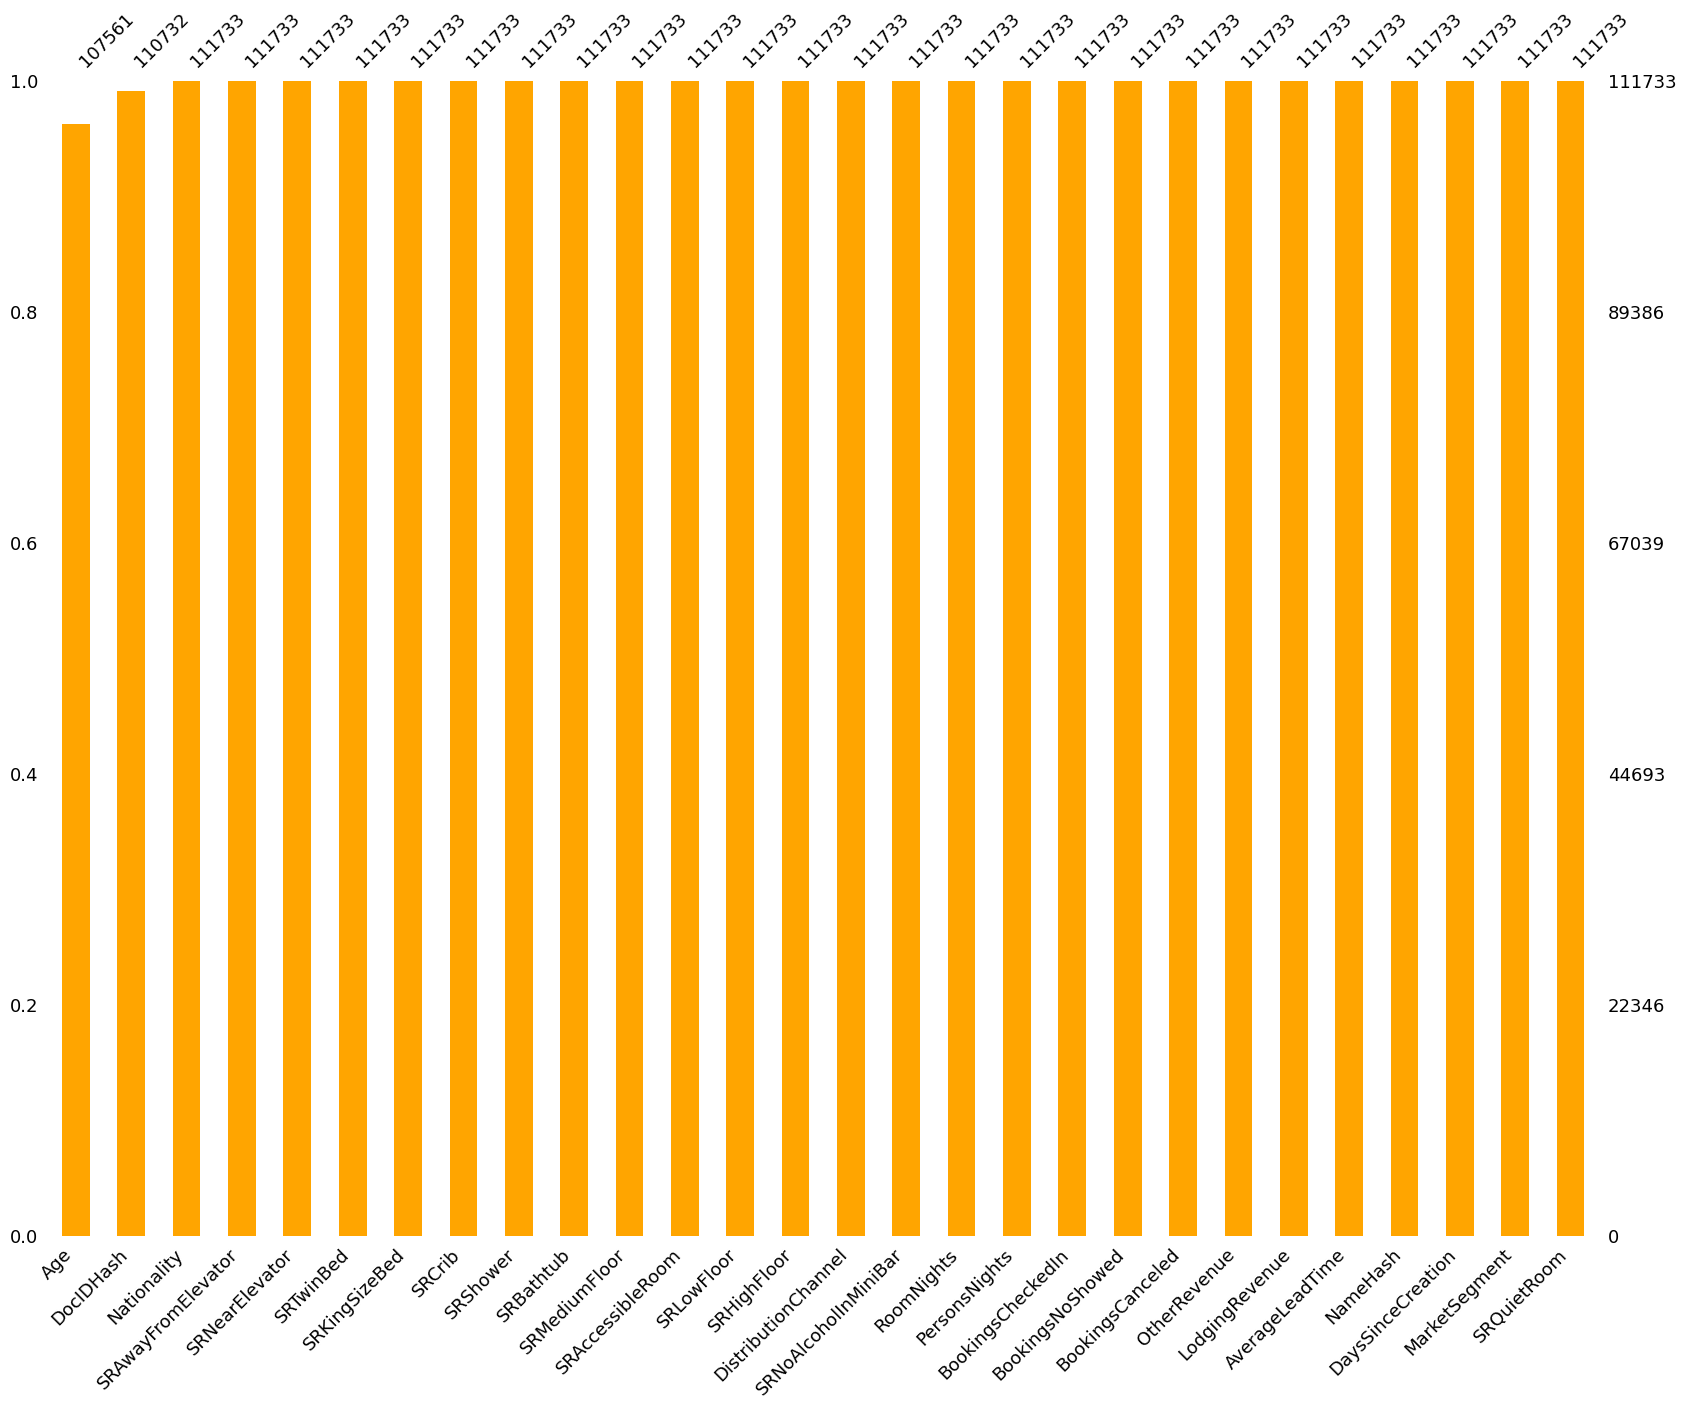

In [14]:
msno.bar(df, figsize=(20,15), fontsize=13, color='orange', sort="ascending")

As it can be seen and as mentioned previously, we can see that the columns `Age` and `DocIDHah` exhibit missing values. These two variables have a relatively low percentage of missing data, with less than 5% of their values missing.

<br>

`Missingno` Heatmap visualization

We can also use the missingno library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, while one column has missing values the other has not. Values around zero indicate no significant correlation between the missing data between two columns.

<Axes: >

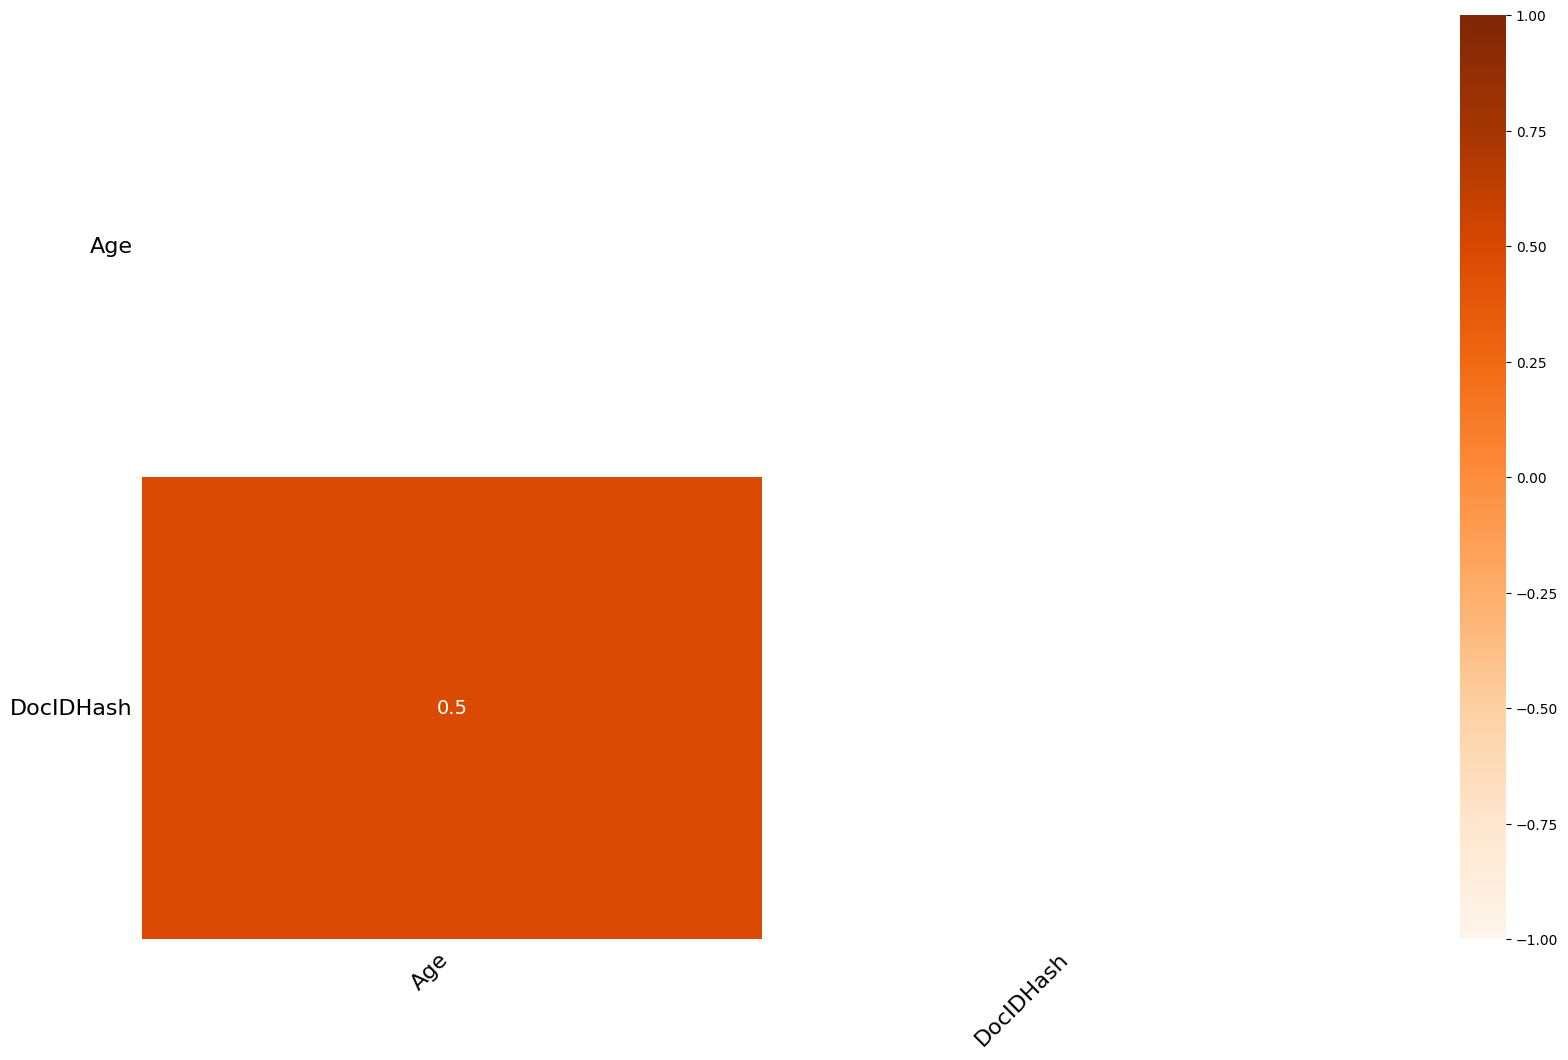

In [15]:
msno.heatmap(df, cmap='Oranges')

From the heatmap, we can conclude that whenever `Age` is missing, there is a probability of 50% that `DocIDHash` is also missing.


In section `3. Data Cleaning and Preprocessing`, we will impute/remove the missing values.

<br>

**2.5 Incoherence checking**

Another crucial step is to check for coherence in the data to ensure its quality. For instance, previously, we identified customers with a negative age, which is logically impossible and needs to be addressed.

**Checking customer's nationality**

In [16]:
df2 = df[~df.duplicated(keep='first')]

Since the nationality of a customer is recorded using the ISO 3166-1 three-letter code, it's important to check if there are any customers with invalid nationality codes.

In [17]:
invalid_codes = df2[df2['Nationality'].apply(lambda x: len(x) != 3)]['Nationality'].unique()

if len(invalid_codes) > 0:
    print('Invalid codes:', invalid_codes)
else:
    print('All codes are valid!')

All codes are valid!


All nationality codes are correct.

<br>

**Checking customer's age**

The first feature we are going to analyze is `Age`. While the hotel's specific policy is not available due to anonymization, we can reference the standard regulations in Portugal, where the minimum age for hotel check-in is 18. However, customers aged 16 or 17 may check-in independently if they provide a parental consent form. As such, we will consider any age below 16 as an anomaly in this context.

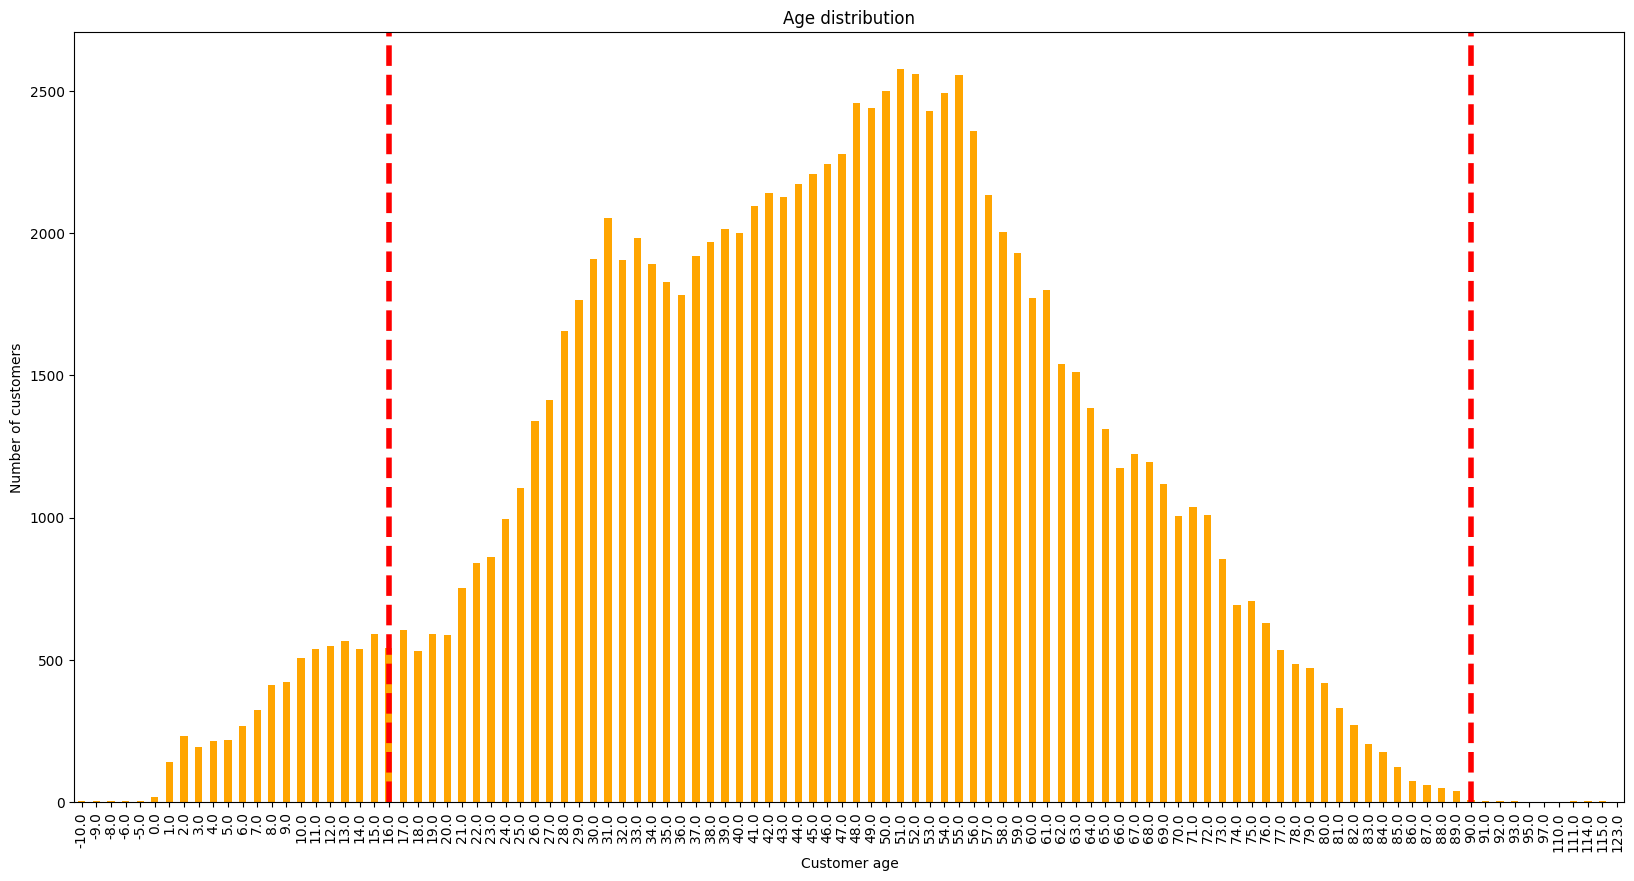

In [18]:
df2['Age'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10), color='orange')

plt.axvline(x=21, color='red', linestyle='--', linewidth=4)
plt.axvline(x=95, color='red', linestyle='--', linewidth=4)
plt.xlabel('Customer age')
plt.ylabel('Number of customers')
plt.title('Age distribution')
plt.show()

In [19]:
print(f"There are {df2[df2['Age'] < 16].shape[0]} customers under 16 in the dataset.")

There are 5744 customers under 16 in the dataset.


In [20]:
print(f"There are {df2[df2['Age'] < 0].shape[0]} customers with negative age in the dataset.")

There are 14 customers with negative age in the dataset.


In [21]:
print(f"There are {df2[(df2['Age'] >= 100)].shape[0]} customers over 100 in the dataset and the oldest customer is {df['Age'].max()} years old.")

There are 9 customers over 100 in the dataset and the oldest customer is 123.0 years old.


Our analysis identified 5744 customers who fall below the minimum required age threshold, including 14 customers whose ages appear as negative values. Additionally, we found 9 customers recorded as over 100 years old, with the oldest listed as 123. These values raise potential data integrity concerns, as they may indicate incorrect values in data collection. In this way, further potential data cleaning steps are necessary.

<br>

**Checking the number of days since the customer was created**

The second feature to check is regarding the number of days since an account was made for a specific customer. From previous insights, there were no inconsistencies found in this feature.

In [22]:
print(f"There are {df2[df2['DaysSinceCreation'] == df2['DaysSinceCreation'].min()].shape[0]} most recent customers, having created their accounts {df['DaysSinceCreation'].min()} days before the dataset's last recorded date.")

There are 6 most recent customers, having created their accounts 36 days before the dataset's last recorded date.


In [23]:
df2[df2['DaysSinceCreation'] == df2['DaysSinceCreation'].min()]

Nationality   Age  DaysSinceCreation  \
ID                                            
111728         DEU  34.0                 36   
111729         DEU  31.0                 36   
111730         BRA  43.0                 36   
111731         BRA  37.0                 36   
111732         DEU  48.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
111728  0x39BEF6C854451EC00FD7C79A8E1B3F8DFC40BDEEC217...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111730  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111732  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
111728  0x563B66C0301693C2BAEEDFA2340820F3A51BAA895B1E...               41   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111730  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111732  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
111728           98.00          14.0                 0                 0   
111729            0.00           0.0                 0                 0   
111730          755.25          20.0                 0                 0   
111731            0.00           0.0                 0                 0   
111732          708.00         185.0                 0                 0   
111733            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
111728                  1              2           1  Travel Agent/Operator   
111729                  0              0           0  Travel Agent/Operator   
111730                  1             10           5  Travel Agent/Operator   
111731                  0              0           0  Travel Agent/Operator   
111732                  1              8           4  Travel Agent/Operator   
111733                  0              0           0  Travel Agent/Operator   

                MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                         
111728  Travel Agent/Operator            0           0                 0   
111729  Travel Agent/Operator            0           0                 0   
111730                  Other            0           0                 0   
111731                  Other            0           0                 0   
111732                  Other            0           0                 0   
111733                  Other            0           0                 0   

        SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                             
111728              0          0         0       0              1          0   
111729              0          0         0       0              1          0   
111730              0          0         0       0              1          0   
111731              0          0         0       0              1          0   
111732              0          0         0       0              0          0   
111733              0          0         0       0              0          0   

        SRNearElevator  

From the previous output, it seems that these are different customers and therefore no incoherence can be found regarding that. However, it is evident that there are certain records where both `LodgingRevenue` and `OtherRevenue` are 0, and there is indication that the booking was not canceled and that the customer show up. In these cases, it appears that these entries may represent data entry errors rather than actual customer bookings.

These records are likely non-representative of real customers and further investigation will be conducted to explore this issue.

In [24]:
df2[df2['DaysSinceCreation'] == df2['DaysSinceCreation'].max()].head(1)

Nationality  Age  DaysSinceCreation  \
ID                                       
2          PRT  NaN               1385   

                                             NameHash  \
ID                                                      
2   0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   

                                            DocIDHash  AverageLeadTime  \
ID                                                                       
2   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   

    LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                     
2            280.0          53.0                 0                 0   

    BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                        
2                   1             10           5  Travel Agent/Operator   

            MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                     
2   Travel Agent/Operator            0           0                 0   

    SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                         
2               0          0         0       0              0          0   

    SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                         
2                0                   0                     0            0

The oldest accounts were established 3 years and 9 months prior to the dataset closed date.

<br>

**Checking the hash of a customer identification number**

There are some customer identification number missing in the dataset and this will be fixed in section `3. Data Cleaning and Preprocessing`. However, it is also crucial to check for potential issues, such as whether the same customer identification number is associated with different names. Additionally, it’s important to track how often this occurs.

In [25]:
filter_dataset = df[(~df['DocIDHash'].isna()) & ~df.duplicated(keep='first')]
filter_dataset

Nationality   Age  DaysSinceCreation  \
ID                                            
1              PRT  52.0                440   
2              PRT   NaN               1385   
3              DEU  32.0               1385   
4              FRA  61.0               1385   
5              FRA  52.0               1385   
...            ...   ...                ...   
111729         DEU  31.0                 36   
111730         BRA  43.0                 36   
111731         BRA  37.0                 36   
111732         DEU  48.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
1       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111730  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111732  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
1       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111730  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111732  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
1               292.00          82.3                 1                 0   
2               280.00          53.0                 0                 0   
3                 0.00           0.0                 0                 0   
4               240.00          60.0                 0                 0   
5                 0.00           0.0                 0                 0   
...                ...           ...               ...               ...   
111729            0.00           0.0                 0                 0   
111730          755.25          20.0                 0                 0   
111731            0.00           0.0                 0                 0   
111732          708.00         185.0                 0                 0   
111733            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
1                       2              6           4              Corporate   
2                       1             10           5  Travel Agent/Operator   
3                       0              0           0  Travel Agent/Operator   
4                       1             10           5  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
...                   ...            ...    

In [26]:
print(f'There are {filter_dataset['DocIDHash'].nunique()} different identification numbers in the dataset, while {filter_dataset.duplicated(['DocIDHash']).sum()} appear more than once.')

There are 103480 different identification numbers in the dataset, while 7210 appear more than once.


Checking the number of times each document identification appears in the dataset.

In [27]:
filter_dataset['DocIDHash'].value_counts().head(10)

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3021
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BDB7DBBA7E32620809C799      12
0x9220D336F2DDD7B68F5066878889C7637EE28924B249F968F5EC82D895B108A7      12
0xD2DBD6039916F6DB10C6564D8EB9A9116811435965D7D00E7DA292066B3ECE91      11
0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC0248999C782807195BCB      11
0x6B421376B94F3D1722979458A96DF486DEA0F9290CC05E9699F2762FD0DDA71D      10
Name: count, dtype: int64

From the output, we can see that there exists an document ID number that appears 3021 which is unusually high, followed by others that, also, appear more times. These can be, for instance, a corporate client making reservations for employees. Therefore, we will analyse those rows.

Client with most reservations

In [28]:
unusual_customer = filter_dataset[filter_dataset['DocIDHash'] == "0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855"]
unusual_customer

Nationality  Age  DaysSinceCreation  \
ID                                           
2              PRT  NaN               1385   
39             PRT  NaN               1385   
40             PRT  NaN               1385   
56             PRT  NaN               1385   
60             PRT  NaN               1385   
...            ...  ...                ...   
109484         PRT  NaN                 54   
109890         PRT  NaN                 51   
110526         PRT  NaN                 47   
110672         PRT  NaN                 45   
111553         PRT  NaN                 38   

                                                 NameHash  \
ID                                                          
2       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
39      0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...   
40      0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...   
56      0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...   
60      0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...   
...                                                   ...   
109484  0xA011EA37E7B0E7AFCF0B891BC8806A9421A8B6D1291D...   
109890  0x931C54BCE9C4AF9C876BDE0E1266BDE69C32E5F7D66D...   
110526  0x892C54F8D6C0196FFDE05F31F0C52870F681C39B8C07...   
110672  0x64A24B438F81CCBF577AFCEE5A290F1A897D71ADCD06...   
111553  0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
2       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
39      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
40      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
56      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               97   
60      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                1   
...                                                   ...              ...   
109484  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               36   
109890  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               75   
110526  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               98   
110672  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               23   
111553  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...              204   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
2               280.00          53.0                 0                 0   
39                0.00           0.0                 0                 0   
40                0.00           0.0                 0                 0   
56              213.52          11.5                 0                 0   
60              123.00          12.0                 0                 0   
...                ...           ...               ...               ...   
109484          708.00         272.5                 0                 0   
109890          616.60          72.0                 0                 0   
110526          119.00          88.0                 0                 0   
110672           59.00           8.0                 0                 0   
111553          381.60          91.2                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
2                       1             10           5  Travel Agent/Operator   
39                      1              1           1                 Direct   
40                      1              1           1                 Direct   
56                      1              8           4  Travel Agent/Operator   
60                      1              2           1                 Direct   
...                   ...            ...         ...     

In [29]:
# Name used in the booking
unusual_customer['NameHash'].value_counts()

NameHash
0x5175AC9E84362C505AED3E76F20320BE69DD1C21AA67E9B7156246CFA892423F    10
0x57875DF029939F73857E321CF04081870E118531CE2914AA30DE15584B1D8511     8
0x7CF54101C640D8C370BCE3FCE66B152E095ABA0E9580238C9ABFC6B1CDA7CDFC     5
0xD9BEF42E436933B3CB1E932F0D7682A10303ACEDD62E0DC4EE5AEE2AF4C22A69     4
0x70EEFBA777A33271F2D2433667CF4C2D90FB50CB67688BE14E22A296DEA65A2D     4
                                                                      ..
0xB9CD557B2D051DB4A465AC4EE5D57448F6456A67DBB83DBB0A7C100A210B508D     1
0x36773B8ABA6CBC922450FDC4055CCEB4162B52E1D54E6D20D562E98966F93629     1
0x7EBECC4D951B643E4CAE61AA1755EB30880E51FF8E6BA32D79620B720BEFA6A3     1
0xF9EE94E9B180183D295537FF365DCF11FB3B40F258E70361B422D8F50ACDC2A9     1
0xBC66C5A2A0C25C38CF99F5BF605A913382C4FF3B7960DFD35D0352E4C1E3D6A2     1
Name: count, Length: 2826, dtype: int64

In [30]:
# Distribution channel for the booking
unusual_customer['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    2130
Direct                    600
Corporate                 275
GDS Systems                16
Name: count, dtype: int64

In [31]:
# Persons/Nights Boxplot
fig1 = px.box(unusual_customer, 
              x="DistributionChannel", 
              y="PersonsNights", 
              title="Distribution of Persons/Nights by Distribution Channel",
              color_discrete_sequence=["orange"])

fig1.update_layout(
    xaxis_title="Distribution Channel", 
    yaxis_title="Persons/Nights", 
    template="plotly_white",
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'black', 'size': 16}},
    font={'color': 'black', 'size': 10}  
)

fig1.show()

# Room/Nights Boxplot
fig2 = px.box(unusual_customer, 
              x="DistributionChannel", 
              y="RoomNights", 
              title="Distribution of Room/Nights by Distribution Channel",
              color_discrete_sequence=["orange"])

fig2.update_layout(
    xaxis_title="Distribution Channel", 
    yaxis_title="Room/Nights", 
    template="plotly_white",
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'black', 'size': 16}},  
    font={'color': 'black', 'size': 10} 
)

fig2.show()

In [32]:
unusual_customer[(unusual_customer['PersonsNights'] == 51)]

Nationality  Age  DaysSinceCreation  \
ID                                          
34241         PRT  NaN                797   

                                                NameHash  \
ID                                                         
34241  0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
34241  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               28   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
34241          4255.0         685.0                 1                 2   

       BookingsCheckedIn  PersonsNights  RoomNights DistributionChannel  \
ID                                                                        
34241                 19             51          51           Corporate   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
34241     Corporate            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
34241          0         0       0              1          1               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
34241                   0                     0            0

In [33]:
# Market segment it was previous assigned
unusual_customer['MarketSegment'].value_counts()

MarketSegment
Other                    1158
Groups                    613
Direct                    516
Travel Agent/Operator     376
Corporate                 251
Complementary              86
Aviation                   21
Name: count, dtype: int64

In [34]:
print(f'Bookings cancelled: {unusual_customer[unusual_customer['BookingsCanceled'] != 0].shape[0]}')
print(f'Customer did not show: {unusual_customer[unusual_customer['BookingsNoShowed'] != 0].shape[0]}')

Bookings cancelled: 22
Customer did not show: 6


In [35]:
unusual_customer[unusual_customer['Nationality'] != 'PRT']

Nationality  Age  DaysSinceCreation  \
ID                                          
30817         PAN  NaN                848   
75056         ESP  NaN                377   

                                                NameHash  \
ID                                                         
30817  0x3D101FD8EB30B03A16E6FFDD0151B151B6AE790BA784...   
75056  0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
30817  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                2   
75056  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               69   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
30817           208.0          39.0                 0                 1   
75056           488.0          49.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
30817                  2              2           2              Corporate   
75056                  2              1           4  Travel Agent/Operator   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
30817      Aviation            0           0                 0              0   
75056        Groups            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
30817          0         0       0              0          0               0   
75056          0         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
30817                   0                     0            0  
75056                   0                     0            0

In [36]:
unusual_customer[~unusual_customer['Age'].isna()]

Nationality   Age  DaysSinceCreation  \
ID                                            
745            PRT  40.0               1359   
843            PRT  48.0               1355   
908            PRT  33.0               1352   
1003           PRT  31.0               1348   
1004           PRT  30.0               1348   
...            ...   ...                ...   
103346         PRT  23.0                103   
106429         PRT  10.0                 78   
107859         PRT   6.0                 67   
108451         PRT  56.0                 62   
108969         PRT  54.0                 58   

                                                 NameHash  \
ID                                                          
745     0xDE75217D31BF3A07C97BC70DF817FCBA6CC5AA29C153...   
843     0x927BA21A63552D1FC65670C559845E2B3C19BCC55B18...   
908     0x3CA9DDAB19D8F50A425B14FAB6BA283701AB9B5A651C...   
1003    0x13B95955F49C8E660F3B7639FDAB4BB75A495493A5A2...   
1004    0x155357372FF051877CBE53E7A357935957CB3F22F8D7...   
...                                                   ...   
103346  0x3B383C03E88F6AFE5508D1E75BBDCB6FE13548B1BDA9...   
106429  0x8C93F42F7CE50F07E1B226CDD2111A5413903FA1EC73...   
107859  0x151FA6F1DCAD61BDCEF01D315AE43293597CE08B0F10...   
108451  0xD8F7D032DC3955A24CC5394935C8EDC4D06B77812C8A...   
108969  0x7C17DE4E2E27279DA7CD50C2A52030A413E057D34F1D...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
745     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...              103   
843     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               17   
908     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                3   
1003    0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               22   
1004    0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
...                                                   ...              ...   
103346  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                1   
106429  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
107859  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
108451  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...              170   
108969  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...              166   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
745              388.0         120.0                 0                 0   
843              177.0          77.0                 0                 0   
908               73.0           7.0                 0                 0   
1003             172.8          42.0                 0                 0   
1004               0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
103346           116.0          16.0                 0                 0   
106429             0.0           0.0                 0                 0   
107859             0.0           0.0                 0                 0   
108451           314.0          32.0                 0                 0   
108969           938.7          28.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
745                     1             12           4                 Direct   
843                     3              3           3              Corporate   
908                     1              1           1  Travel Agent/Operator   
1003                    1              6           3  Travel Agent/Operator   
1004                    0              0           0  Travel Agent/Operator   
...                   ...            ...    

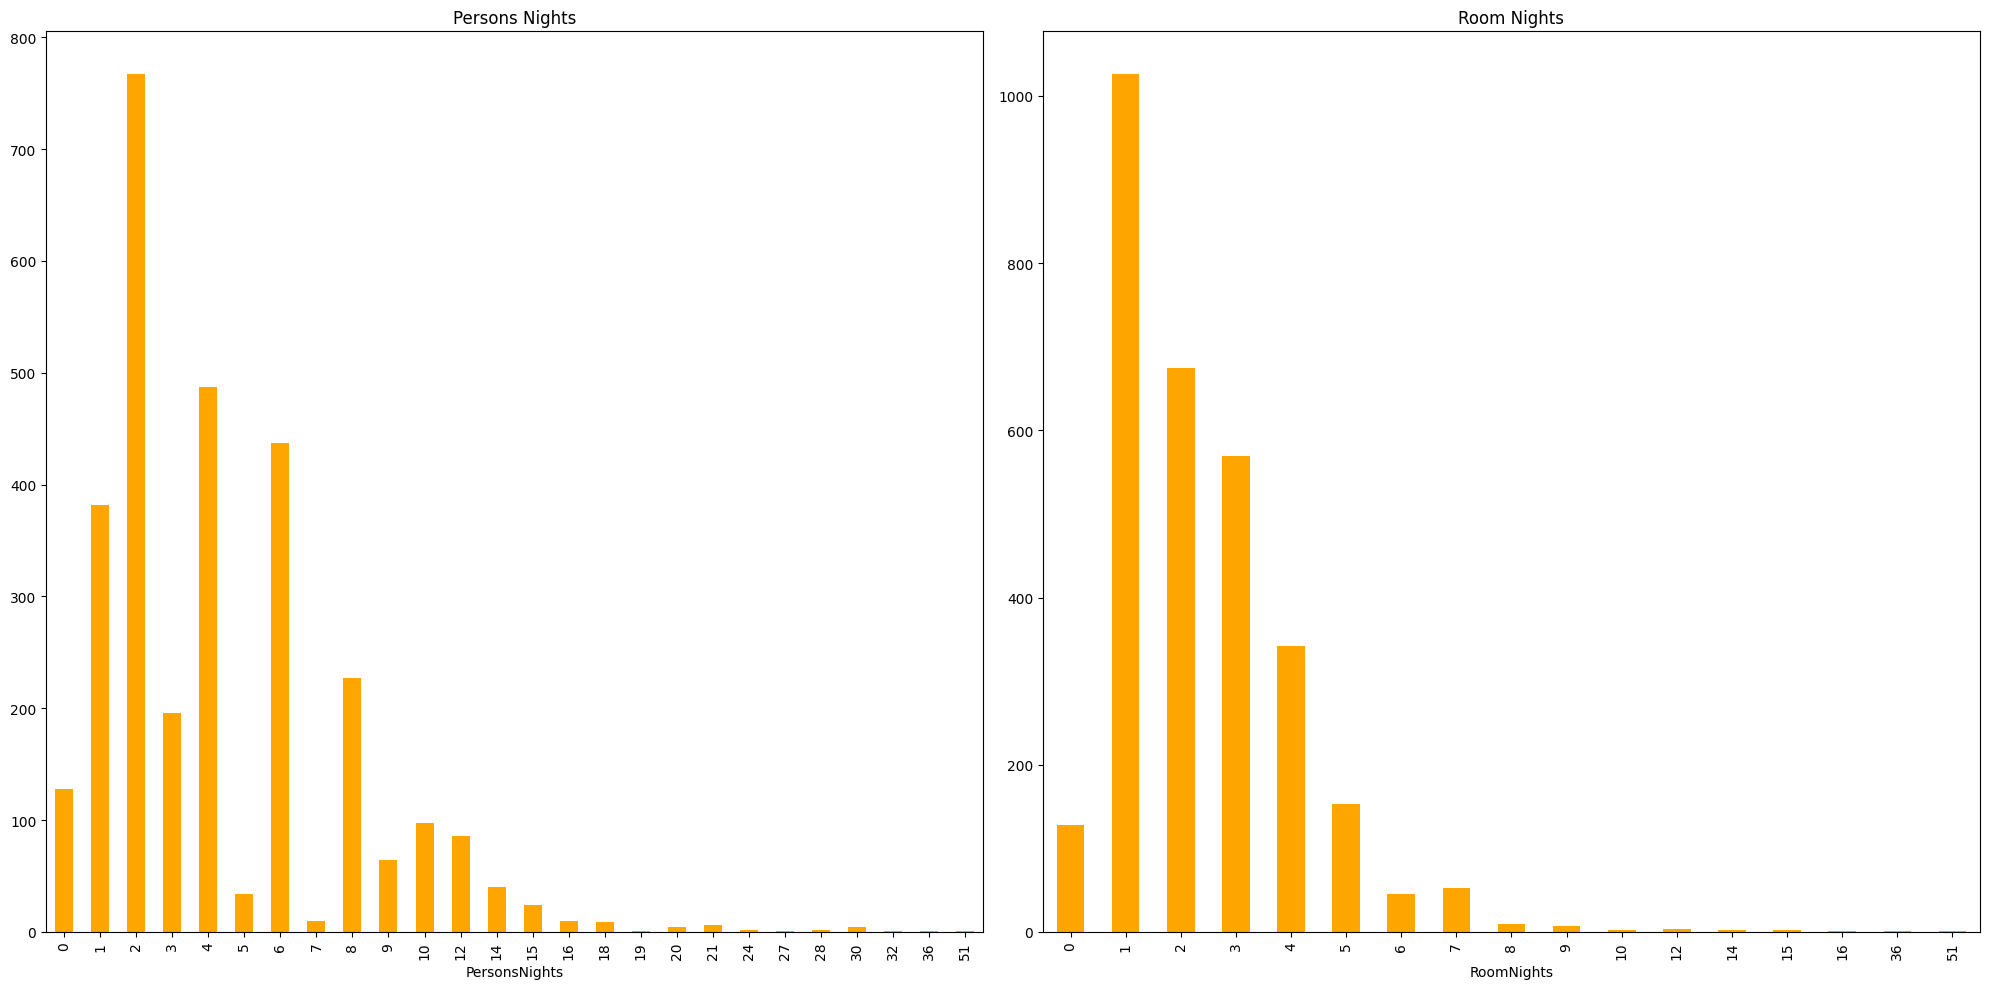

In [37]:
# Number of nights and rooms stayed by the customer
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  
unusual_customer['PersonsNights'].value_counts().sort_index().plot(
    kind='bar', color='orange', ax=axes[0], title="Persons Nights"
)

unusual_customer['RoomNights'].value_counts().sort_index().plot(
    kind='bar', color='orange', ax=axes[1], title="Room Nights"
)

plt.tight_layout()  
plt.show()

In [38]:
print(f"Number of times a crib was requested: {unusual_customer[unusual_customer['SRCrib']== 1].shape[0]}")

Number of times a crib was requested: 24


From the outputs above we can get the following insights:

- There are multiple names being used using the same identification number, with the highest being reused 10 times;

- The majority (2130) of bookings come through a Travel Agent/Operator, followed by Direct (600) and Corporate (275). The boxplots reveal that larger bookings in terms of persons/nights/rooms tend to be associated with the Corporate channel. However, it’s also evident that significant bookings occur through both Travel Agent/Operator and Direct channels.

- 1,158 customers fall under Other, followed by Groups (613) and Direct (516). A high number of Groups could suggest reservations for events or tour groups;

- Only 22 out of 3021 times the customer cancelled and there were 6 times it did not show up. Given these information, we consider the booking as legit and not a fraudulent operation.

- Almost all bookings are from Portugal (PRT) except for two (one from Panama, one from Spain). This could indicate a company located in Portugal;

- Most of them do not have their age indicated. However, among those that do, the ages vary significantly, suggesting they belong to different customers.

- From the histogram of `PersonsNights` and `RoomNights`, we can conclude that most reservations are likely for one customer staying 1 or 2 nights or for two customers staying for 1 night and, therefore, requiring two rooms. While other values are present, without prior knowledge of the exact number of customers and nights per booking, we cannot draw more precise conclusions.

- 24 of this customers had asked for a crib

Given these insights, we believe these reservations are made under a company's name, such as an airline like TAP booking rooms for its pilots or a company that supports hybrid work, requiring room bookings on in-office days for employees who do not live in Lisbon.

<br>

Other customers with high number of same documentation identification number

Note: We ran the code displaying all the rows, but due to the aesthetic and space constraints of the notebook, we decided to only display 5 rows.

In [39]:
corporate_customer = filter_dataset[filter_dataset['DocIDHash'] == "0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B"].head()
corporate_customer

Nationality   Age  DaysSinceCreation  \
ID                                           
12953         PRT  51.0               1147   
15838         PRT  51.0               1105   
16388         PRT  51.0               1098   
33692         PRT  51.0                806   
33701         PRT  51.0                806   

                                                NameHash  \
ID                                                         
12953  0xD345B7964D8B1D2438F4F54BC14AEC9C5261AC3C2CB6...   
15838  0x1A2DCD85060585D37DE6D8B246DD54B90A427F58BD74...   
16388  0x1A2DCD85060585D37DE6D8B246DD54B90A427F58BD74...   
33692  0xC23921914E37630222F29FEAC44CAE7FE25E6B10E9F9...   
33701  0xB96591E35F443A512E68447228F63946D4FB948E7E85...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
12953  0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...               21   
15838  0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...                5   
16388  0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...                6   
33692  0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...               29   
33701  0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...                2   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
12953          6991.0         957.0                 0                 2   
15838           652.0          78.0                 1                 0   
16388          1803.0         191.0                 1                 0   
33692           356.0          44.0                 0                 0   
33701           120.0          12.0                 0                 1   

       BookingsCheckedIn  PersonsNights  RoomNights DistributionChannel  \
ID                                                                        
12953                 40            116         116           Corporate   
15838                  6             11          11           Corporate   
16388                 10             22          22           Corporate   
33692                  2              6           6           Corporate   
33701                  1              2           2           Corporate   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
12953     Corporate            0           0                 0              0   
15838     Corporate            0           0                 0              0   
16388     Corporate            0           0                 0              0   
33692     Corporate            0           0                 0              0   
33701     Corporate            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
12953          0         0       0              1          0               0   
15838          0         0       0              1          0               0   
16388          0         0       0              1          0               0   
33692          0         0       0              1          0               0   
33701          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
12953                   0                     0            0  
15838                   0                     0            0  
16388                   0                     0            0  
33692                   0                     0            0  
33701                   0                     0            0

In [40]:
# Name used in the booking
corporate_customer['NameHash'].value_counts()

NameHash
0x1A2DCD85060585D37DE6D8B246DD54B90A427F58BD74B62BAFC8296B81AA9C2F    2
0xD345B7964D8B1D2438F4F54BC14AEC9C5261AC3C2CB6C51A821B8E6563BB1C0B    1
0xC23921914E37630222F29FEAC44CAE7FE25E6B10E9F9B392FD29F44F2391DF68    1
0xB96591E35F443A512E68447228F63946D4FB948E7E85689C45227BC37950AA67    1
Name: count, dtype: int64

# está quase tudo a zero, se eles não pedem nada onde dormem? na piscina? talvez pelo facto de ele não ter uma preferencia seja um quarto que seja dado pelo hotel

This is possibly a portuguese corporate customer who regularly makes hotel bookings under a corporate account, perharps a CEO of a company. It shows relatively low number of cancellations and no-shows and it suggests frequent stays based on the values of `RoomNights` and `PersonsNights`. The customer seems to have standard preferences for room amenities, with most of the attributes like high floor, low floor, accessible room or crib  marked as 0, meaning they probably do not request these amenities frequently, except alcohol in the mini bar and king size bed which are always asked.

It’s possible that a pattern emerges among customers like this that opt for rooms that help them meet their basic needs and possibly favoring rooms that allow them to keep costs lower.

<br>

In [41]:
corporate_customer2 = filter_dataset[filter_dataset['DocIDHash'] == "0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52"].head()
corporate_customer2

Nationality   Age  DaysSinceCreation  \
ID                                           
2160          PRT  48.0               1323   
22852         PRT  48.0                966   
22854         PRT  48.0                966   
22855         PRT  48.0                966   
26929         PRT  48.0                903   

                                                NameHash  \
ID                                                         
2160   0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   
22852  0x92500586215142EBDA0057D3A792411F0D2A3E2A8455...   
22854  0xD79CBB59C811C34D1228585CEAD9E6CD26E5BA342E02...   
22855  0x968E52B041E8F43DE2E14F21093DEF5439EB5251FE79...   
26929  0x7FED68C6755707148189209F36950A10F2E18267C2A4...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
2160   0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...               20   
22852  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...                1   
22854  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...               22   
22855  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...                3   
26929  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...               25   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
2160          8493.65        2587.5                 3                 1   
22852           74.00           7.0                 0                 0   
22854         1569.00         338.0                 4                 1   
22855          758.00          83.0                 0                 0   
26929          267.00          30.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights DistributionChannel  \
ID                                                                        
2160                  66             75          95           Corporate   
22852                  1              1           1           Corporate   
22854                 15             18          18           Corporate   
22855                  7              9           9           Corporate   
26929                  2              3           3           Corporate   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
2160      Corporate            0           0                 0              0   
22852     Corporate            0           0                 0              0   
22854     Corporate            0           0                 0              0   
22855     Corporate            0           0                 0              0   
26929     Corporate            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
2160           0         0       0              1          0               0   
22852          0         0       0              1          0               0   
22854          0         0       0              1          0               0   
22855          0         0       0              1          0               0   
26929          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
2160                    0                     0            0  
22852                   0                     0            0  
22854                   0                     0            0  
22855                   0                     0            0  
26929                   0                     0            0

In [42]:
# Name used in the booking
corporate_customer2['NameHash'].value_counts()

NameHash
0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D8787F8C7A413529295FD50    1
0x92500586215142EBDA0057D3A792411F0D2A3E2A8455E06168A449EEE4128159    1
0xD79CBB59C811C34D1228585CEAD9E6CD26E5BA342E023F6458B7B614F9FCA344    1
0x968E52B041E8F43DE2E14F21093DEF5439EB5251FE7950DF21ED2BE1A069934A    1
0x7FED68C6755707148189209F36950A10F2E18267C2A4BA2AC8CF8E8DB2A9CF6E    1
Name: count, dtype: int64

The same analysis as before. It is also a corporate customer and with the same type of requirements.

In [43]:
filter_dataset[filter_dataset['DocIDHash'] == "0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076"].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
6205          PRT  59.0               1252   
25805         PRT  59.0                921   
34351         PRT  59.0                796   
34846         PRT  59.0                788   
40050         PRT  59.0                716   

                                                NameHash  \
ID                                                         
6205   0x9C0025F8C9D82156F127224D25F8292435575227EC85...   
25805  0x9C0025F8C9D82156F127224D25F8292435575227EC85...   
34351  0x9C0025F8C9D82156F127224D25F8292435575227EC85...   
34846  0x2A365BFB1B52AAC7EF9B4B019C3F14FE07065ECF5BCF...   
40050  0x9C0025F8C9D82156F127224D25F8292435575227EC85...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
6205   0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...                8   
25805  0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...                4   
34351  0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...                4   
34846  0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...                8   
40050  0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD...               17   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
6205           2573.7         428.0                 0                 0   
25805           726.0         147.6                 0                 0   
34351           356.0          75.0                 0                 0   
34846           867.0          81.0                 0                 0   
40050           129.0           2.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
6205                  17             38          19  Travel Agent/Operator   
25805                  1             12           3  Travel Agent/Operator   
34351                  1              4           2  Travel Agent/Operator   
34846                  2              8           4  Travel Agent/Operator   
40050                  1              2           1  Travel Agent/Operator   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
6205          Other            0           0                 0              0   
25805         Other            0           0                 0              0   
34351         Other            0           0                 0              0   
34846         Other            0           0                 0              0   
40050         Other            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
6205           0         0       0              1          0               0   
25805          0         0       0              0          0               0   
34351          0         0       0              1          0               0   
34846          0         0       0              1          0               0   
40050          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
6205                    0                     0            0  
25805                   0                     0            0  
34351                   0                     0            0  
34846                   0                     0            0  
40050                   0                     0            0

In [44]:
filter_dataset[filter_dataset['DocIDHash'] == "0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003"].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
51803         CHE  60.0                555   
52984         CHE  60.0                545   
57253         CHE  60.0                510   
57664         CHE  60.0                507   
60731         CHE  60.0                482   

                                                NameHash  \
ID                                                         
51803  0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552...   
52984  0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552...   
57253  0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552...   
57664  0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552...   
60731  0x5D6D35B2A085C783FB5EAA6088C9C97EE3596F2FB552...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
51803  0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158...               12   
52984  0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158...                6   
57253  0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158...                9   
57664  0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158...               12   
60731  0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158...               14   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
51803         2110.94         228.2                 0                 0   
52984          710.92          78.2                 0                 0   
57253          132.58          27.0                 0                 0   
57664          140.78           7.0                 0                 0   
60731          145.24          33.5                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
51803                  8             15          15  Travel Agent/Operator   
52984                  3              4           4  Travel Agent/Operator   
57253                  1              1           1  Travel Agent/Operator   
57664                  1              1           1  Travel Agent/Operator   
60731                  1              1           1  Travel Agent/Operator   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
51803         Other            0           0                 0              0   
52984         Other            0           0                 0              0   
57253         Other            0           0                 0              0   
57664         Other            0           0                 0              0   
60731         Other            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
51803          0         0       0              1          0               0   
52984          0         0       0              1          0               0   
57253          0         0       0              0          0               0   
57664          0         0       0              0          0               0   
60731          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
51803                   0                     0            0  
52984                   0                     0            0  
57253                   0                     0            0  
57664                   0                     0            0  
60731                   0                     0            0

It appears that these customers are on business trips.

# A possible solution for each case would be to merge based on the document id and name, and DistributionChannel ??????????????.

<br>

**Checking the average number of days before arrival date the customer makes bookings**

For the feature `AverageLeadTime`, we identified an unusual value of -1 which is implossible.

In [45]:
df2[df2['AverageLeadTime'] == -1].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
23064         PRT   NaN                964   
29374         USA  25.0                870   
51375         CHN  33.0                558   
58655         FRA  57.0                499   
58662         FRA  62.0                499   

                                                NameHash  \
ID                                                         
23064  0x498F10CD065519D5A08A680309214C7911457CF2A5CC...   
29374  0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...   
51375  0x61B41490861314B7148F76EE7D7E17A240A86B45259D...   
58655  0x7E60C14F1CDF540841373495CA352FA8579EA1166911...   
58662  0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
23064  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               -1   
29374  0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...               -1   
51375  0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...               -1   
58655  0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...               -1   
58662  0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...               -1   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
23064          352.00          30.0                 0                 0   
29374           77.49           3.0                 0                 0   
51375          129.00           2.0                 0                 0   
58655          149.00           2.0                 0                 0   
58662          149.00           2.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
23064                  1              2           1  Travel Agent/Operator   
29374                  1              3           1  Travel Agent/Operator   
51375                  1              2           1  Travel Agent/Operator   
58655                  1              2           1  Travel Agent/Operator   
58662                  1              2           1  Travel Agent/Operator   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
23064         Other            0           0                 0              0   
29374         Other            0           0                 0              0   
51375         Other            0           0                 0              0   
58655         Other            0           0                 0              0   
58662         Other            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
23064          0         0       0              0          0               0   
29374          0         0       0              0          0               0   
51375          0         0       0              0          0               0   
58655          0         0       0              0          0               0   
58662          0         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
23064                   0                     0            0  
29374                   0                     0            0  
51375                   0                     0            0  
58655                   0                     0            0  
58662                   0                     0            0

In [46]:
print(f'Number of customers with a negative value: {df2[df2['AverageLeadTime'] == -1].shape[0]} customers')

Number of customers with a negative value: 13 customers


We have identified 13 customers with a negative value for the average number of days before arrival for booking, which is not feasible. All other features for these customers appear to be correct. Therefore, a potential solution would be to adjust the `AverageLeadTime` for these cases to a more realistic value, such as 0 or 1.

# o problema desta parte é que talvez poderão ter ido a algum evento que aconteceu no hotel organizado por alguém externo ao hotel e por isso não gastaram nada no hotel

<br>

**Total amount of lodging revenue paid by the customer so far**

Another potential inconsistency is observed in the `LodgingRevenue` feature. While a minimum value of 0 may be plausible if the customer has spent in other hotel-related expenses, such as for food, spa services, or in other expenses, it becomes incoherent if both `LodgingRevenue` and other related revenues are 0. This would suggest that there were no transactions and these records may not represent actual customers.

In [47]:
no_customers = df2[(df2['LodgingRevenue'] == 0) & (df2['OtherRevenue'] == 0)]
no_customers

Nationality   Age  DaysSinceCreation  \
ID                                            
3              DEU  32.0               1385   
5              FRA  52.0               1385   
7              JPN  50.0               1385   
9              FRA  43.0               1385   
11             IRL  28.0               1385   
...            ...   ...                ...   
111724         ITA  56.0                 37   
111726         PAN  60.0                 37   
111729         DEU  31.0                 36   
111731         BRA  37.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
7       0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
9       0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
11      0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   
...                                                   ...   
111724  0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...   
111726  0xAA3529E305173010BADE927C7015FA091C3883D257E9...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
7       0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...                0   
9       0x6C456E45A78A20BC794137AE326A81D587B6528B3944...                0   
11      0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...                0   
...                                                   ...              ...   
111724  0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...                0   
111726  0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...                0   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
3                  0.0           0.0                 0                 0   
5                  0.0           0.0                 0                 0   
7                  0.0           0.0                 0                 0   
9                  0.0           0.0                 0                 0   
11                 0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
111724             0.0           0.0                 0                 0   
111726             0.0           0.0                 0                 0   
111729             0.0           0.0                 0                 0   
111731             0.0           0.0                 0                 0   
111733             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
3                       0              0           0  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
7                       0              0           0  Travel Agent/Operator   
9                       0              0           0  Travel Agent/Operator   
11                      0              0           0  Travel Agent/Operator   
...                   ...            ...    

In [48]:
no_customers[no_customers['BookingsCheckedIn'] != 0]

Nationality   Age  DaysSinceCreation  \
ID                                            
39             PRT   NaN               1385   
40             PRT   NaN               1385   
630            PRT  46.0               1362   
632            PRT   NaN               1362   
681            PRT   NaN               1360   
...            ...   ...                ...   
106121         PRT  39.0                 81   
106398         PRT  56.0                 79   
109312         PRT  48.0                 55   
109366         PRT  59.0                 55   
111184         PRT  68.0                 41   

                                                 NameHash  \
ID                                                          
39      0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...   
40      0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...   
630     0x65A26CC5AA4DA0FE145C848C955F2D8A7F852DB78547...   
632     0x382AE8A7FF864DC64B3B66727EBD610D68068BD5CA1A...   
681     0x7FF6B1BA3C76DDE2371DDB19F0AF3251438B6DE0349C...   
...                                                   ...   
106121  0x33528842AC6715327408D88ABC085392C20C06AB7E14...   
106398  0xBAE14E9ADB904ADBB358EF47D35AA1BD545C5C4DC08D...   
109312  0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...   
109366  0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...   
111184  0x14404039609EDC329777DB0631B3258301BFB6A11FE5...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
39      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
40      0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                0   
630     0x5E9904C097C496B8C002D9E7F9F1AC145252C226DBB7...                1   
632     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                2   
681     0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                3   
...                                                   ...              ...   
106121  0x2C75B1971369B3BACB93E2AB7F7BAB5FEA89CFB21B47...                3   
106398  0xB46B1C260C7D776327573FBBDE64CB94CCABAE2BEDB2...              263   
109312  0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...                8   
109366  0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...                1   
111184  0x8B3BBE67C6C4558D3B641571B7DA26B319F65749680B...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
39                 0.0           0.0                 0                 0   
40                 0.0           0.0                 0                 0   
630                0.0           0.0                 1                 0   
632                0.0           0.0                 0                 0   
681                0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
106121             0.0           0.0                 0                 0   
106398             0.0           0.0                 0                 0   
109312             0.0           0.0                 0                 0   
109366             0.0           0.0                 0                 0   
111184             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
39                      1              1           1                 Direct   
40                      1              1           1                 Direct   
630                     2              3           2                 Direct   
632                     1              1           1                 Direct   
681                     1              2           1                 Direct   
...                   ...            ...    

Based on the output, it is evident that there are 33 441 records representing customers who have not spent on any hotel amenities. 338 out of the 33 441 made the actual check-in. This could potentially be a system error where the relevant values were not recorded. Since these entries do not contribute any value to the business, they should be removed from the dataset. However, before proceeding with this deletion, it is essential to first merge and review the customers identified during the exploration of the `DocIDHash` feature, as there might be valuable information that could be recovered from those records and perharps some values can be identified.

<br>

**Analysing booking check-ins, revenues and persons/rooms/nights**

In [49]:
no_checkedin = df2[df2['BookingsCheckedIn']==0]
no_checkedin

Nationality   Age  DaysSinceCreation  \
ID                                            
3              DEU  32.0               1385   
5              FRA  52.0               1385   
7              JPN  50.0               1385   
9              FRA  43.0               1385   
11             IRL  28.0               1385   
...            ...   ...                ...   
111724         ITA  56.0                 37   
111726         PAN  60.0                 37   
111729         DEU  31.0                 36   
111731         BRA  37.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
7       0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
9       0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
11      0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   
...                                                   ...   
111724  0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...   
111726  0xAA3529E305173010BADE927C7015FA091C3883D257E9...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
7       0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...                0   
9       0x6C456E45A78A20BC794137AE326A81D587B6528B3944...                0   
11      0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...                0   
...                                                   ...              ...   
111724  0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...                0   
111726  0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...                0   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
3                  0.0           0.0                 0                 0   
5                  0.0           0.0                 0                 0   
7                  0.0           0.0                 0                 0   
9                  0.0           0.0                 0                 0   
11                 0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
111724             0.0           0.0                 0                 0   
111726             0.0           0.0                 0                 0   
111729             0.0           0.0                 0                 0   
111731             0.0           0.0                 0                 0   
111733             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
3                       0              0           0  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
7                       0              0           0  Travel Agent/Operator   
9                       0              0           0  Travel Agent/Operator   
11                      0              0           0  Travel Agent/Operator   
...                   ...            ...    

In [50]:
no_checkedin[no_checkedin['BookingsCanceled'] != 0]

Nationality   Age  DaysSinceCreation  \
ID                                           
47035         USA  38.0                599   

                                                NameHash  \
ID                                                         
47035  0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
47035  0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...                0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
47035             0.0           0.0                 2                 0   

       BookingsCheckedIn  PersonsNights  RoomNights DistributionChannel  \
ID                                                                        
47035                  0              0           0              Direct   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
47035        Direct            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
47035          0         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
47035                   0                     0            0

From the output 33 104 customers did not checked-in with only 2 that cancelled the reservations (which is plausible since cancellations were made the hotel did not receive any revenue, due to refunds). Therefore, it is important to analyse if there are customers who did spend in rooms or other amenities and appear with the check-in value equal to 0.

In [51]:
no_checkedin[(no_checkedin['LodgingRevenue'] != 0) | (no_checkedin['OtherRevenue'] != 0)]

Nationality  Age  DaysSinceCreation  \
ID                                          
70580         PRT  NaN                410   

                                                NameHash DocIDHash  \
ID                                                                   
70580  0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...       NaN   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
ID                                                                       
70580              114           249.3          18.0                 0   

       BookingsNoShowed  BookingsCheckedIn  PersonsNights  RoomNights  \
ID                                                                      
70580                 0                  0              0           0   

         DistributionChannel MarketSegment  SRHighFloor  SRLowFloor  \
ID                                                                    
70580  Travel Agent/Operator         Other            0           0   

       SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
ID                                                                    
70580                 0              0          0         0       0   

       SRKingSizeBed  SRTwinBed  SRNearElevator  SRAwayFromElevator  \
ID                                                                    
70580              0          0               0                   0   

       SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                        
70580                     0            0

This specific case only happened once, based on this it can be replaced the value of `BookingsCheckedIn` from 0 to 1.

<br>

**Number of check-in higher than the number of persons/nights at the hotel and rooms**

In [52]:
df2[df2['BookingsCheckedIn']>df2['PersonsNights']]

Nationality   Age  DaysSinceCreation  \
ID                                           
2843          PRT   NaN               1314   
39157         FIN  51.0                729   
43674         NLD  33.0                641   
62974         PRT  46.0                466   
75056         ESP   NaN                377   
80037         BRA  35.0                336   
85781         USA  67.0                259   
90375         DEU  52.0                214   

                                                NameHash  \
ID                                                         
2843   0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...   
39157  0x9EEAA6DAE9241E36FF1A13DF7ED180939C37FC54E6BA...   
43674  0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...   
62974  0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...   
75056  0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...   
80037  0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...   
85781  0xD0C14D44BB72D7FA9673B2EE2EE9C8021EBDF81A7EF0...   
90375  0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
2843   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                8   
39157  0xE5123E18BD091C1108E145BE447859B469199AAAC5D7...                9   
43674  0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...               41   
62974  0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...                3   
75056  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               69   
80037  0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...               63   
85781  0x420A533D66150B9173FAB8F5AF0DB8C54EBDFA001663...                1   
90375  0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...               36   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
2843              0.0        5105.5                 0                 0   
39157           798.0         177.5                 0                 0   
43674           267.0         109.0                 0                 0   
62974           269.0           7.0                 0                 1   
75056           488.0          49.0                 0                 0   
80037           242.0          24.0                 0                 0   
85781           314.4         141.1                 0                 0   
90375          2514.0         103.5                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
2843                   3              2          12  Travel Agent/Operator   
39157                  2              1           1  Travel Agent/Operator   
43674                  1              0           4  Travel Agent/Operator   
62974                  2              1           2              Corporate   
75056                  2              1           4  Travel Agent/Operator   
80037                  1              0           2  Travel Agent/Operator   
85781                  1              0           3                 Direct   
90375                  1              0           2  Travel Agent/Operator   

               MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                        
2843               Corporate            0           0                 0   
39157                  Other            1           0                 0   
43674                 Groups            0           0                 0   
62974               Aviation            0           0                 0   
75056                 Groups            0           0                 0   
80037                  Other            0           0                 0   
85781                 Direct            0

We have identified 8 customers whose number of check-ins exceeds the total number of persons or nights they stayed at the hotel, which is an implausible scenario.

In [53]:
df2[df2['PersonsNights']<df2['RoomNights']].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
2160          PRT  48.0               1323   
2757          PRT   NaN               1315   
2843          PRT   NaN               1314   
4196          PRT  45.0               1288   
10151         PRT  66.0               1189   

                                                NameHash  \
ID                                                         
2160   0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   
2757   0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...   
2843   0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...   
4196   0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...   
10151  0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
2160   0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...               20   
2757   0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...               57   
2843   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                8   
4196   0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...               75   
10151  0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...               42   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
2160          8493.65        2587.5                 3                 1   
2757         21781.00        1584.0                 1                 0   
2843             0.00        5105.5                 0                 0   
4196           138.00          38.5                 0                 0   
10151          826.00         173.0                 3                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
2160                  66             75          95              Corporate   
2757                  29             62         185              Corporate   
2843                   3              2          12  Travel Agent/Operator   
4196                   2              2          88  Travel Agent/Operator   
10151                 13             13          15              Corporate   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
2160      Corporate            0           0                 0              0   
2757         Direct            0           0                 0              0   
2843      Corporate            0           0                 0              0   
4196         Groups            0           0                 0              0   
10151     Corporate            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
2160           0         0       0              1          0               0   
2757           0         0       0              0          0               0   
2843           0         0       0              0          0               0   
4196           0         0       0              0          0               0   
10151          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
2160                    0                     0            0  
2757                    0                     0            0  
2843                    0                     0            0  
4196                    0                     0            0  
10151                   0                     0            0

There are some cases where the number of rooms are much higher than the number of people per night on it.

<br>

**Checking if there are customers that when registered where younger than 16**

It is also important to check if exists customers younger than 16 when they registered.

In [62]:
df2[df2['Age'] - (df2['DaysSinceCreation'] / 365) < 16]

Nationality   Age  DaysSinceCreation  \
ID                                            
35             PRT   4.0               1385   
42             ITA  19.0               1385   
46             ITA  18.0               1385   
68             FRA  14.0               1385   
82             ESP   4.0               1384   
...            ...   ...                ...   
111488         DEU  15.0                 39   
111495         ESP   8.0                 39   
111541         PRT   7.0                 39   
111642         PRT  15.0                 37   
111683         BRA   1.0                 37   

                                                 NameHash  \
ID                                                          
35      0xD01C4194E347210450E554E5862B791E1DF97238D0DA...   
42      0x0DE57301293464F579CF1387142295A8ABD10845F7D7...   
46      0x821E1E51B40FEDE23B840F7D206D676A5D0A02376866...   
68      0xDC70BB4054DF5B81FDBD240A60EF5C7BD20A259ACC48...   
82      0x56A42753E724C20D97AFC90256FBB406DBEAADD0DBD8...   
...                                                   ...   
111488  0x81E1BB5FFB63EA5B5F475FAF29D2D0631FF6B0F765AF...   
111495  0x26113DE7770BFACD12DD3AB50C5761386EC4CAB5C58D...   
111541  0xA8F3B9169C48701325ED69D34B5527B9335FD2E072EB...   
111642  0xEECAA0A032867CFB55D49E61A232D3782AA7308C1ACF...   
111683  0x027961CB4D803810B2E3A01C7DCBB9327DFD42847E19...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
35      0xB8795BBF0ECC91EBA93C4D34FDC7EE1D04602ECE7172...                0   
42      0x0B70C988994FDB3E1D6FA36A73205CC67EC3566891EC...                0   
46      0xCFBED8352EC4393DC7AE7DCC0216614B08D1AB9C434A...                0   
68      0x512B4D409945C7825E69A7EE3829983DEB275509BFCC...                0   
82      0xDC0D71D5D2B392DDC83D0065D409681BE9C745ECE97B...              103   
...                                                   ...              ...   
111488  0x0EA071333B81683A25596E7445E2B9C04A3A430A7109...               31   
111495  0x6077B7E310A86FA92B563BB989C3E14333C3FBC0146A...                0   
111541  0xDDB597CFA41D4D4B7F44B4EC2FD04CDE59163DC484A6...                0   
111642  0xD058D8270A17A46CF4987CD3A0FE941C953C73C2201B...                0   
111683  0x0B20CEE8F6F9FD9A484D20A280989679B703E78FB25E...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
35                 0.0           0.0                 0                 0   
42                 0.0           0.0                 0                 0   
46                 0.0           0.0                 0                 0   
68                 0.0           0.0                 0                 0   
82               653.4         759.6                 0                 0   
...                ...           ...               ...               ...   
111488          2436.0         247.5                 0                 0   
111495             0.0           0.0                 0                 0   
111541             0.0           0.0                 0                 0   
111642             0.0           0.0                 0                 0   
111683             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
35                      0              0           0                 Direct   
42                      0              0           0  Travel Agent/Operator   
46                      0              0           0  Travel Agent/Operator   
68                      0              0           0  Travel Agent/Operator   
82                      1              8           4                 Direct   
...                   ...            ...    

From the output, we can see that this issue mainly occurs with customers who have negative ages or are teenagers.

<br>

**Exploring previous segmentation**

In [53]:
df2.groupby('MarketSegment')[df2.select_dtypes(include=['float64', 'int64']).columns].mean().T


MarketSegment           Aviation  Complementary   Corporate      Direct  \
Age                    50.984906      41.424188   45.476946   42.634771   
DaysSinceCreation     698.013889     606.946565  604.455817  536.677833   
AverageLeadTime         5.336806      21.749618   23.738997   40.123304   
LodgingRevenue        530.432465      22.094290  305.144661  306.526789   
OtherRevenue           80.760590      15.201511   64.018570   66.680405   
BookingsCanceled        0.072917       0.048855    0.053907    0.001773   
BookingsNoShowed        0.024306       0.000000    0.017059    0.000367   
BookingsCheckedIn       1.461806       1.141985    1.442511    0.693789   
PersonsNights           5.145833       3.216794    3.394405    4.066512   
RoomNights              4.989583       1.992366    2.835892    1.977014   
SRHighFloor             0.000000       0.029008    0.005459    0.050556   
SRLowFloor              0.000000       0.000000    0.001365    0.002201   
SRAccessibleRoom        0.000000       0.000000    0.000341    0.000122   
SRMediumFloor           0.000000       0.001527    0.003412    0.001345   
SRBathtub               0.000000       0.004580    0.000000    0.006908   
SRShower                0.000000       0.000000    0.000000    0.004402   
SRCrib                  0.000000       0.035115    0.003412    0.030444   
SRKingSizeBed           0.097222       0.331298    0.166837    0.219587   
SRTwinBed               0.003472       0.122137    0.090413    0.092310   
SRNearElevator          0.000000       0.000000    0.000000    0.000672   
SRAwayFromElevator      0.000000       0.000000    0.001706    0.007214   
SRNoAlcoholInMiniBar    0.000000       0.000000    0.000000    0.000183   
SRQuietRoom             0.003472       0.003053    0.002388    0.046155   

MarketSegment             Groups       Other  Travel Agent/Operator  
Age                    54.993340   43.349259              51.216886  
DaysSinceCreation     661.291441  591.783404             616.088334  
AverageLeadTime        95.866812   53.675640              94.442956  
LodgingRevenue        270.597595  299.380410             214.055867  
OtherRevenue           68.874824   62.607870              70.042209  
BookingsCanceled        0.000262    0.000110               0.000306  
BookingsNoShowed        0.000000    0.000000               0.000245  
BookingsCheckedIn       0.817293    0.692844               0.748394  
PersonsNights           3.557118    4.542811               4.519117  
RoomNights              2.284105    2.166512               2.378540  
SRHighFloor             0.002358    0.057522               0.012418  
SRLowFloor              0.000262    0.001573               0.000184  
SRAccessibleRoom        0.000262    0.000267               0.000122  
SRMediumFloor           0.000000    0.000692               0.000551  
SRBathtub               0.000175    0.003129               0.002019  
SRShower                0.000000    0.001604               0.000489  
SRCrib                  0.004279    0.016716               0.009971  
SRKingSizeBed           0.231441    0.501407               0.104851  
SRTwinBed               0.230393    0.160395               0.172448  
SRNearElevator          0.000087    0.000330               0.000245  
SRAwayFromElevator      0.000699    0.003963               0.001162  
SRNoAlcoholInMiniBar    0.000000    0.000299               0.000000  
SRQuietRoom             0.001747    0.139402               0.008931

- `Age`: The oldest guests belong to the **Groups** segment (54.99 years), probably due to excursions, followed by **Travel Agent/Operator** (51.22 years). The youngest guests are in the **Complementary** segment (41.42 years).  

- `DaysSinceCreation`: Highest for **Aviation** (698 days), which makes sense as these customers always need pre-arranged bookings.

- `AverageLeadTime`: **Groups** (95.87 days) and **Travel Agent/Operator** (94.44 days) book more in advance, with **Aviation** having the shortest lead time (5.34 days), likely due to flight changes.  

- `LodgingRevenue`: **Aviation** has the highest lodging revenue (530.43 monetary units), likely due to corporate agreements. **Travel Agent/Operator** has the lowest lodging revenue (214.06 monetary units), likely due to discounted rates.

- `OtherRevenue`: Highest for **Aviation** (80.76 monetary units) and lowest for **Complementary** (15.20 monetary units).  

- **Aviation** has the highest cancellation rate (7.29%) and no-show rate (2.43%), likely due to flight changes. **Direct, Groups, and Travel Agent/Operator** have almost zero cancellations and no-shows, indicating high commitment since these stays are planned. **Aviation** (1.46) and **Complementary** (1.14) have the highest number of checked-in guests per booking. **Direct** and **Groups** have lower check-ins, since these customers normally book from different hotels and cities in each trip.

- `PersonsNights` and `RoomNights`: **Aviation** guests stay the longest or have more people stay in (5.15 nights) and book the most rooms (4.99). This is probably because these bookings are arranged for the cabin crew (pilot and flight attendants). **Direct and Groups** have shorter stays (~3.5 nights) with fewer rooms (2.28-2.38), since these are mostly travelers that stay less days.

- King-size beds are highly requested by **Complementary** (33.13%) and **Other** (50.14%) segments. **Twin beds** are more popular among **Groups** (23.04%) and **Travel Agent/Operator (17.24%)**, which makes sense as these came in groups or families with kids.

- **Direct** guests show the highest preference for high floors (5.05%), rooms away from elevator (0.72%). Quiet rooms are highly requested by **Other** (13.94%) and **Direct** (4.62%) guests. Cribs are most requested by **Complementary** (3.51%), suggesting family travel.  

Overall, **Aviation** is a high-revenue segment with long stays but frequent cancellations; **Groups and Travel Agents** book in advance but generate lower revenue, compared to **Aviation**. **Direct** bookings have short lead times and low cancellations, making them reliable customers. **Complementary guests** are younger, have low revenue contributions, and request more family-friendly options (cribs, twin beds).

## 2.2 Variable Exploration 

In [54]:
# Numerical Columns
num_cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime',
            'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
            'BookingsNoShowed', 'BookingsCheckedIn',
            'PersonsNights', 'RoomNights']

# Categorical Columns
categ_cols = [col for col in df.columns if col not in num_cols]

# Binary Columns
sr_cols = [col for col in df.columns if col.startswith('SR')]

### 2.2.1 Univariate Analysis

**Numeric Variables**

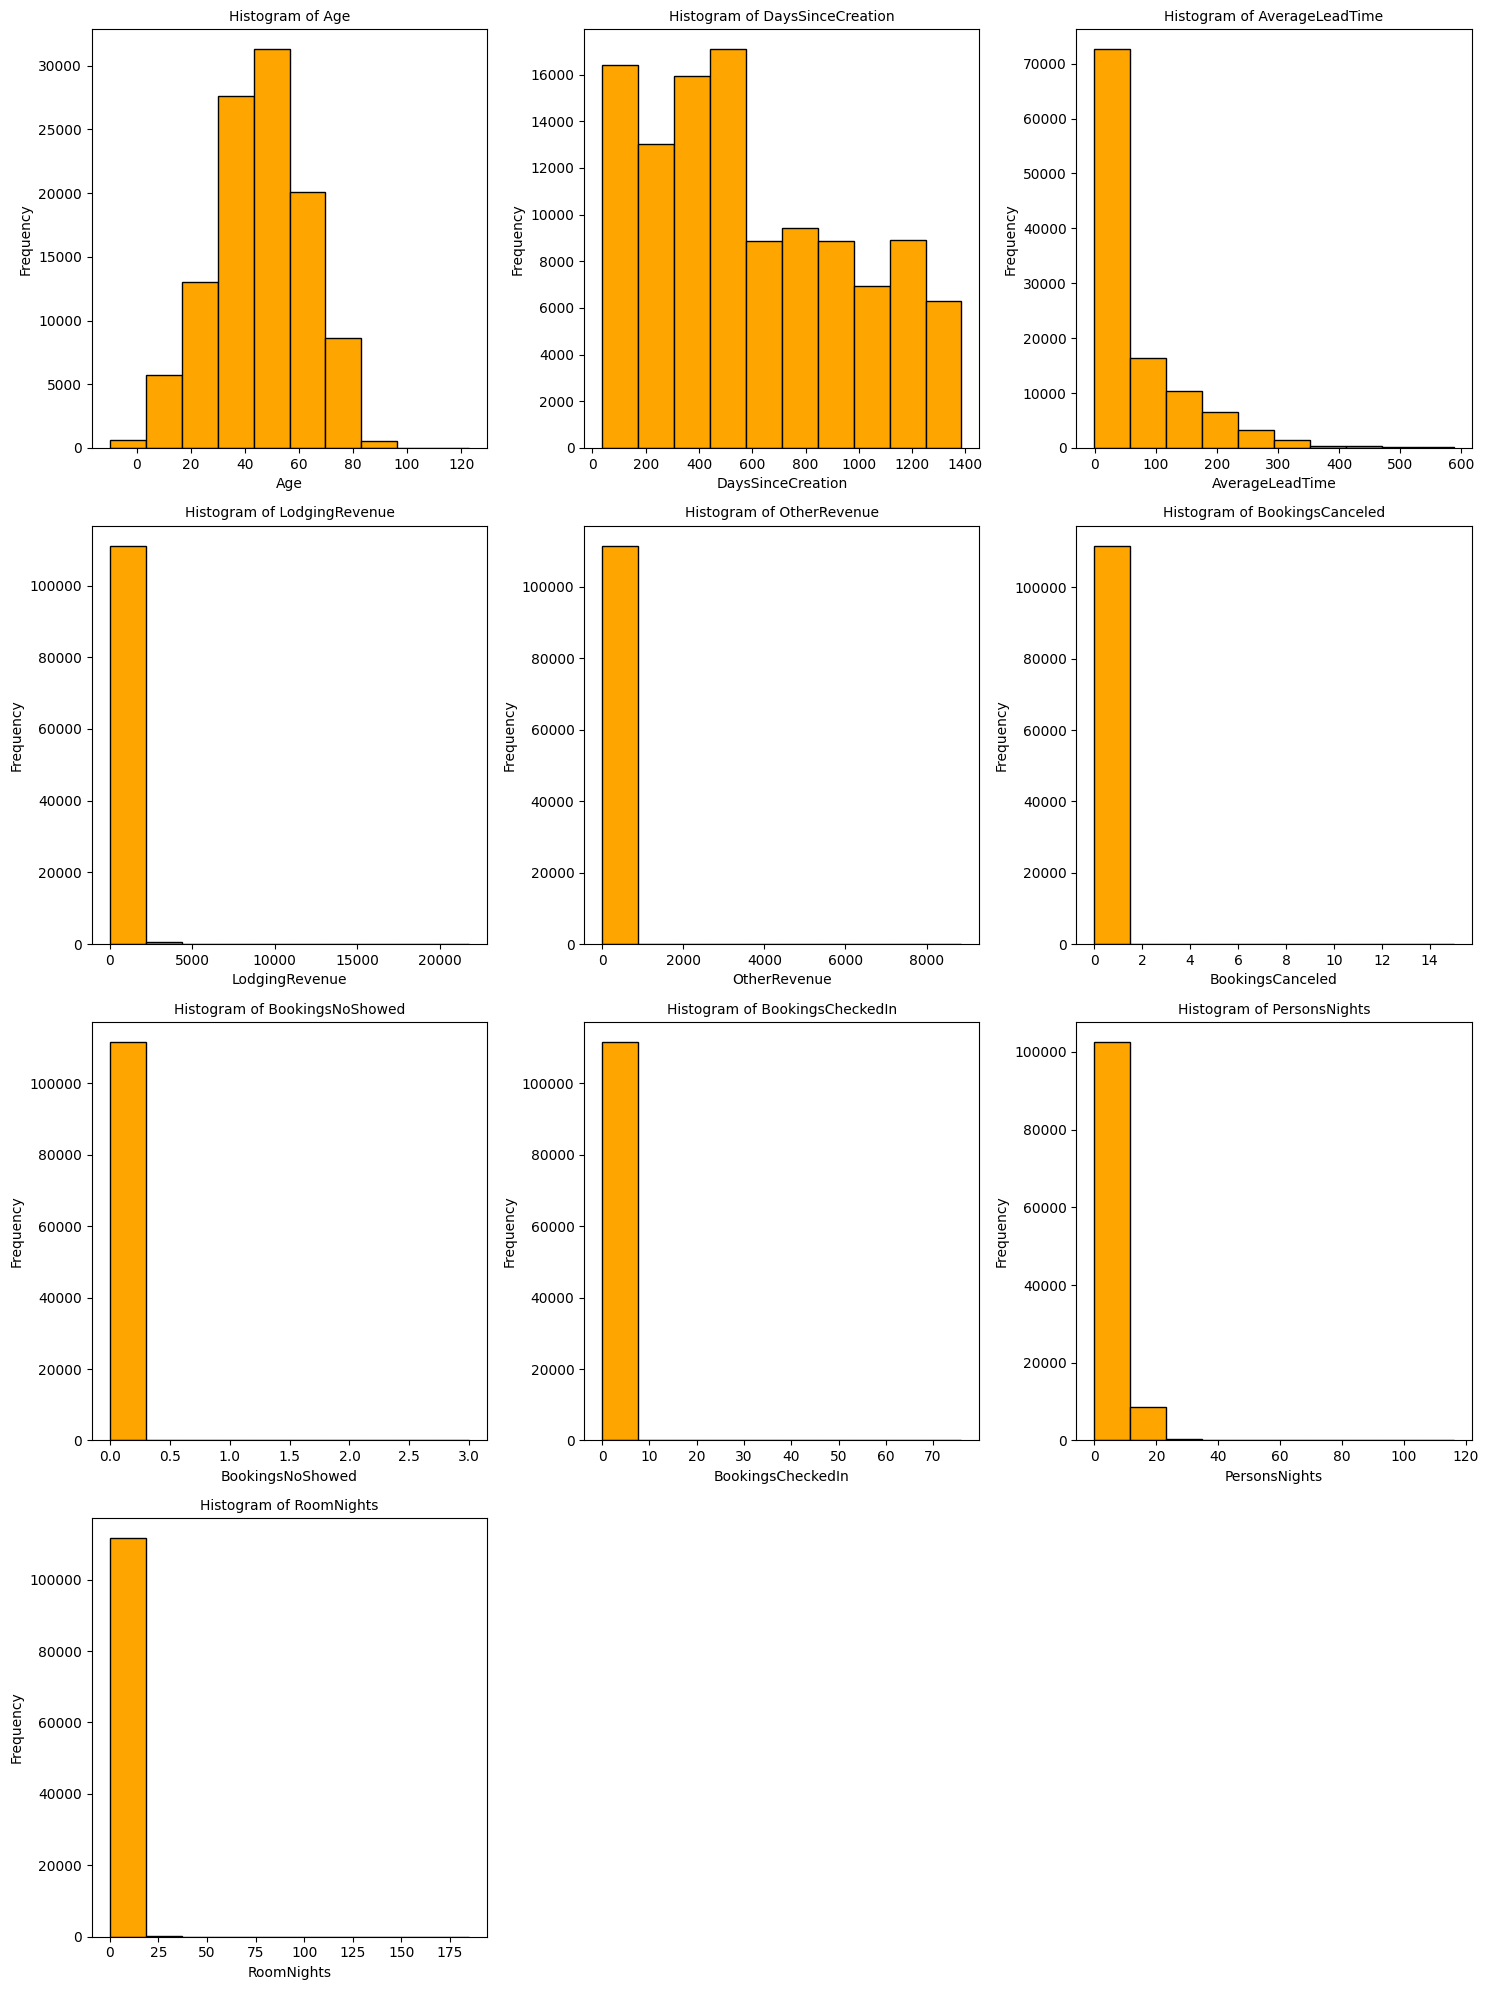

In [55]:
f.histograms(df, num_cols)

Highlights
- age < 0 and > 100
- averageleadtime right skewed (many customers make the reservation on the same day as check in)
- LodgingRevenue and OtherRevenue with mostly low values
- high extremes in BookingsCanceled,BookingsCheckedIn, PersonsNights, RoomNights

In [56]:
for col in num_cols:
    print(df[col].describe())
    print('')
    print('-- / --')
    print('')

count    107561.000000
mean         45.639191
std          17.244952
min         -10.000000
25%          33.000000
50%          47.000000
75%          58.000000
max         123.000000
Name: Age, dtype: float64

-- / --

count    111733.000000
mean        595.026599
std         374.657382
min          36.000000
25%         288.000000
50%         522.000000
75%         889.000000
max        1385.000000
Name: DaysSinceCreation, dtype: float64

-- / --

count    111733.000000
mean         60.833147
std          85.115320
min          -1.000000
25%           0.000000
50%          21.000000
75%          95.000000
max         588.000000
Name: AverageLeadTime, dtype: float64

-- / --

count    111733.000000
mean        283.851283
std         379.131556
min           0.000000
25%           0.000000
50%         208.000000
75%         393.300000
max       21781.000000
Name: LodgingRevenue, dtype: float64

-- / --

count    111733.000000
mean         64.682802
std         123.580715
min           

**Categorical Variables**

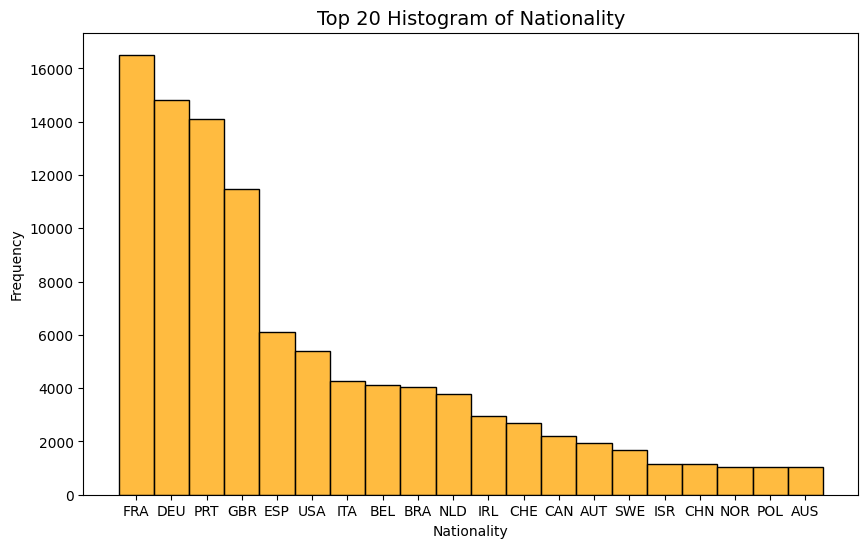

In [57]:
# top 20 because we can clearly see the x-axis labels
f.top_n_histogram(df, categ_cols[0], N = 20)    

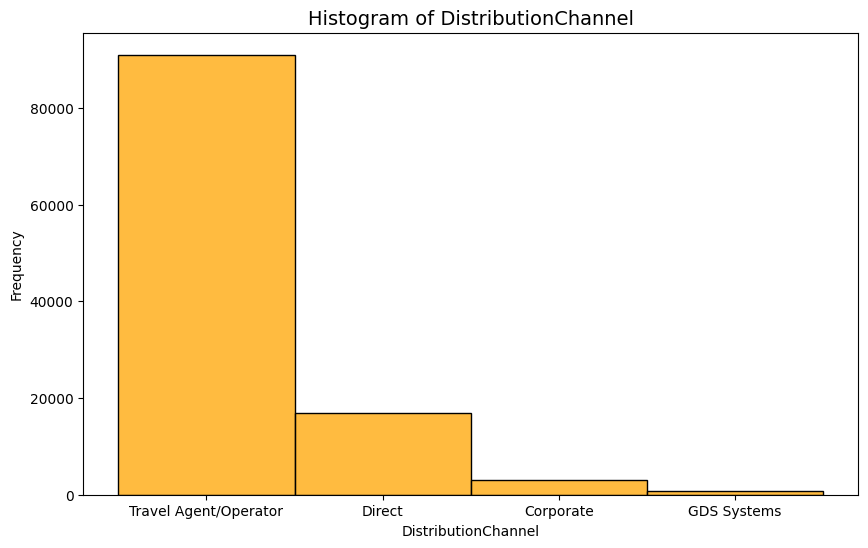

In [58]:
f.unique_histogram(df, categ_cols[3])

- travel agent by far most common
- GDS systems w/ low usage

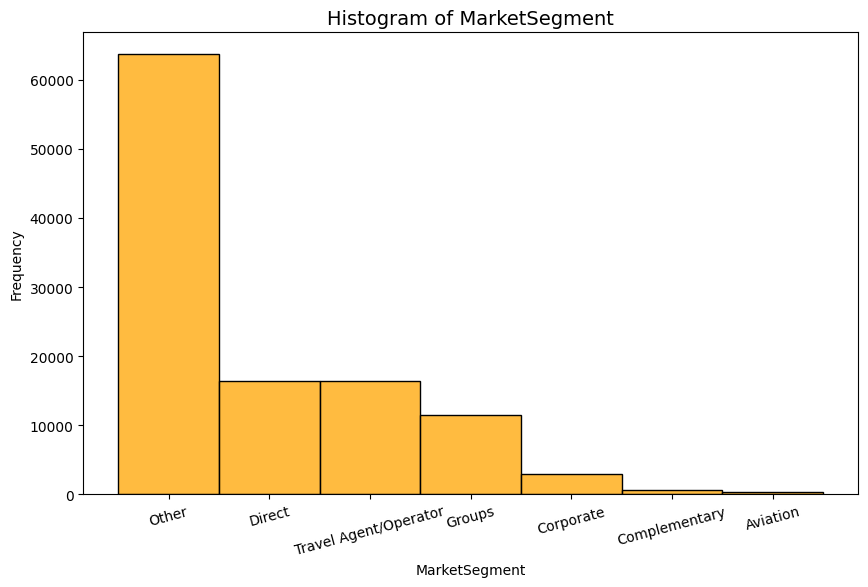

In [59]:
f.unique_histogram(df, categ_cols[4], rotation = 15)

- aviation & complementary very small
- other highest by far

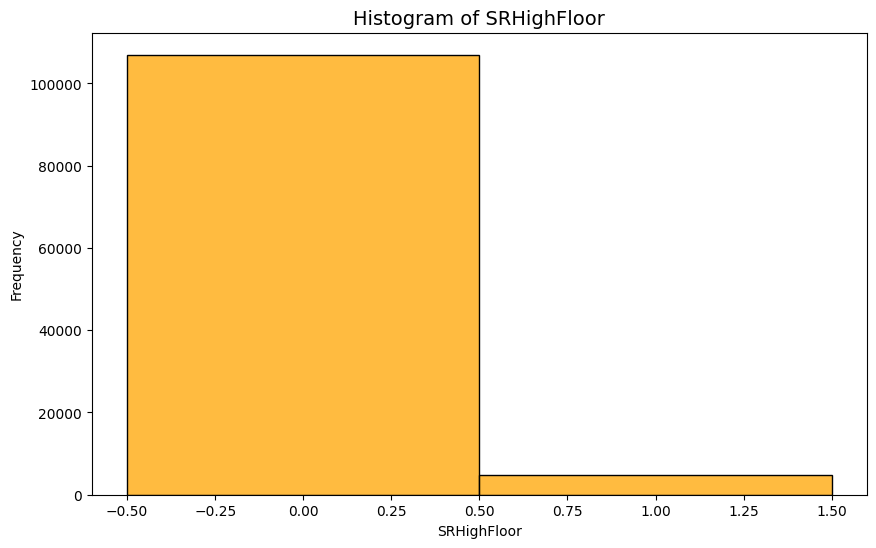

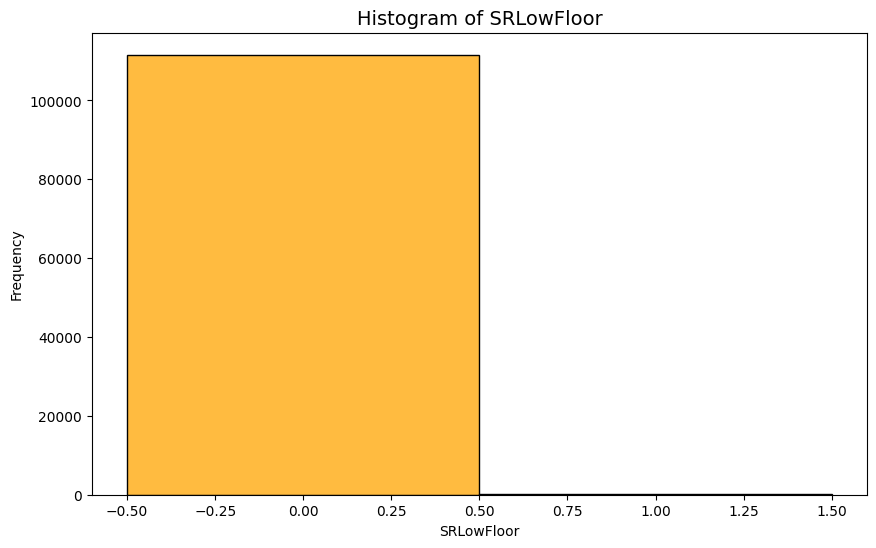

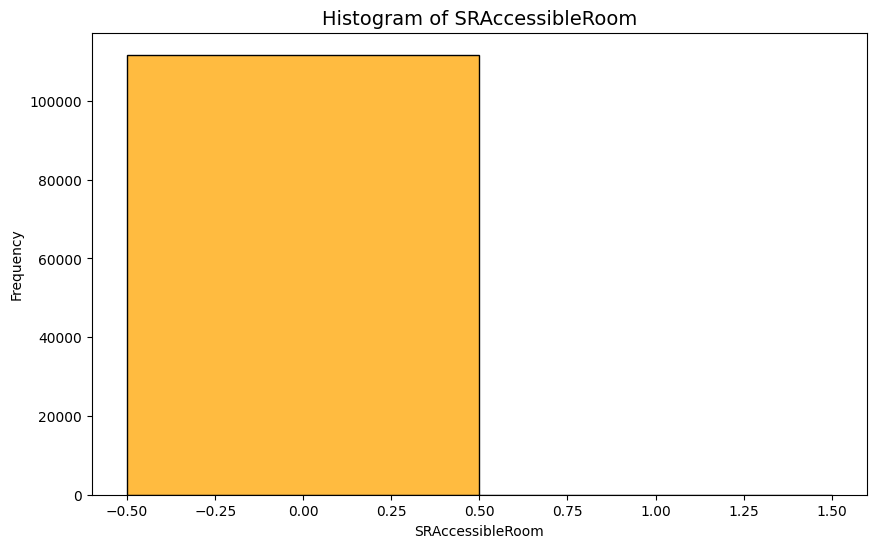

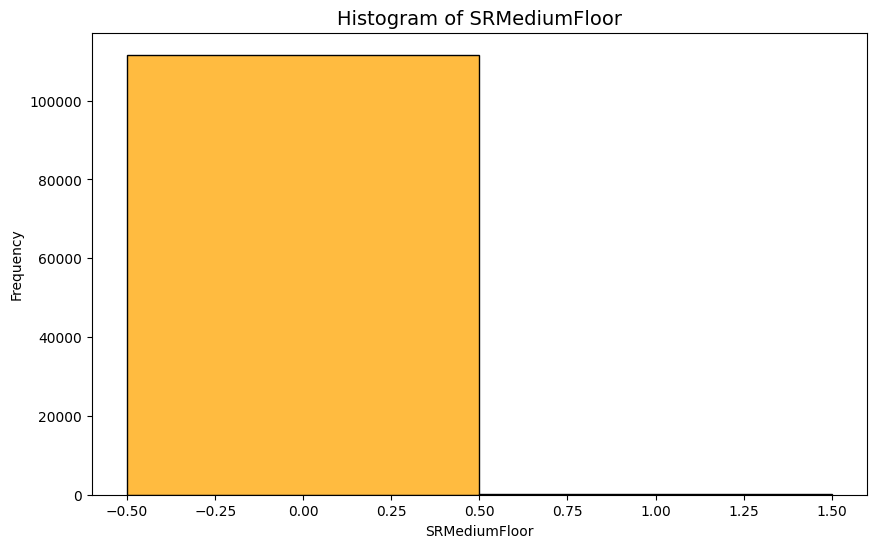

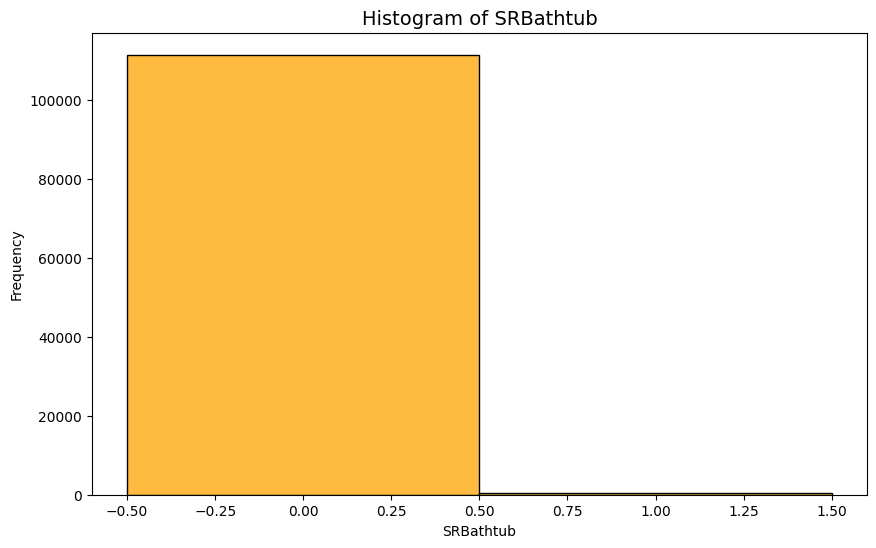

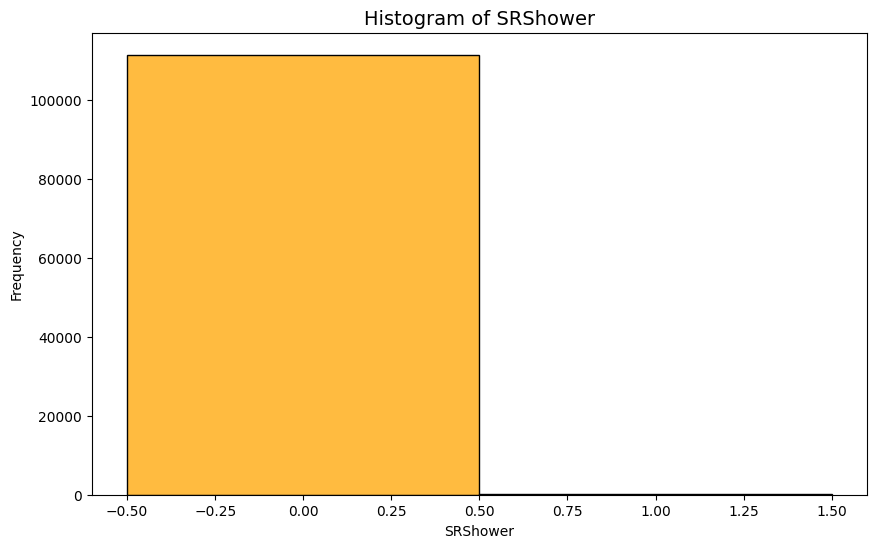

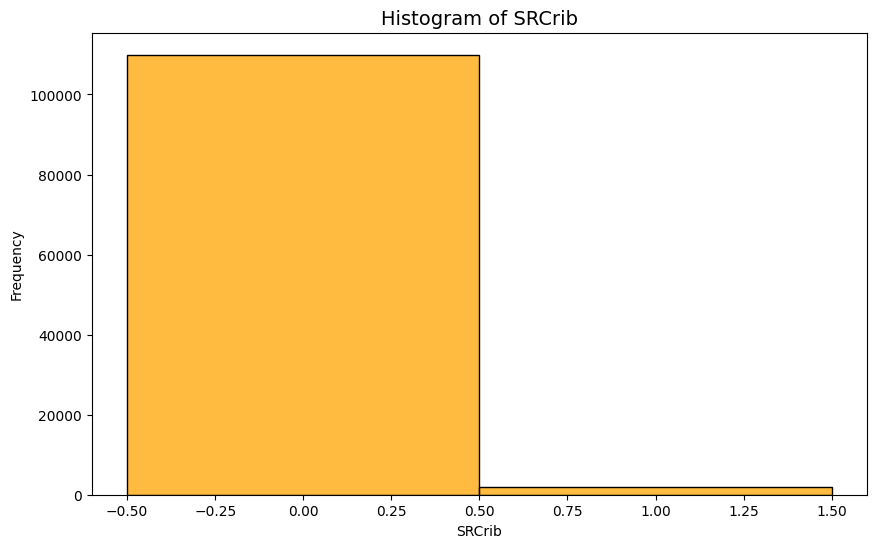

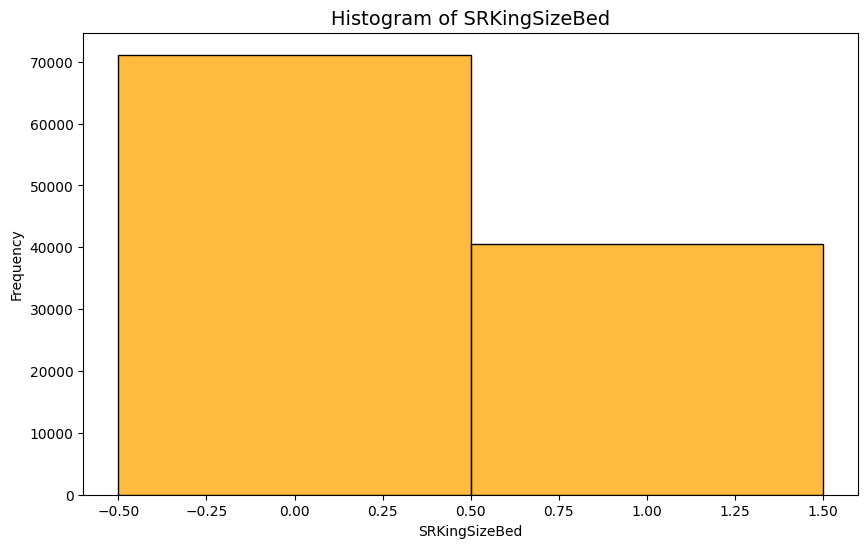

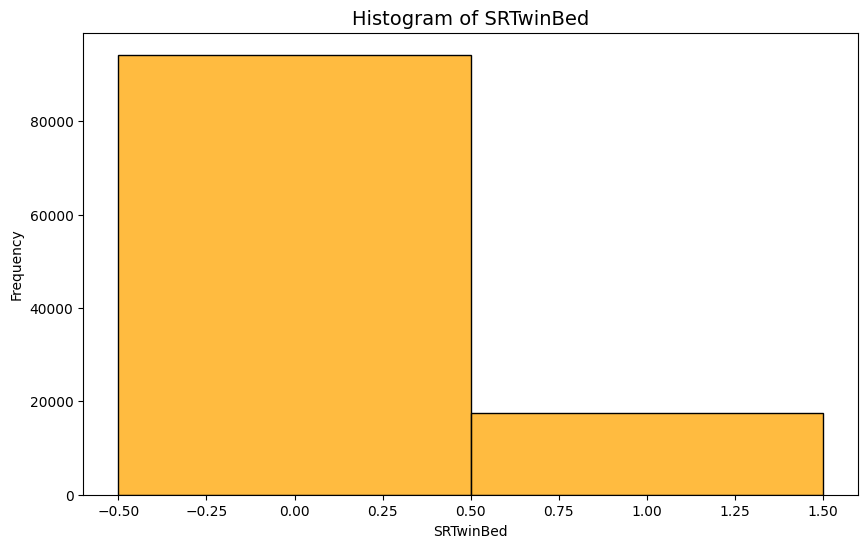

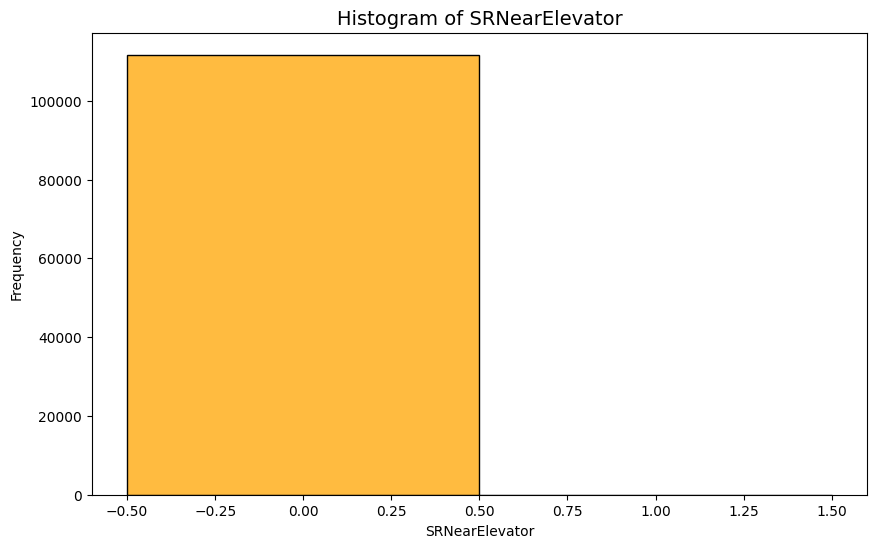

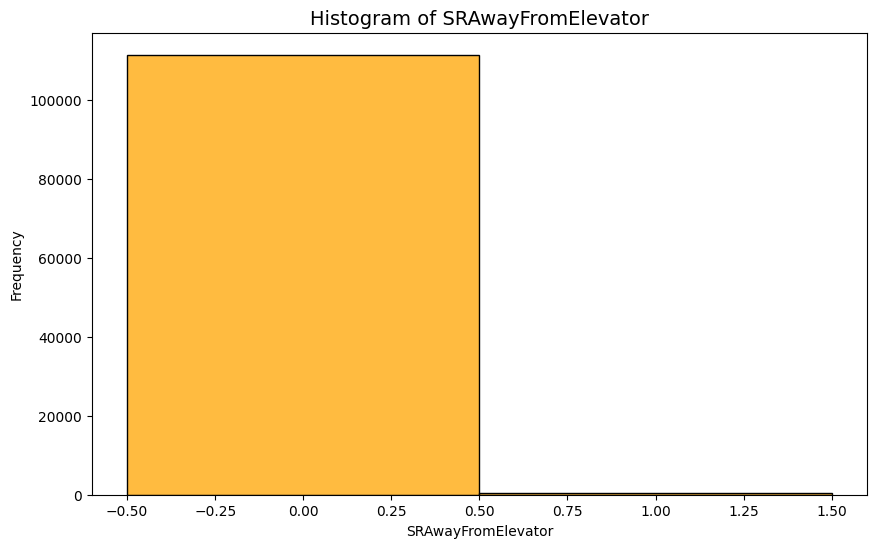

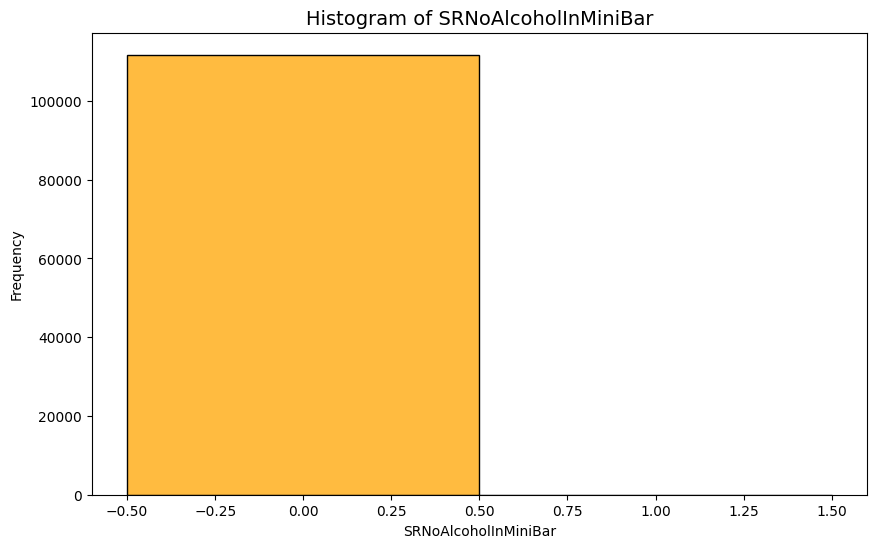

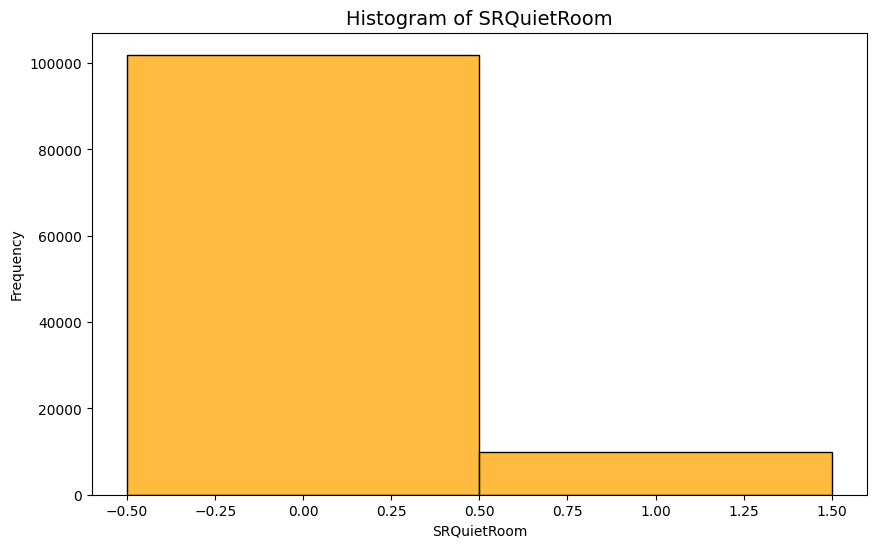

In [60]:
# Plot histogram for each SR column
for col in sr_cols:
    f.unique_histogram(df, col)


In [61]:
for col in sr_cols:
    print(df[col].value_counts())
    print('')

SRHighFloor
0    106983
1      4750
Name: count, dtype: int64

SRLowFloor
0    111587
1       146
Name: count, dtype: int64

SRAccessibleRoom
0    111708
1        25
Name: count, dtype: int64

SRMediumFloor
0    111647
1        86
Name: count, dtype: int64

SRBathtub
0    111383
1       350
Name: count, dtype: int64

SRShower
0    111551
1       182
Name: count, dtype: int64

SRCrib
0    109925
1      1808
Name: count, dtype: int64

SRKingSizeBed
0    71144
1    40589
Name: count, dtype: int64

SRTwinBed
0    94212
1    17521
Name: count, dtype: int64

SRNearElevator
0    111696
1        37
Name: count, dtype: int64

SRAwayFromElevator
0    111331
1       402
Name: count, dtype: int64

SRNoAlcoholInMiniBar
0    111711
1        22
Name: count, dtype: int64

SRQuietRoom
0    101932
1      9801
Name: count, dtype: int64



cols with a LOT of zeros (<100 ones):
- SRAccessibleRoom
- SRMediumFloor
- SRNearElevator
- SRNoAlcoholInMiniBar

### 2.1.2 Bivariate Analysis

**Numerical vs Numerical**

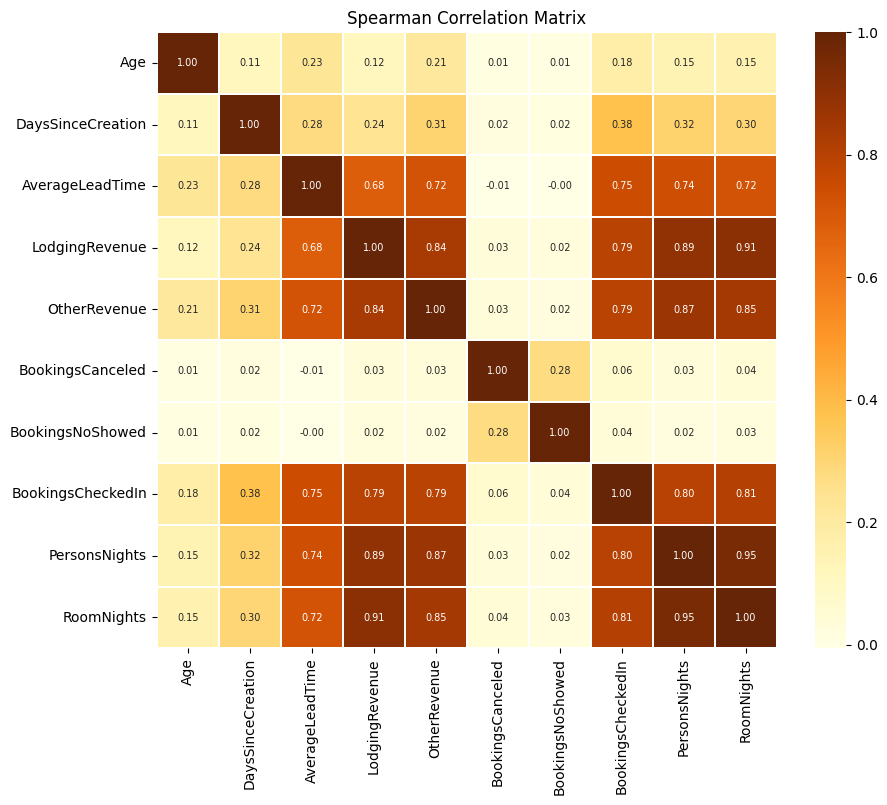

In [62]:
# Remove rows with missing values
temp = df.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.1, fmt='.2f', annot_kws={"size": 7})
plt.title("Spearman Correlation Matrix")
plt.show()


In [63]:
# Mask correlations less than 0.85 and stack the result into a series
filtered_corr = correlation_matrix.where(correlation_matrix > 0.85).stack()

# Create a DataFrame from the filtered correlations
filtered_corr_df = filtered_corr.reset_index(name='correlation')

# Remove duplicate pairs 
filtered_corr_df = filtered_corr_df[filtered_corr_df['level_0'] < filtered_corr_df['level_1']]
filtered_corr_df

level_0        level_1  correlation
4   LodgingRevenue  PersonsNights     0.891974
5   LodgingRevenue     RoomNights     0.908866
7     OtherRevenue  PersonsNights     0.869598
14   PersonsNights     RoomNights     0.951928

In [64]:
def plot_pairwise_relationship(df, num_columns):

    # Create a pairplot with only the lower triangle
    g = sns.pairplot(df[num_columns], kind='scatter', 
                 hue=None, plot_kws={'s': 10, 'color': 'orange'}, 
                 corner=True) 
    
    # Update the diagonal plots to be orange
    for ax in g.diag_axes:
        for patch in ax.patches:
            patch.set_facecolor('orange')

        
    plt.show()

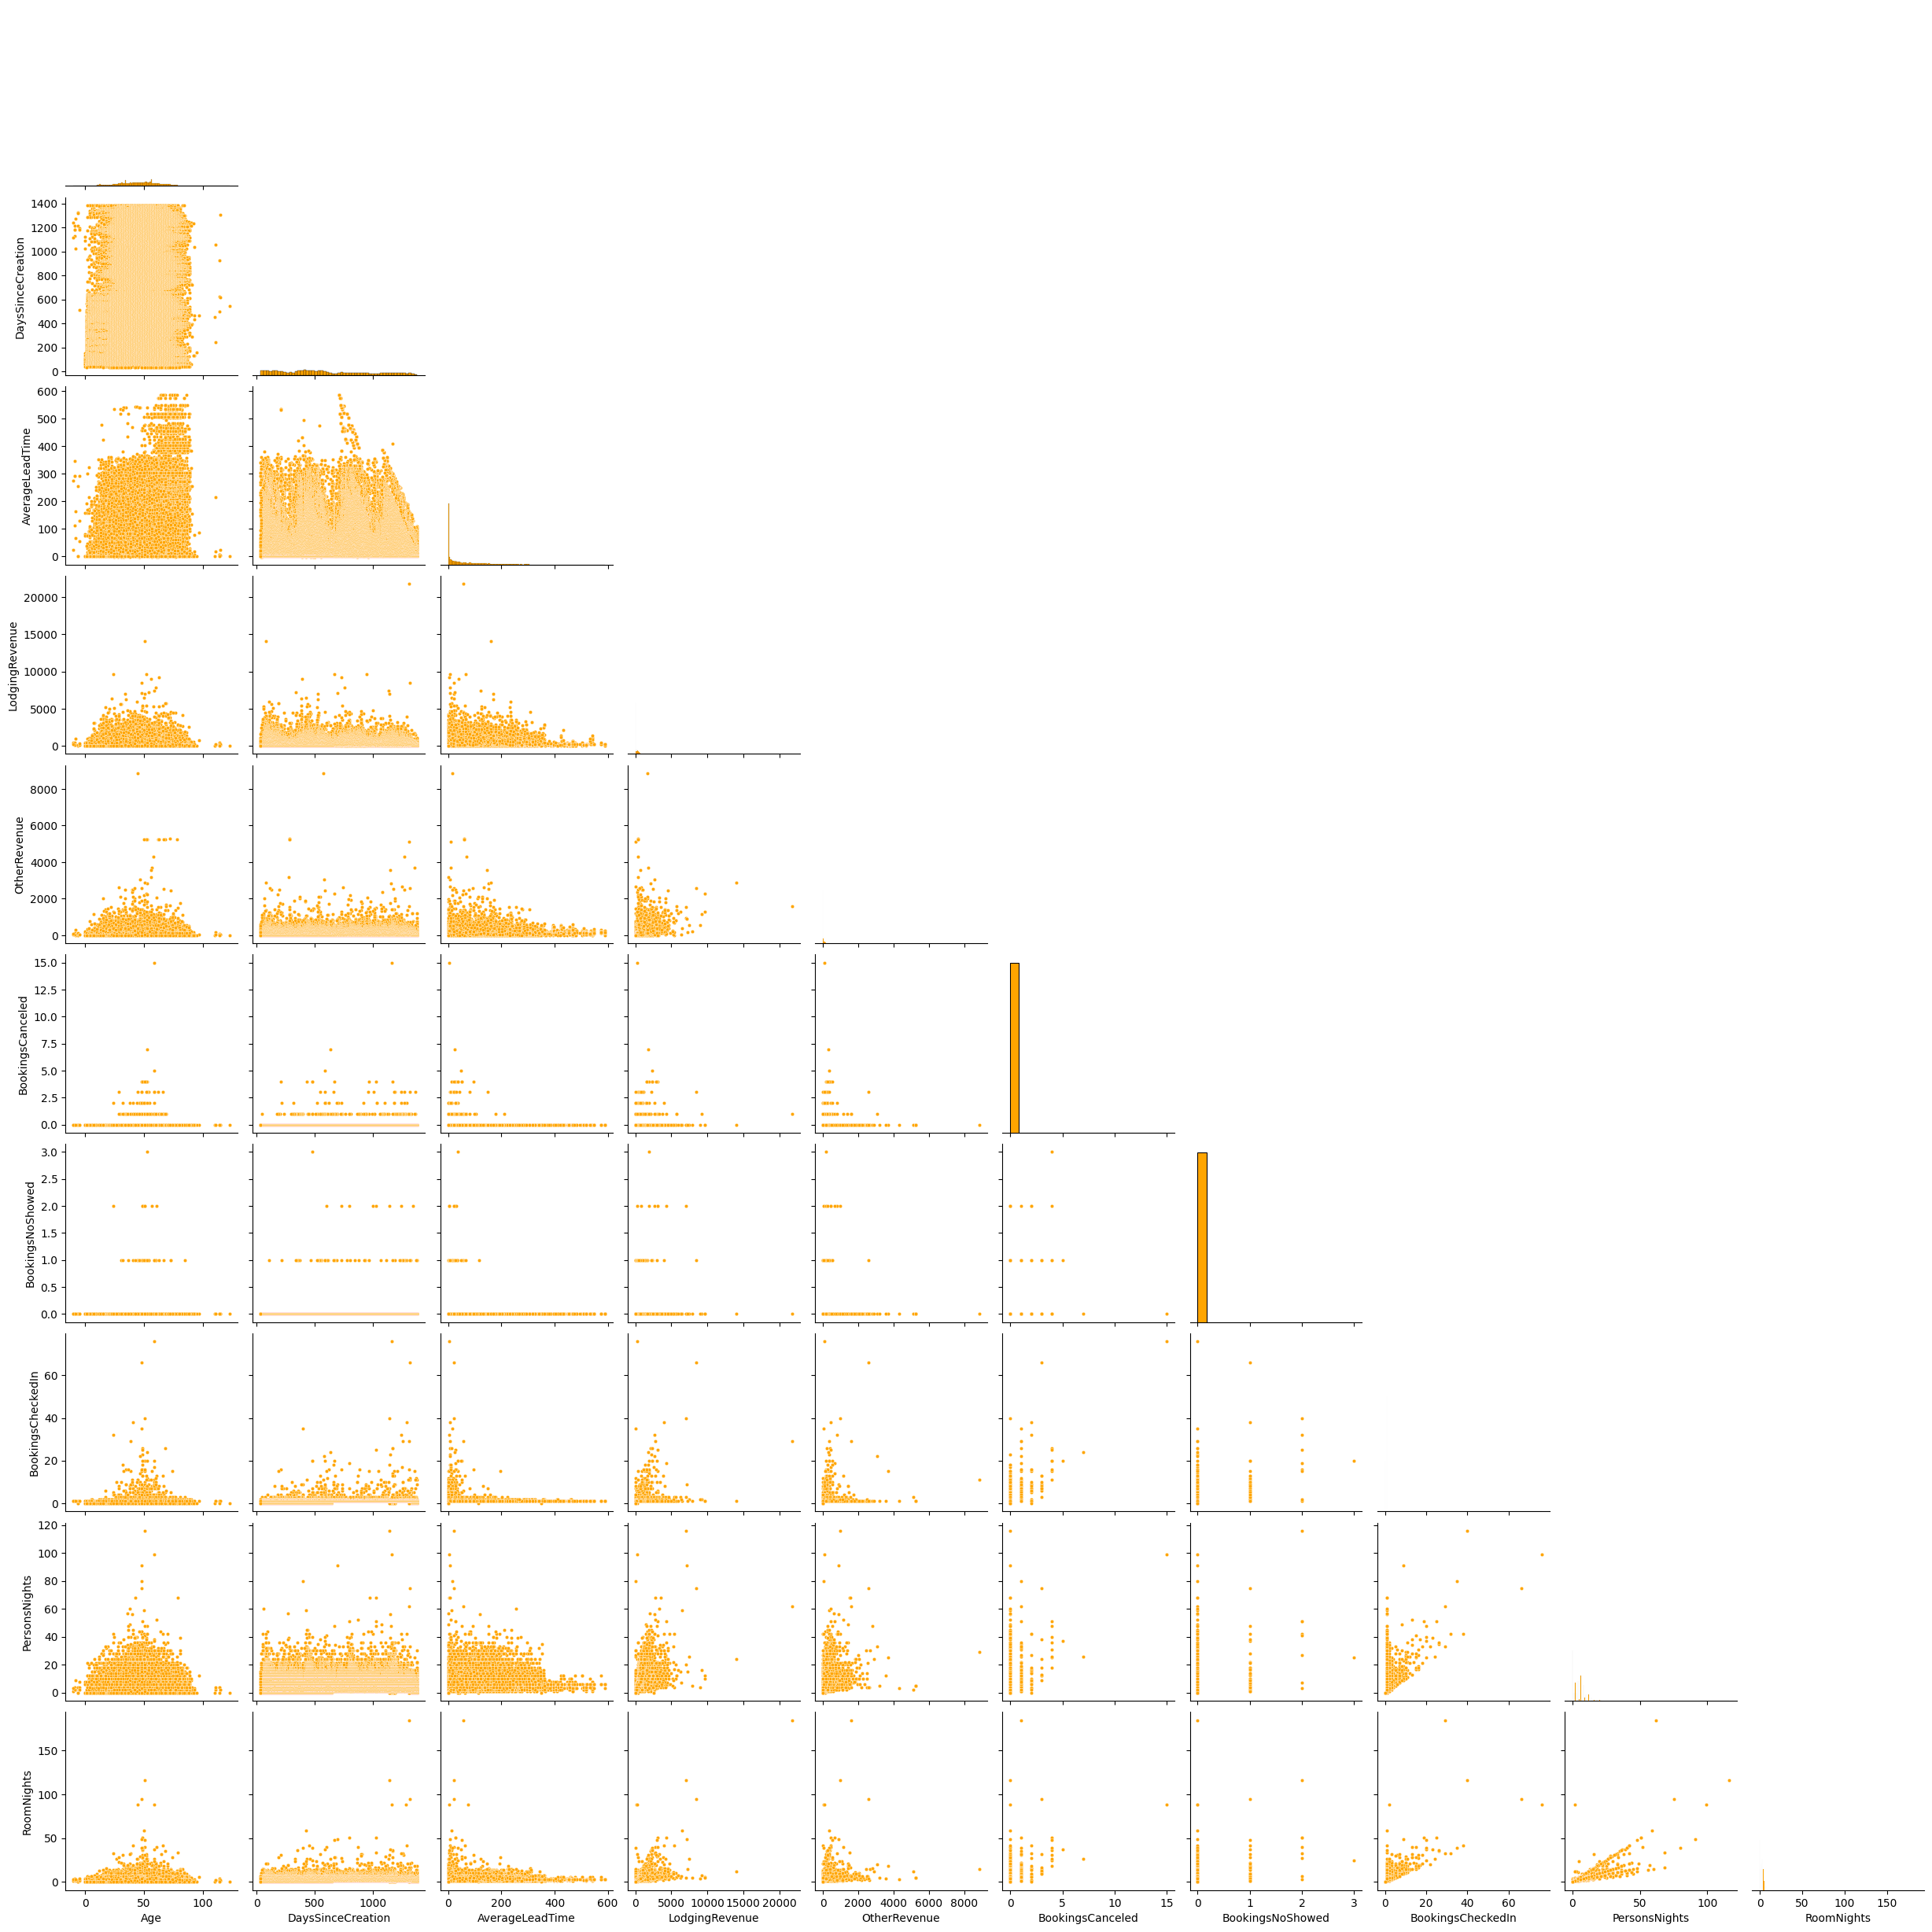

In [65]:
plot_pairwise_relationship(df, num_cols)

**Numerical vs Categorical**

In [66]:
# categ_cols

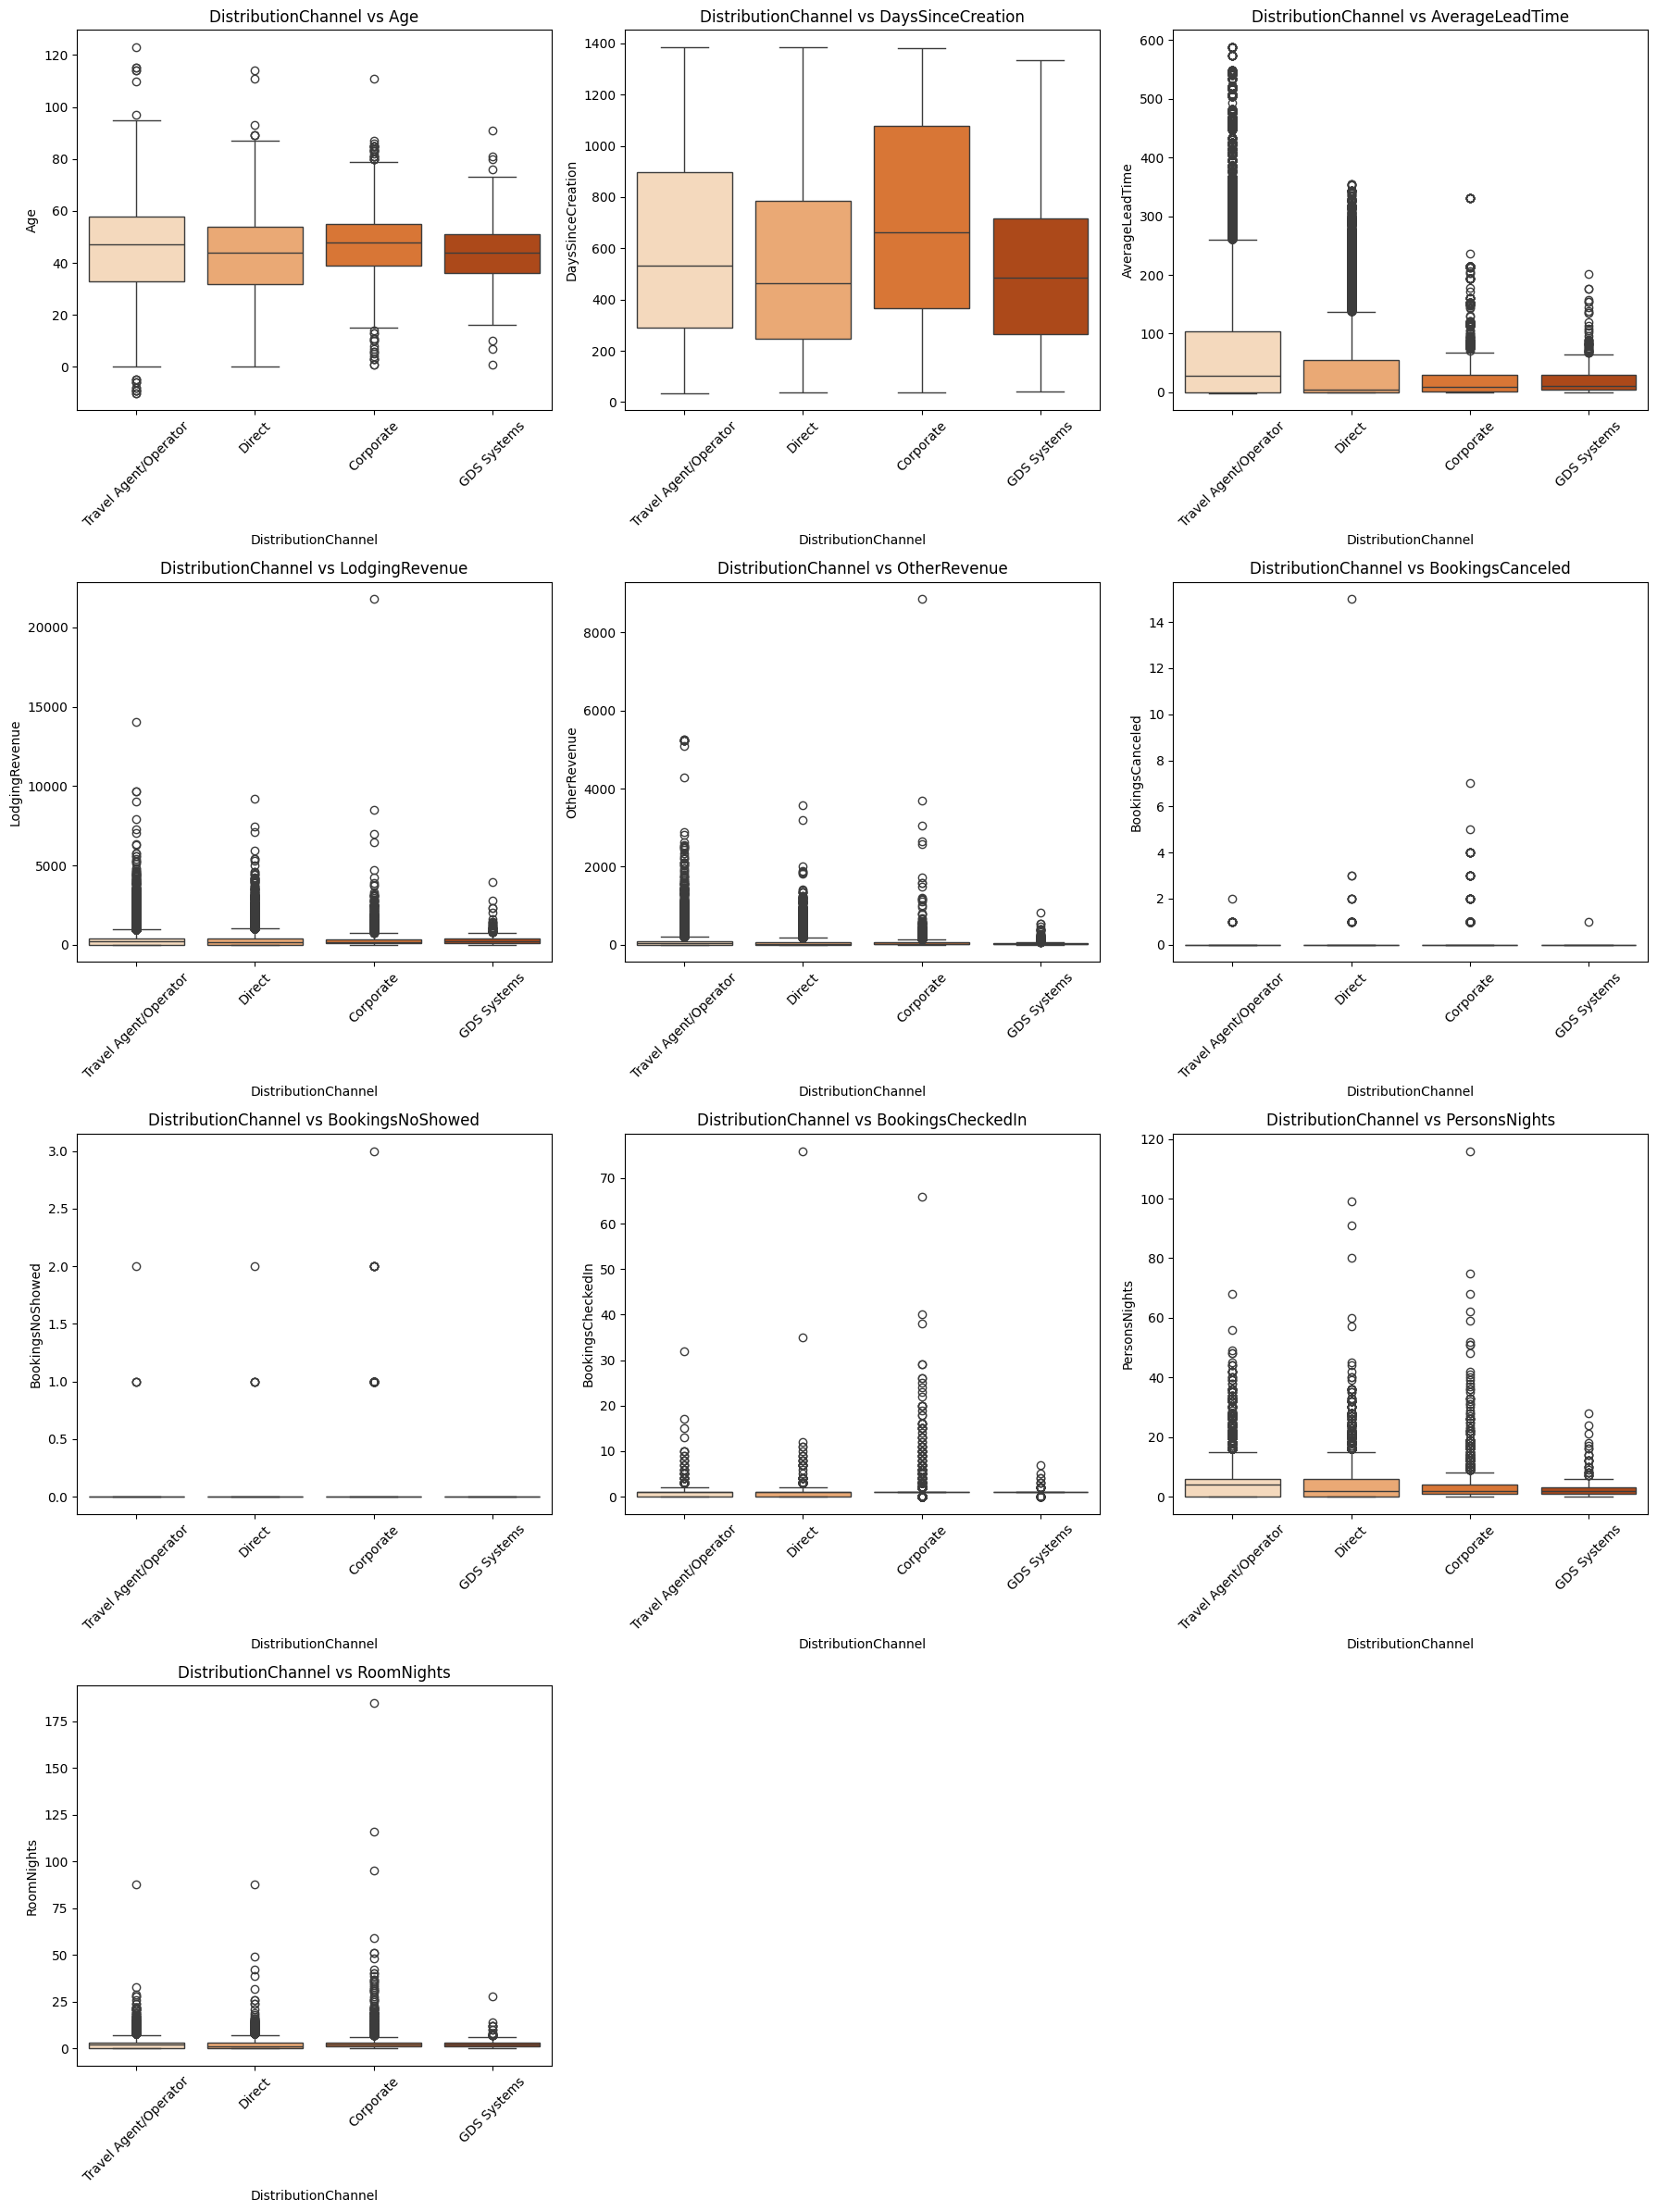

In [67]:
f.boxplots(df, [categ_cols[3]], num_cols)

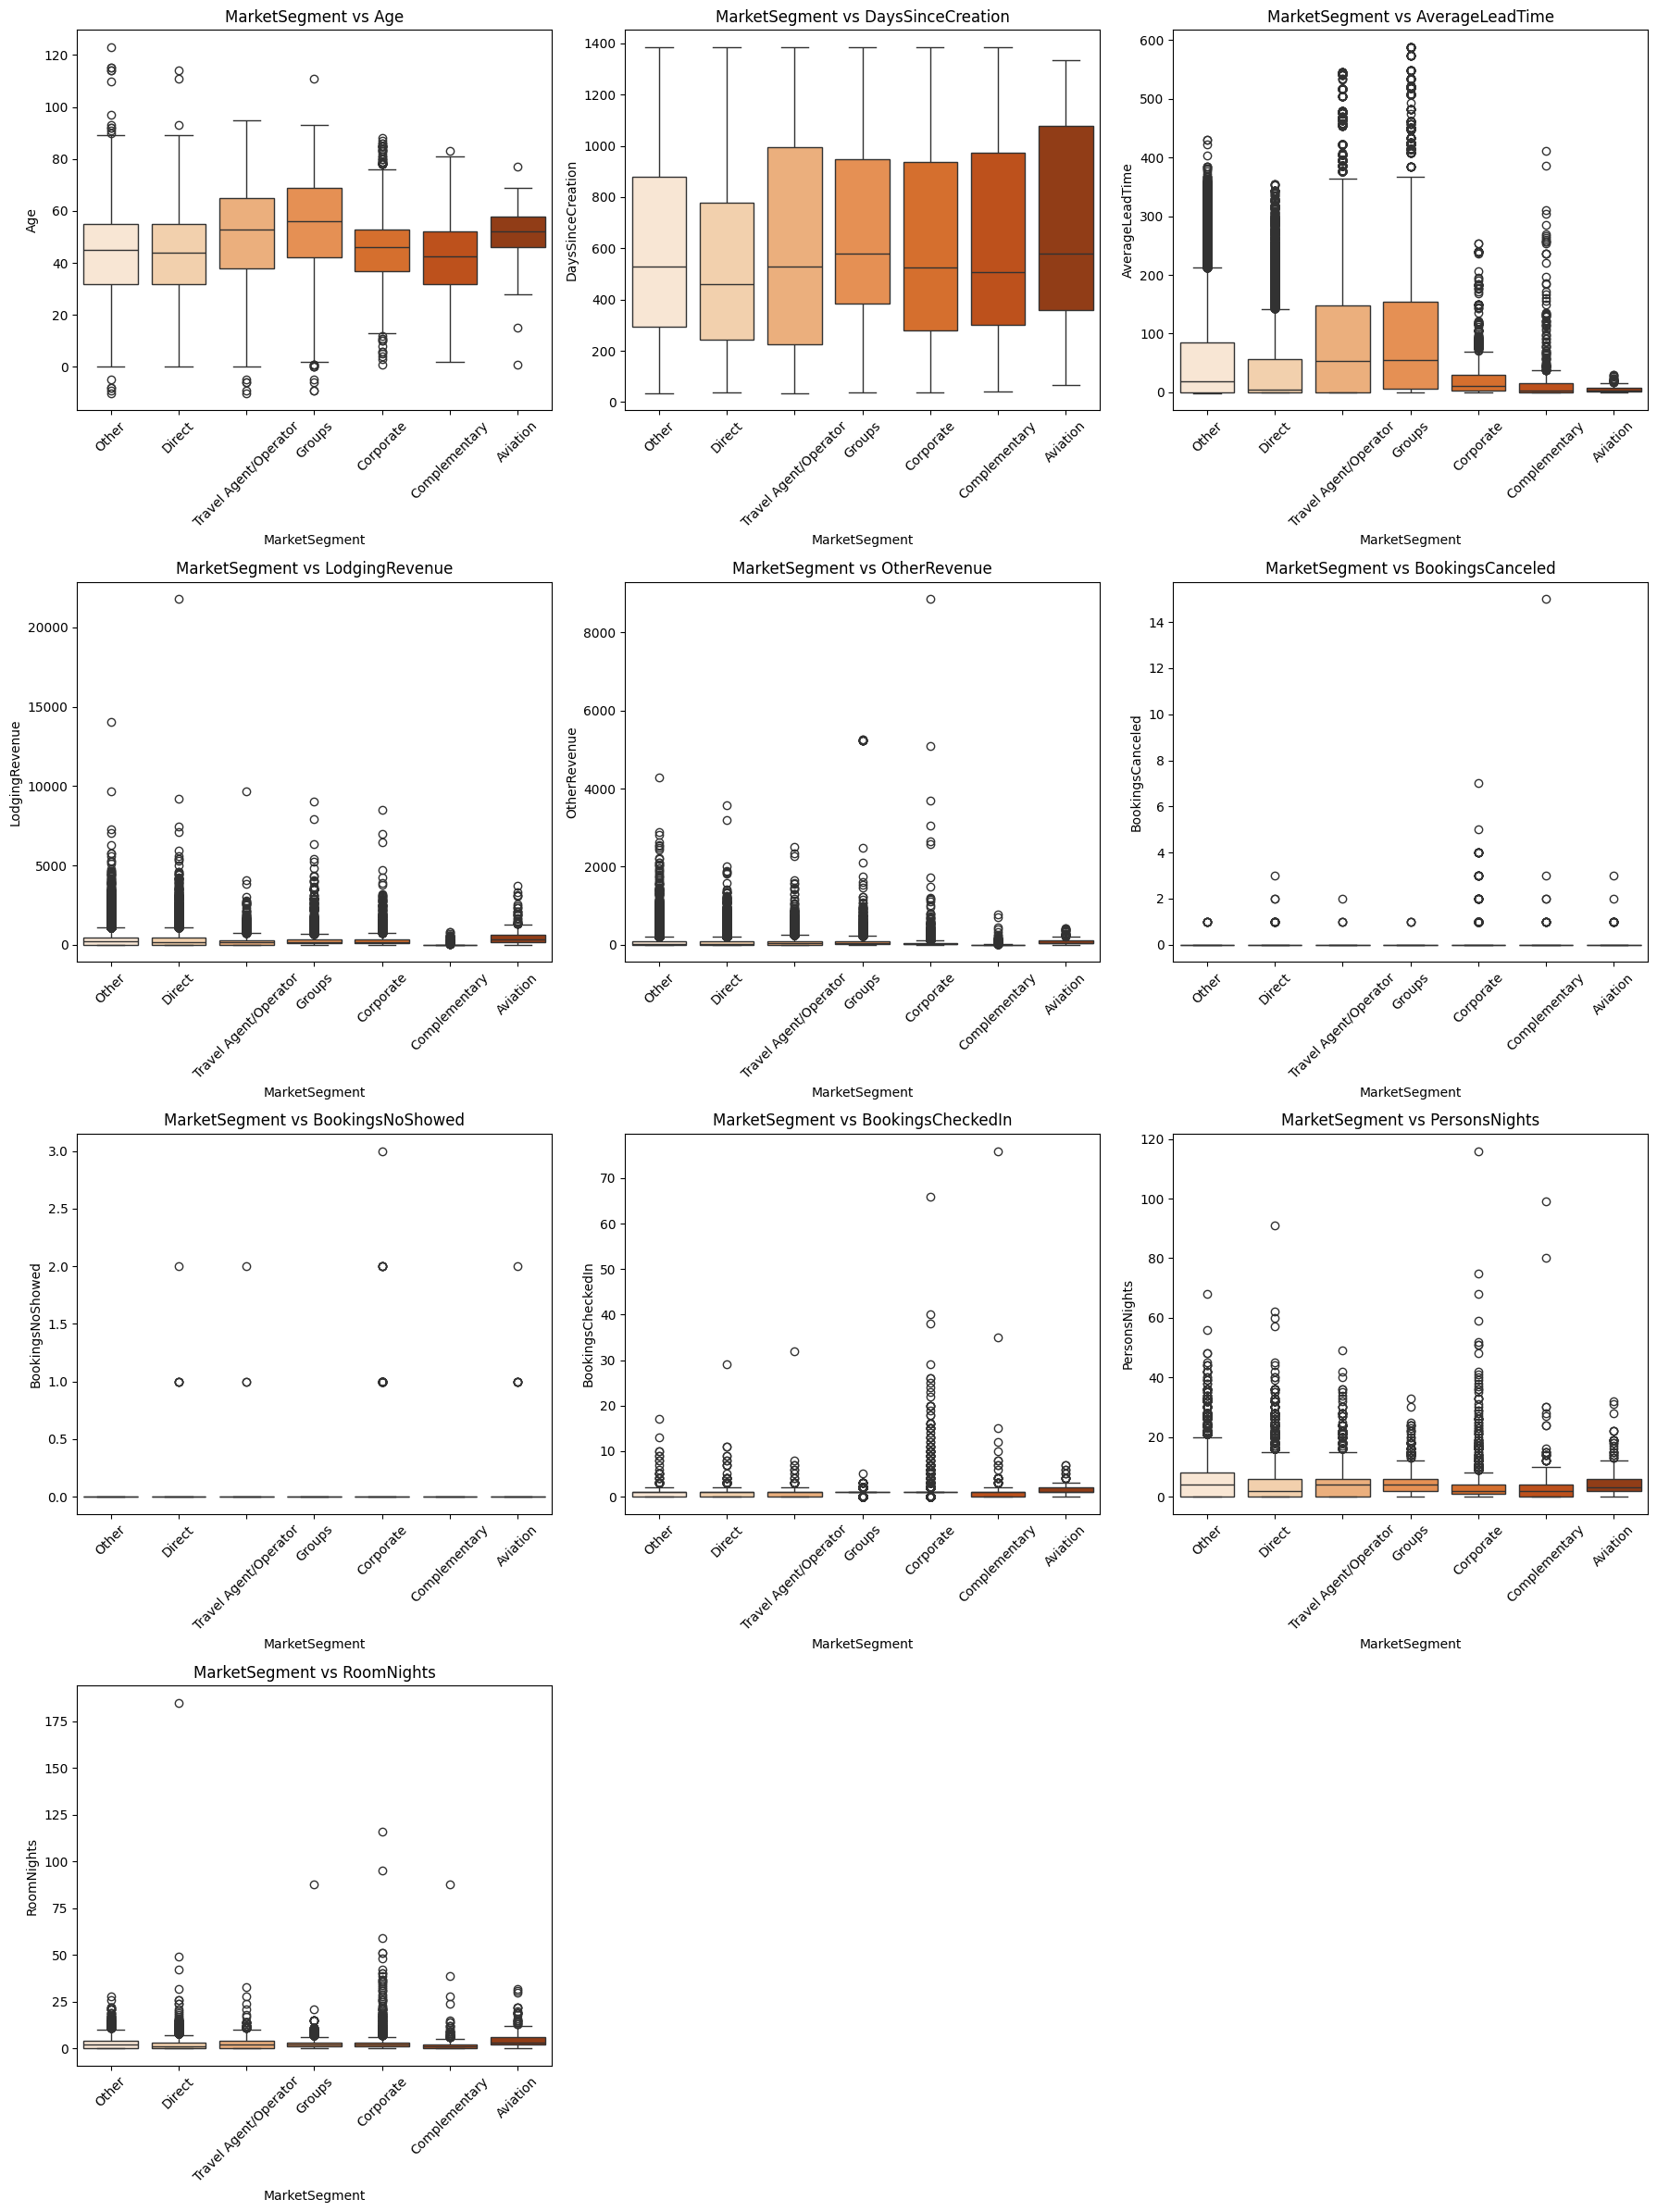

In [68]:
f.boxplots(df, [categ_cols[4]], num_cols)

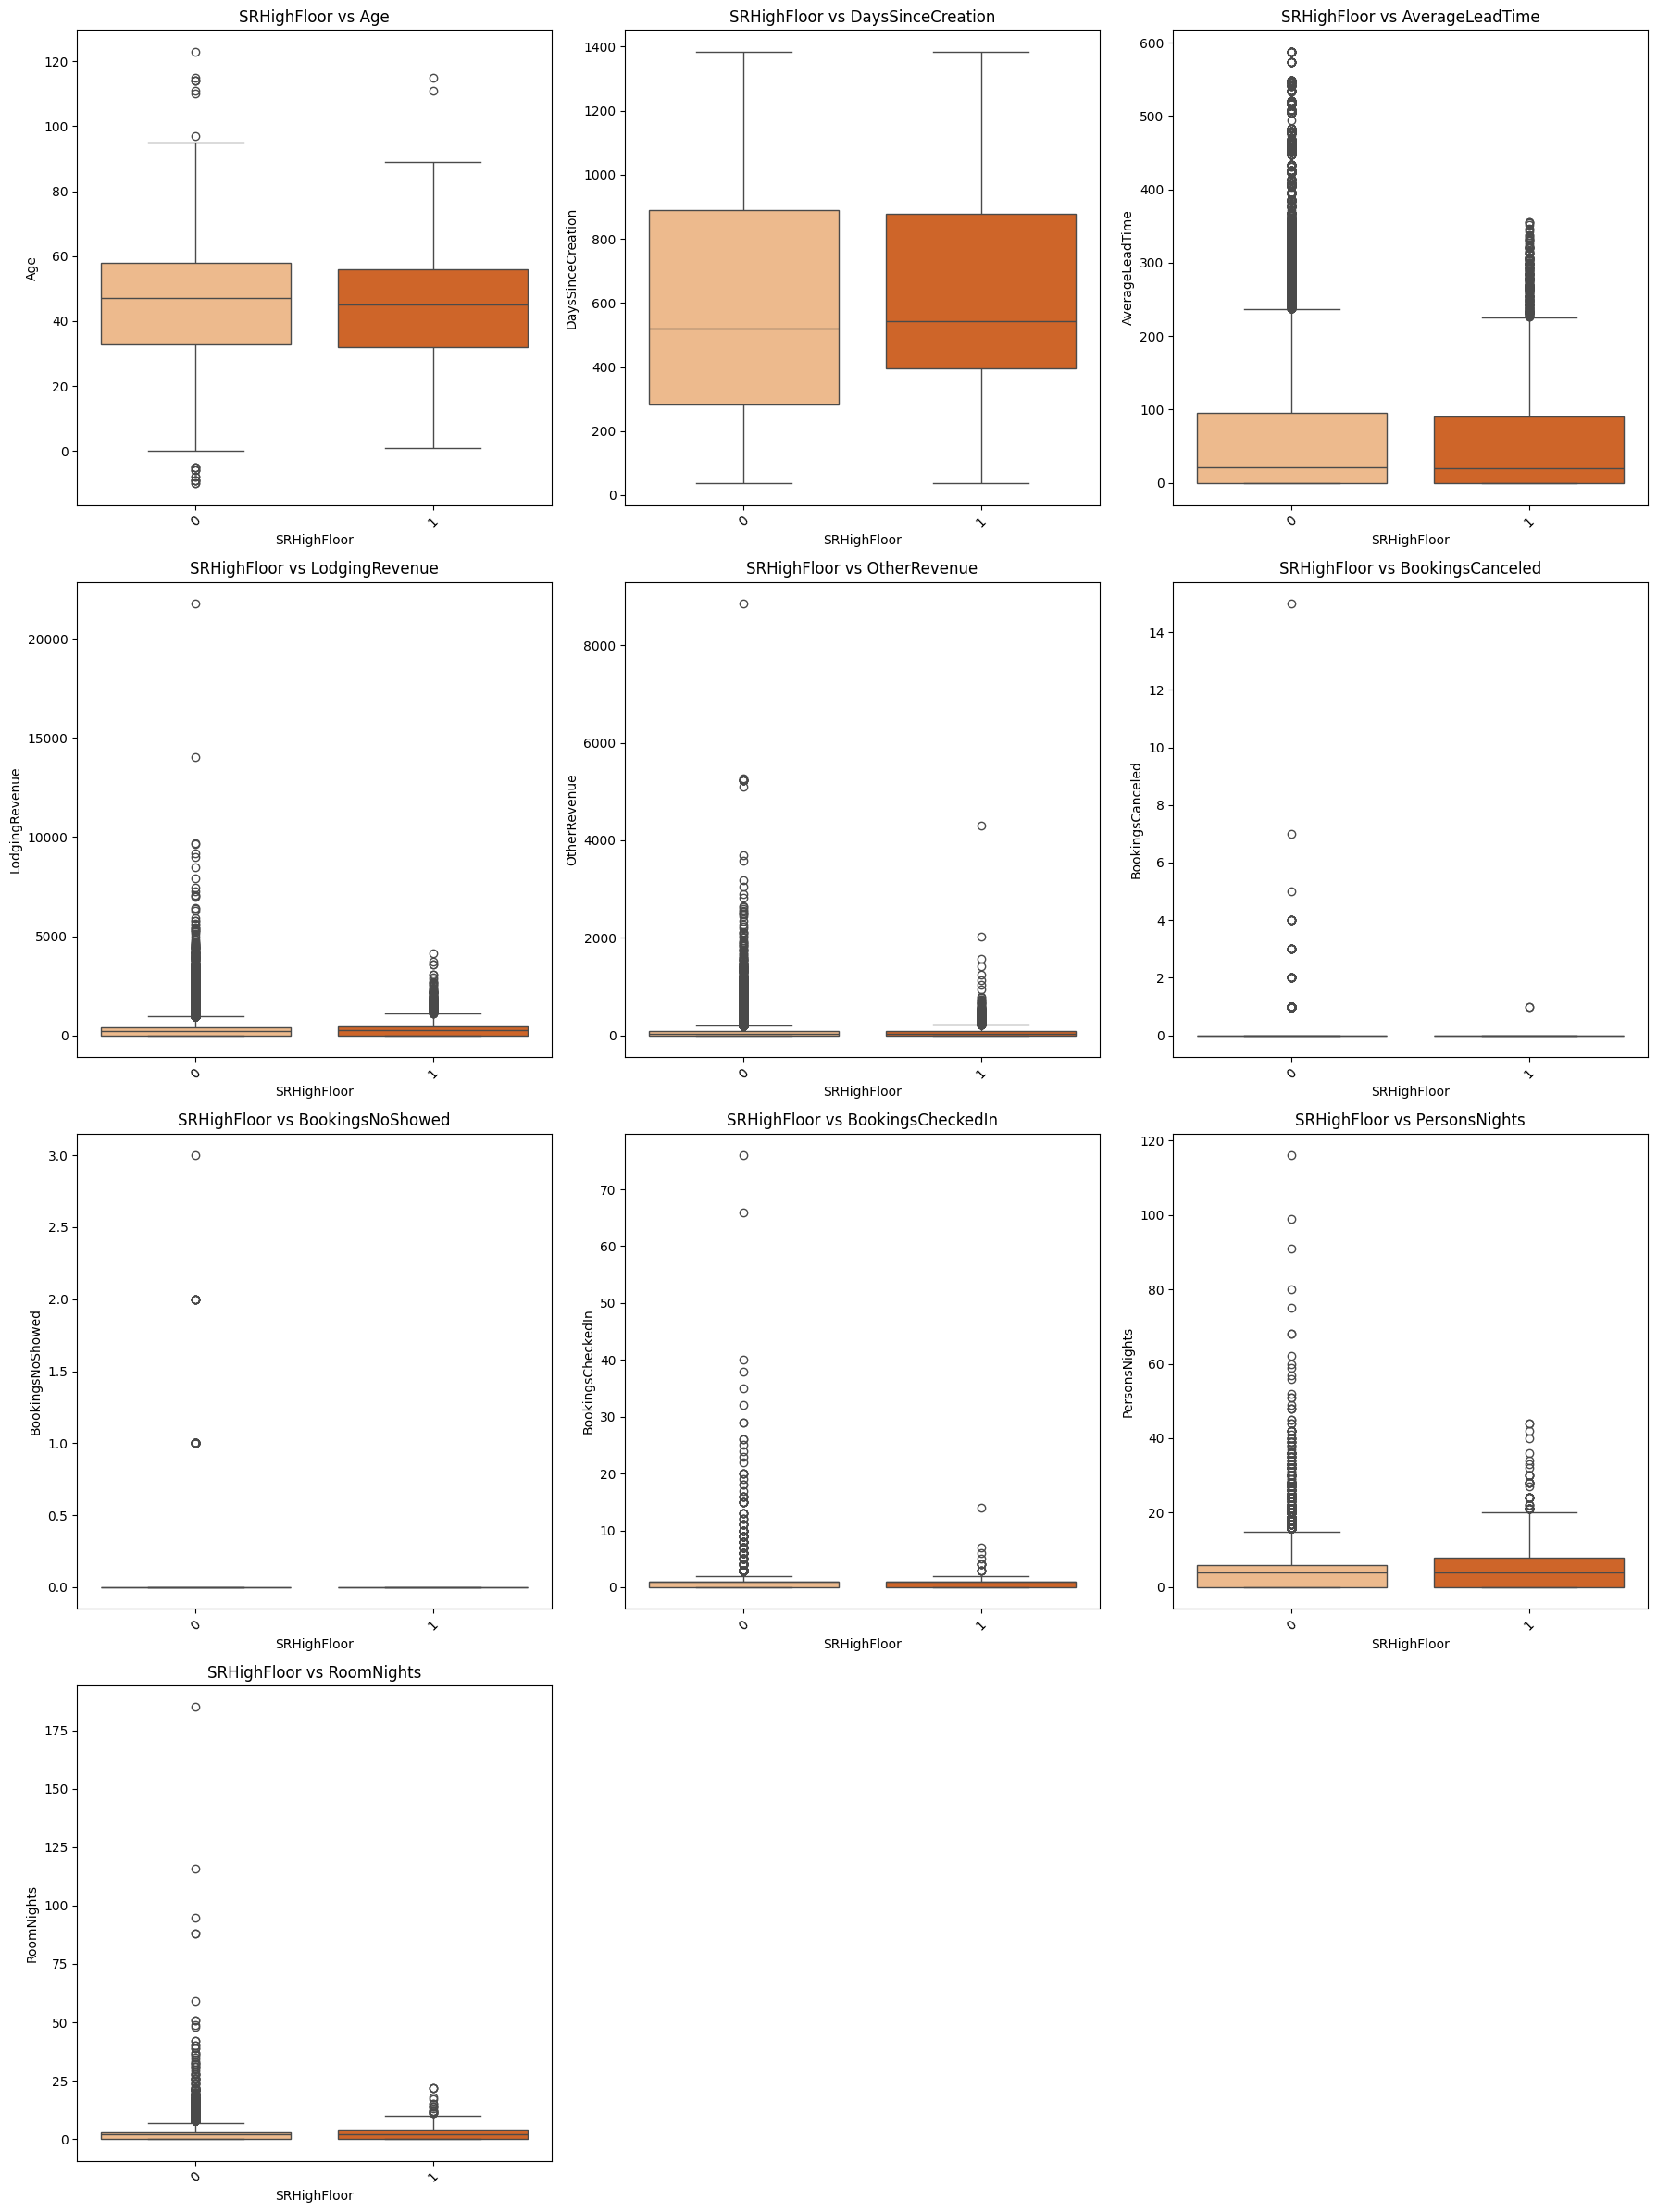

In [69]:
f.boxplots(df, [categ_cols[5]], num_cols)

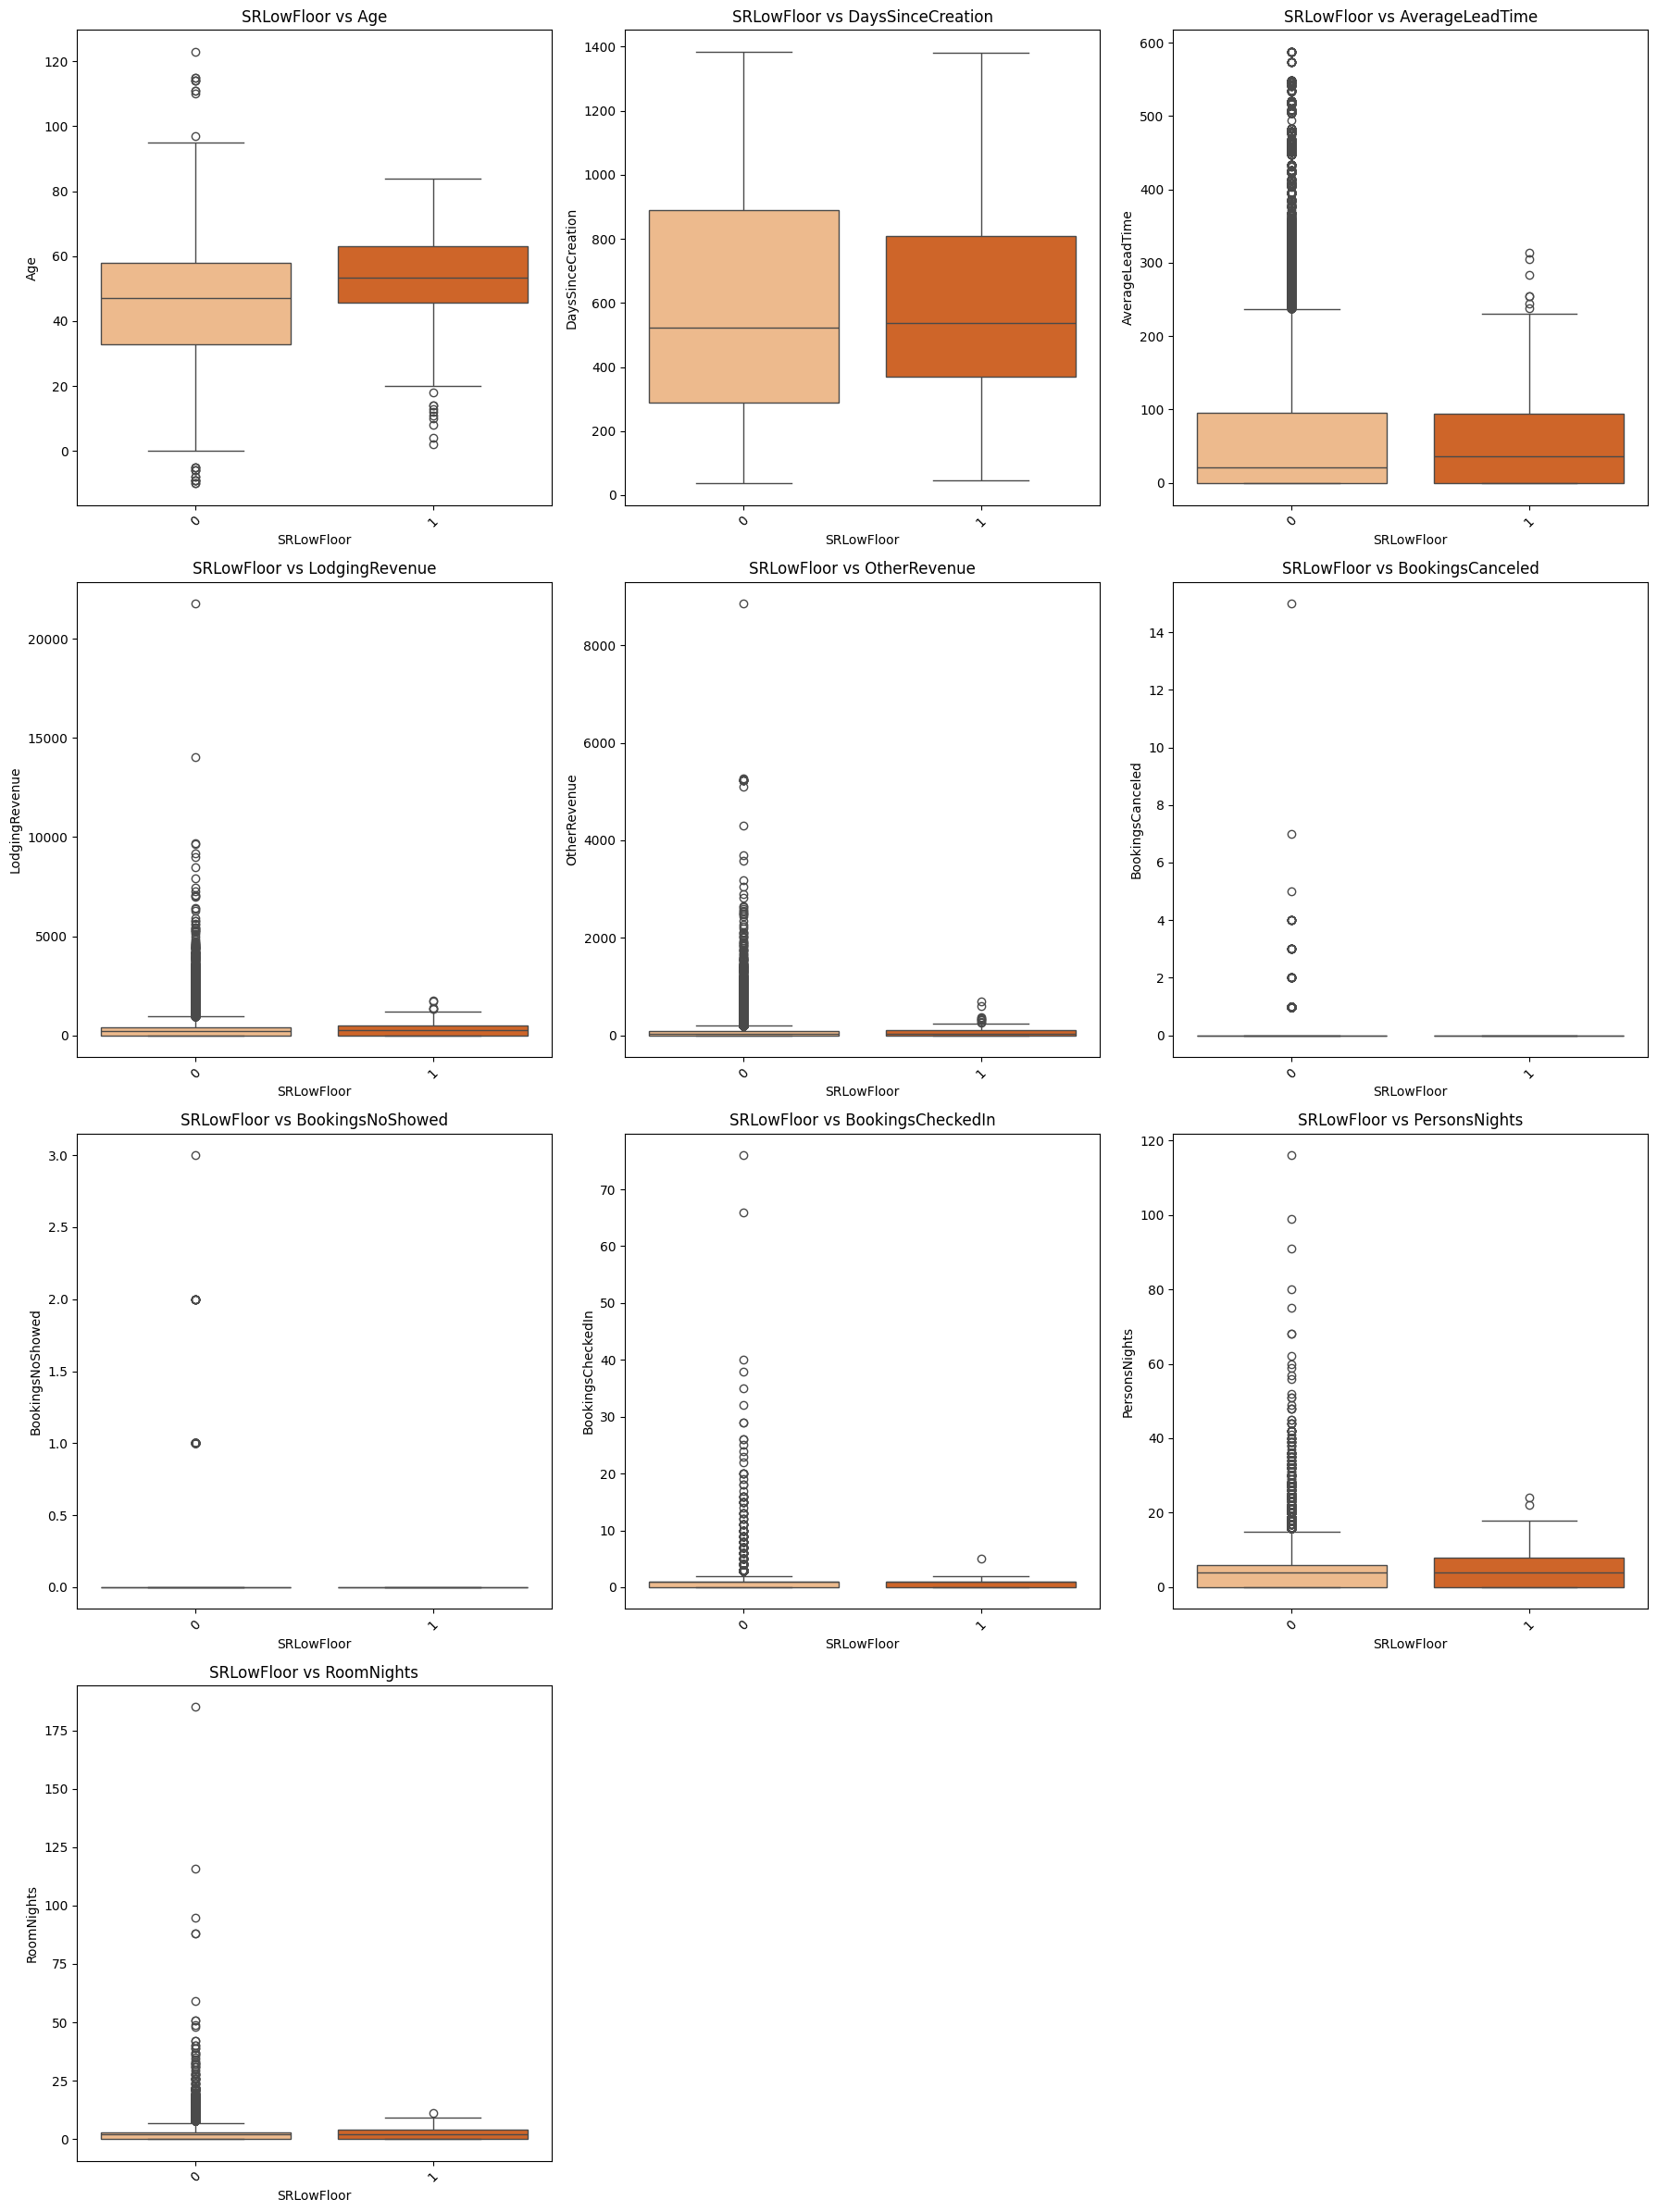

In [70]:
f.boxplots(df, [categ_cols[6]], num_cols)

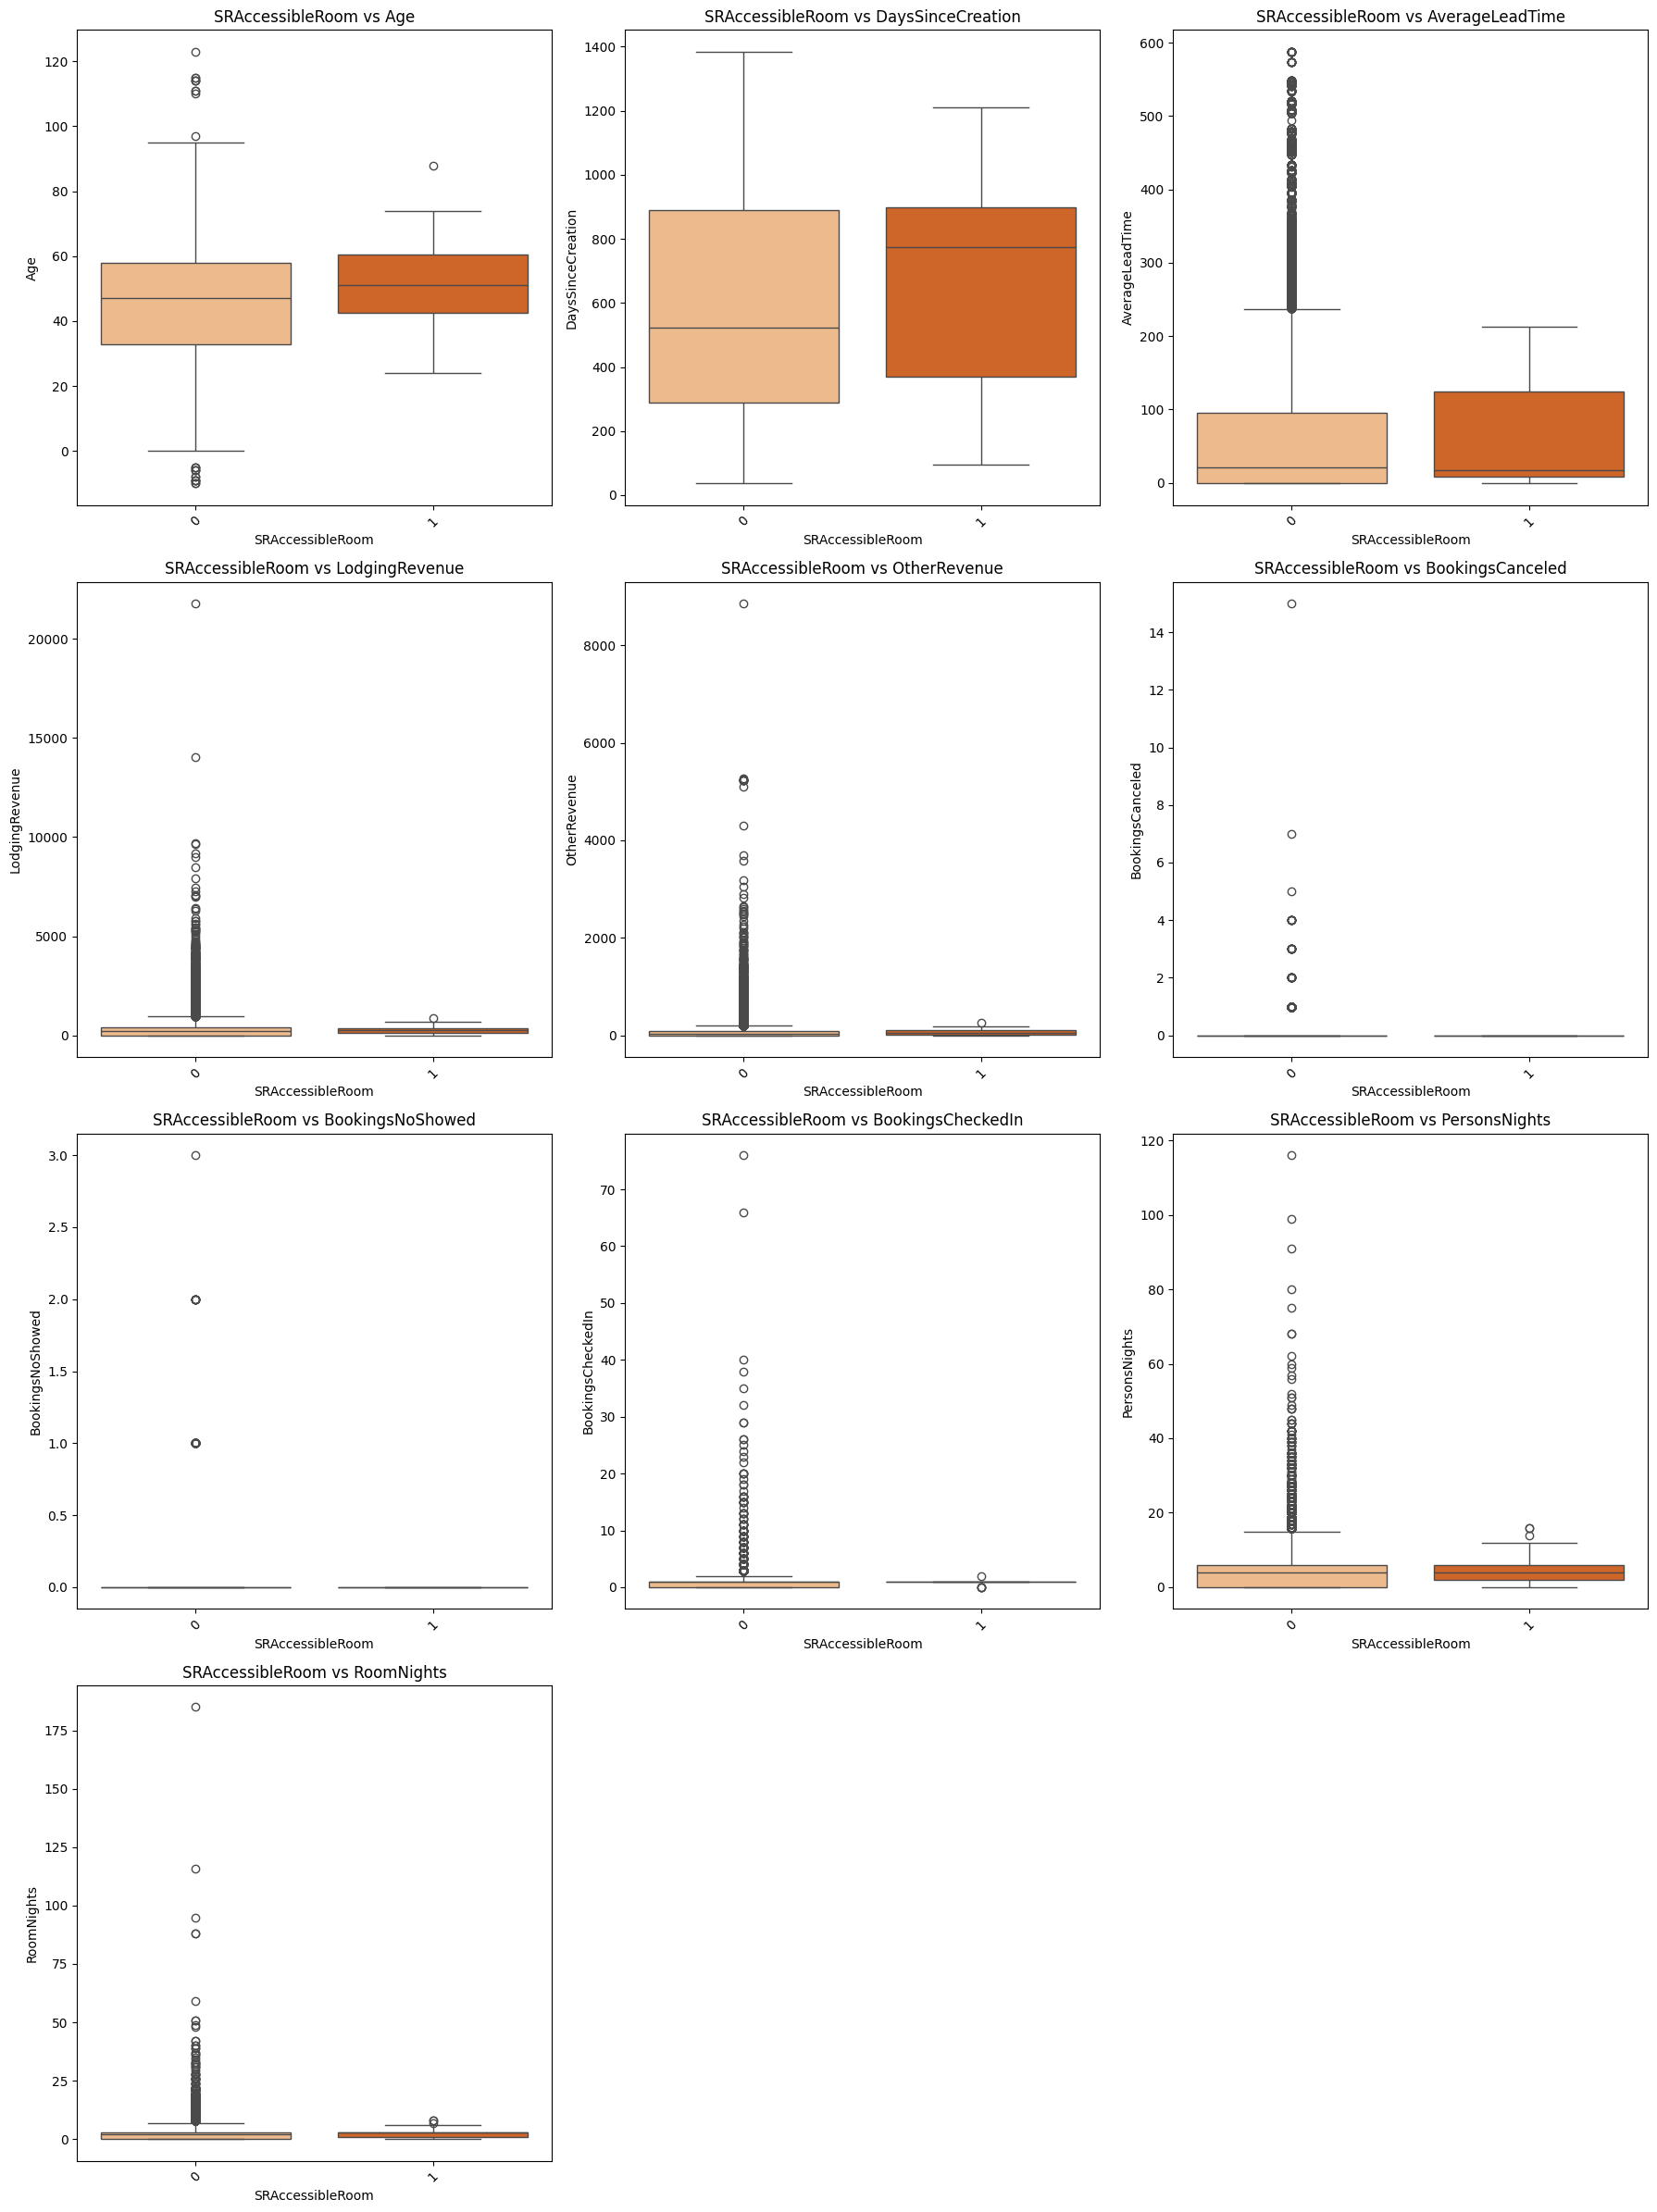

In [71]:
f.boxplots(df, [categ_cols[7]], num_cols)

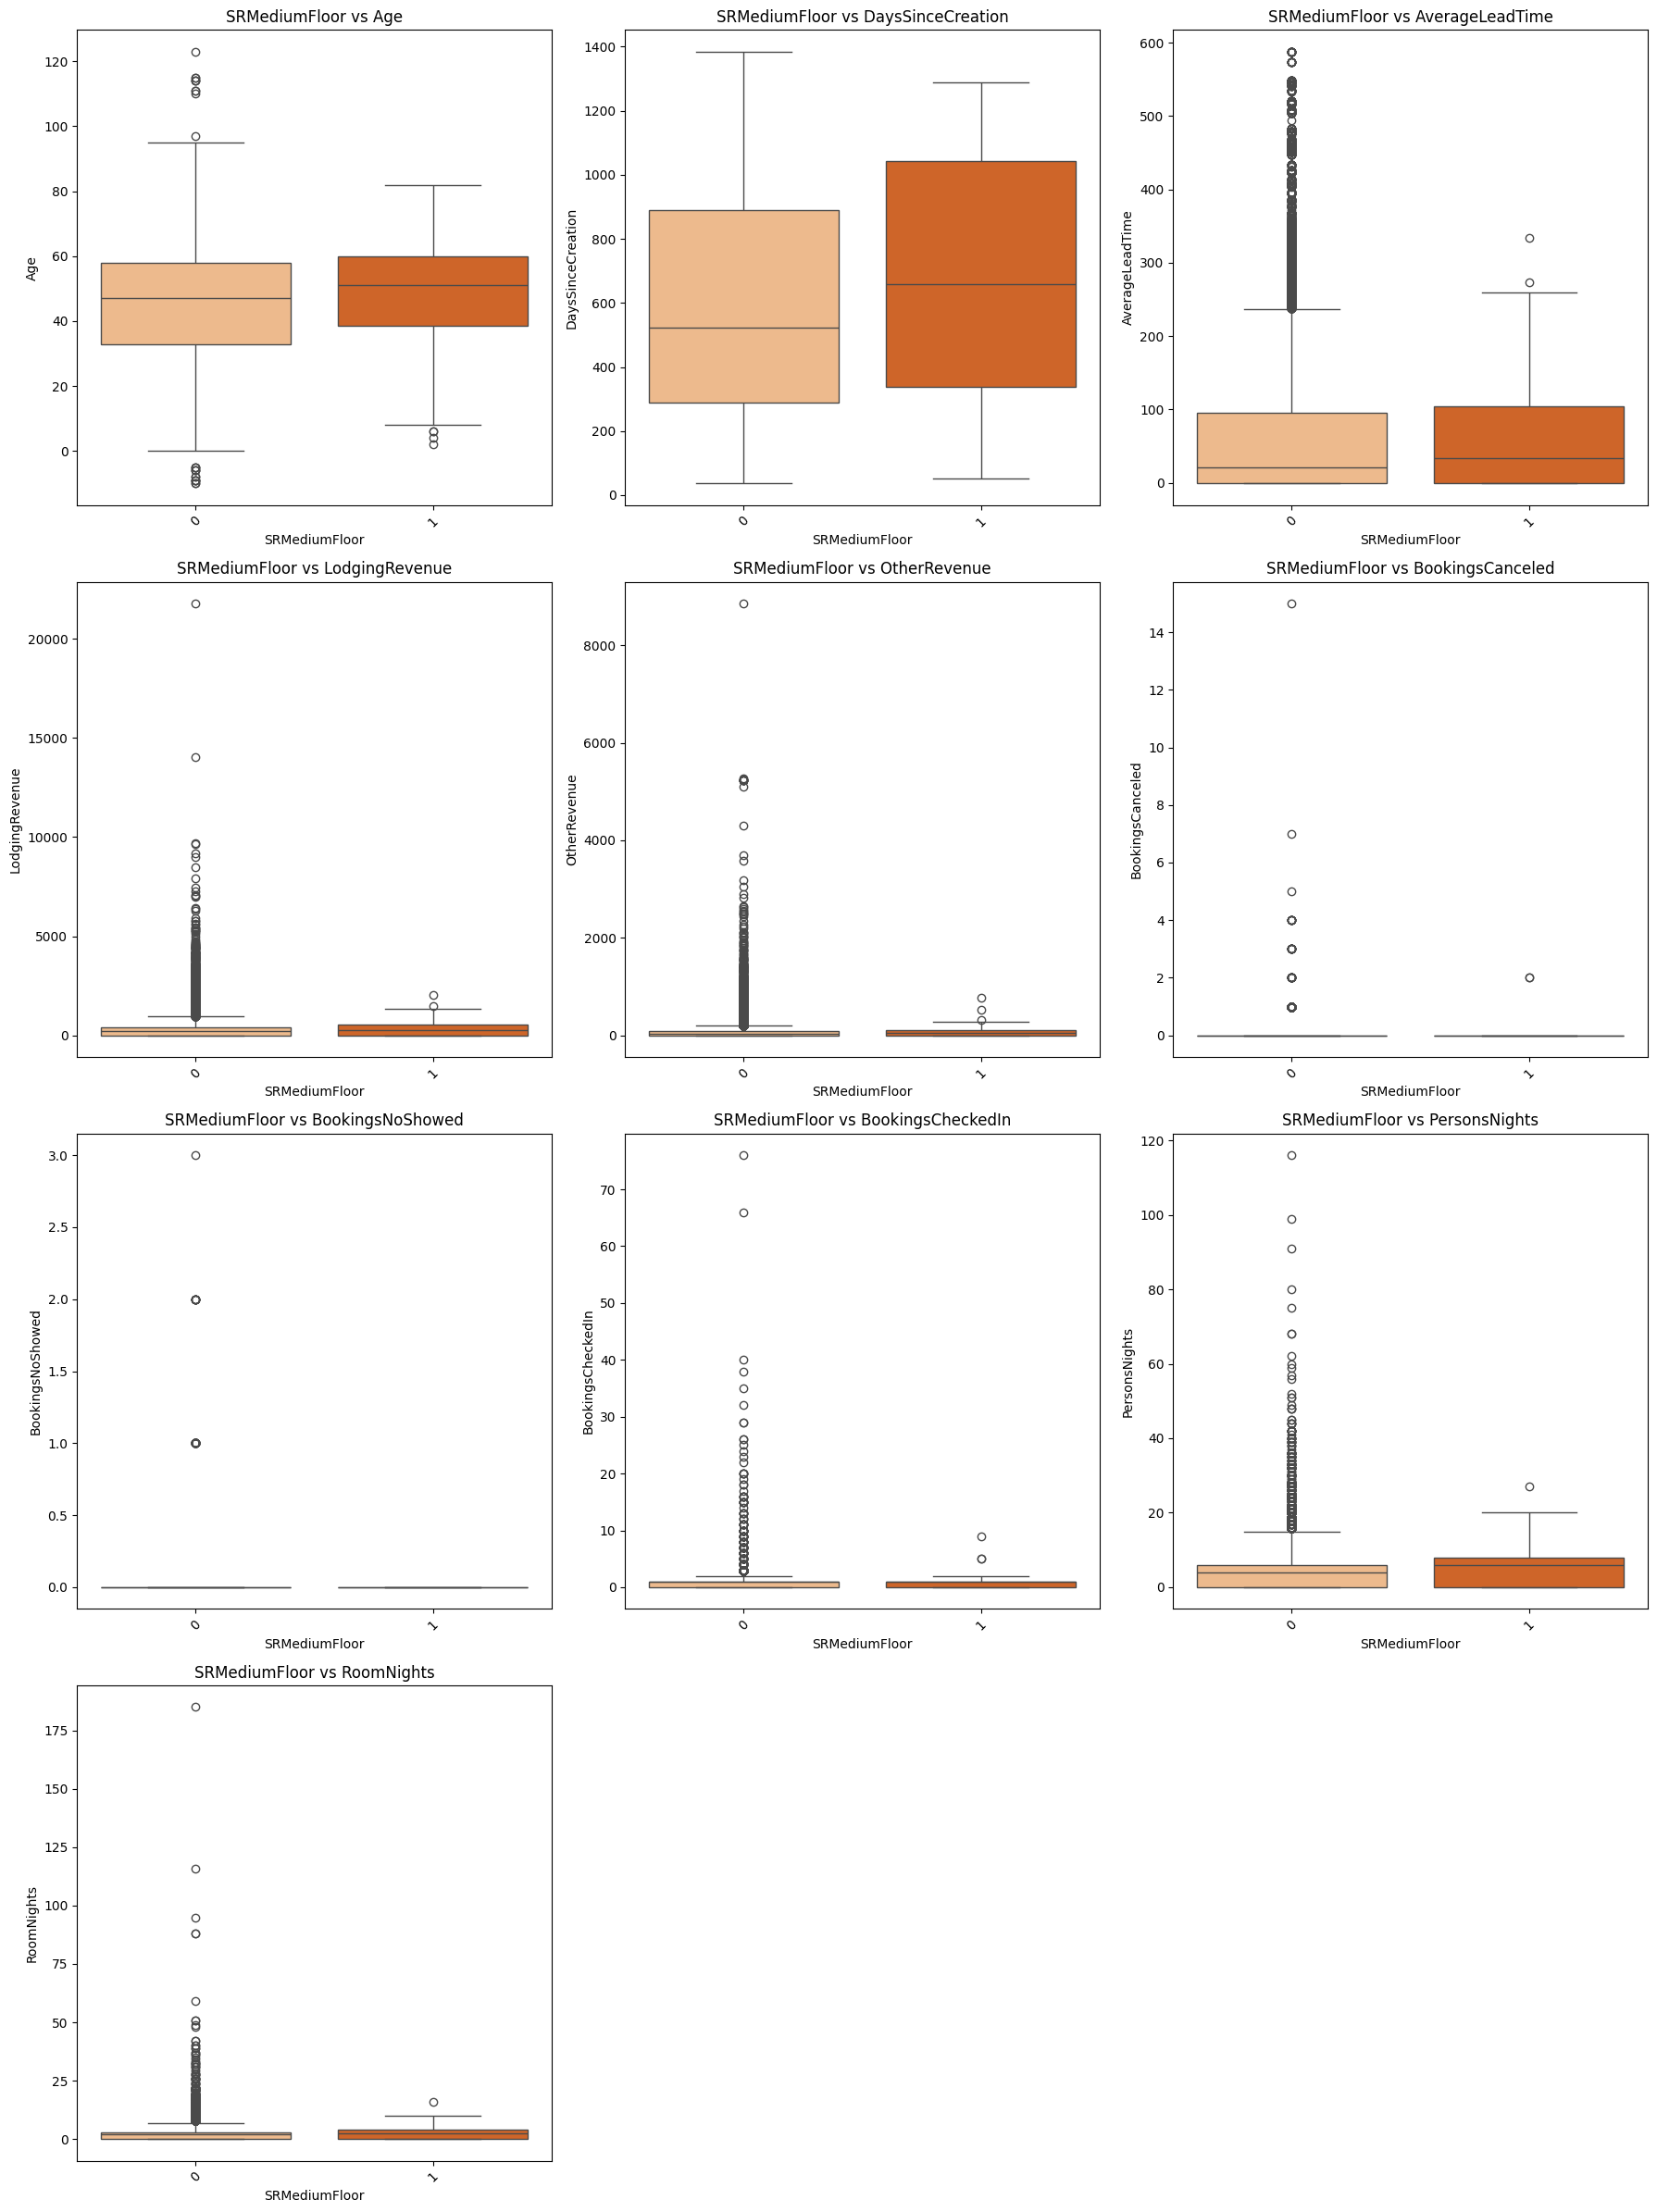

In [72]:
f.boxplots(df, [categ_cols[8]], num_cols)

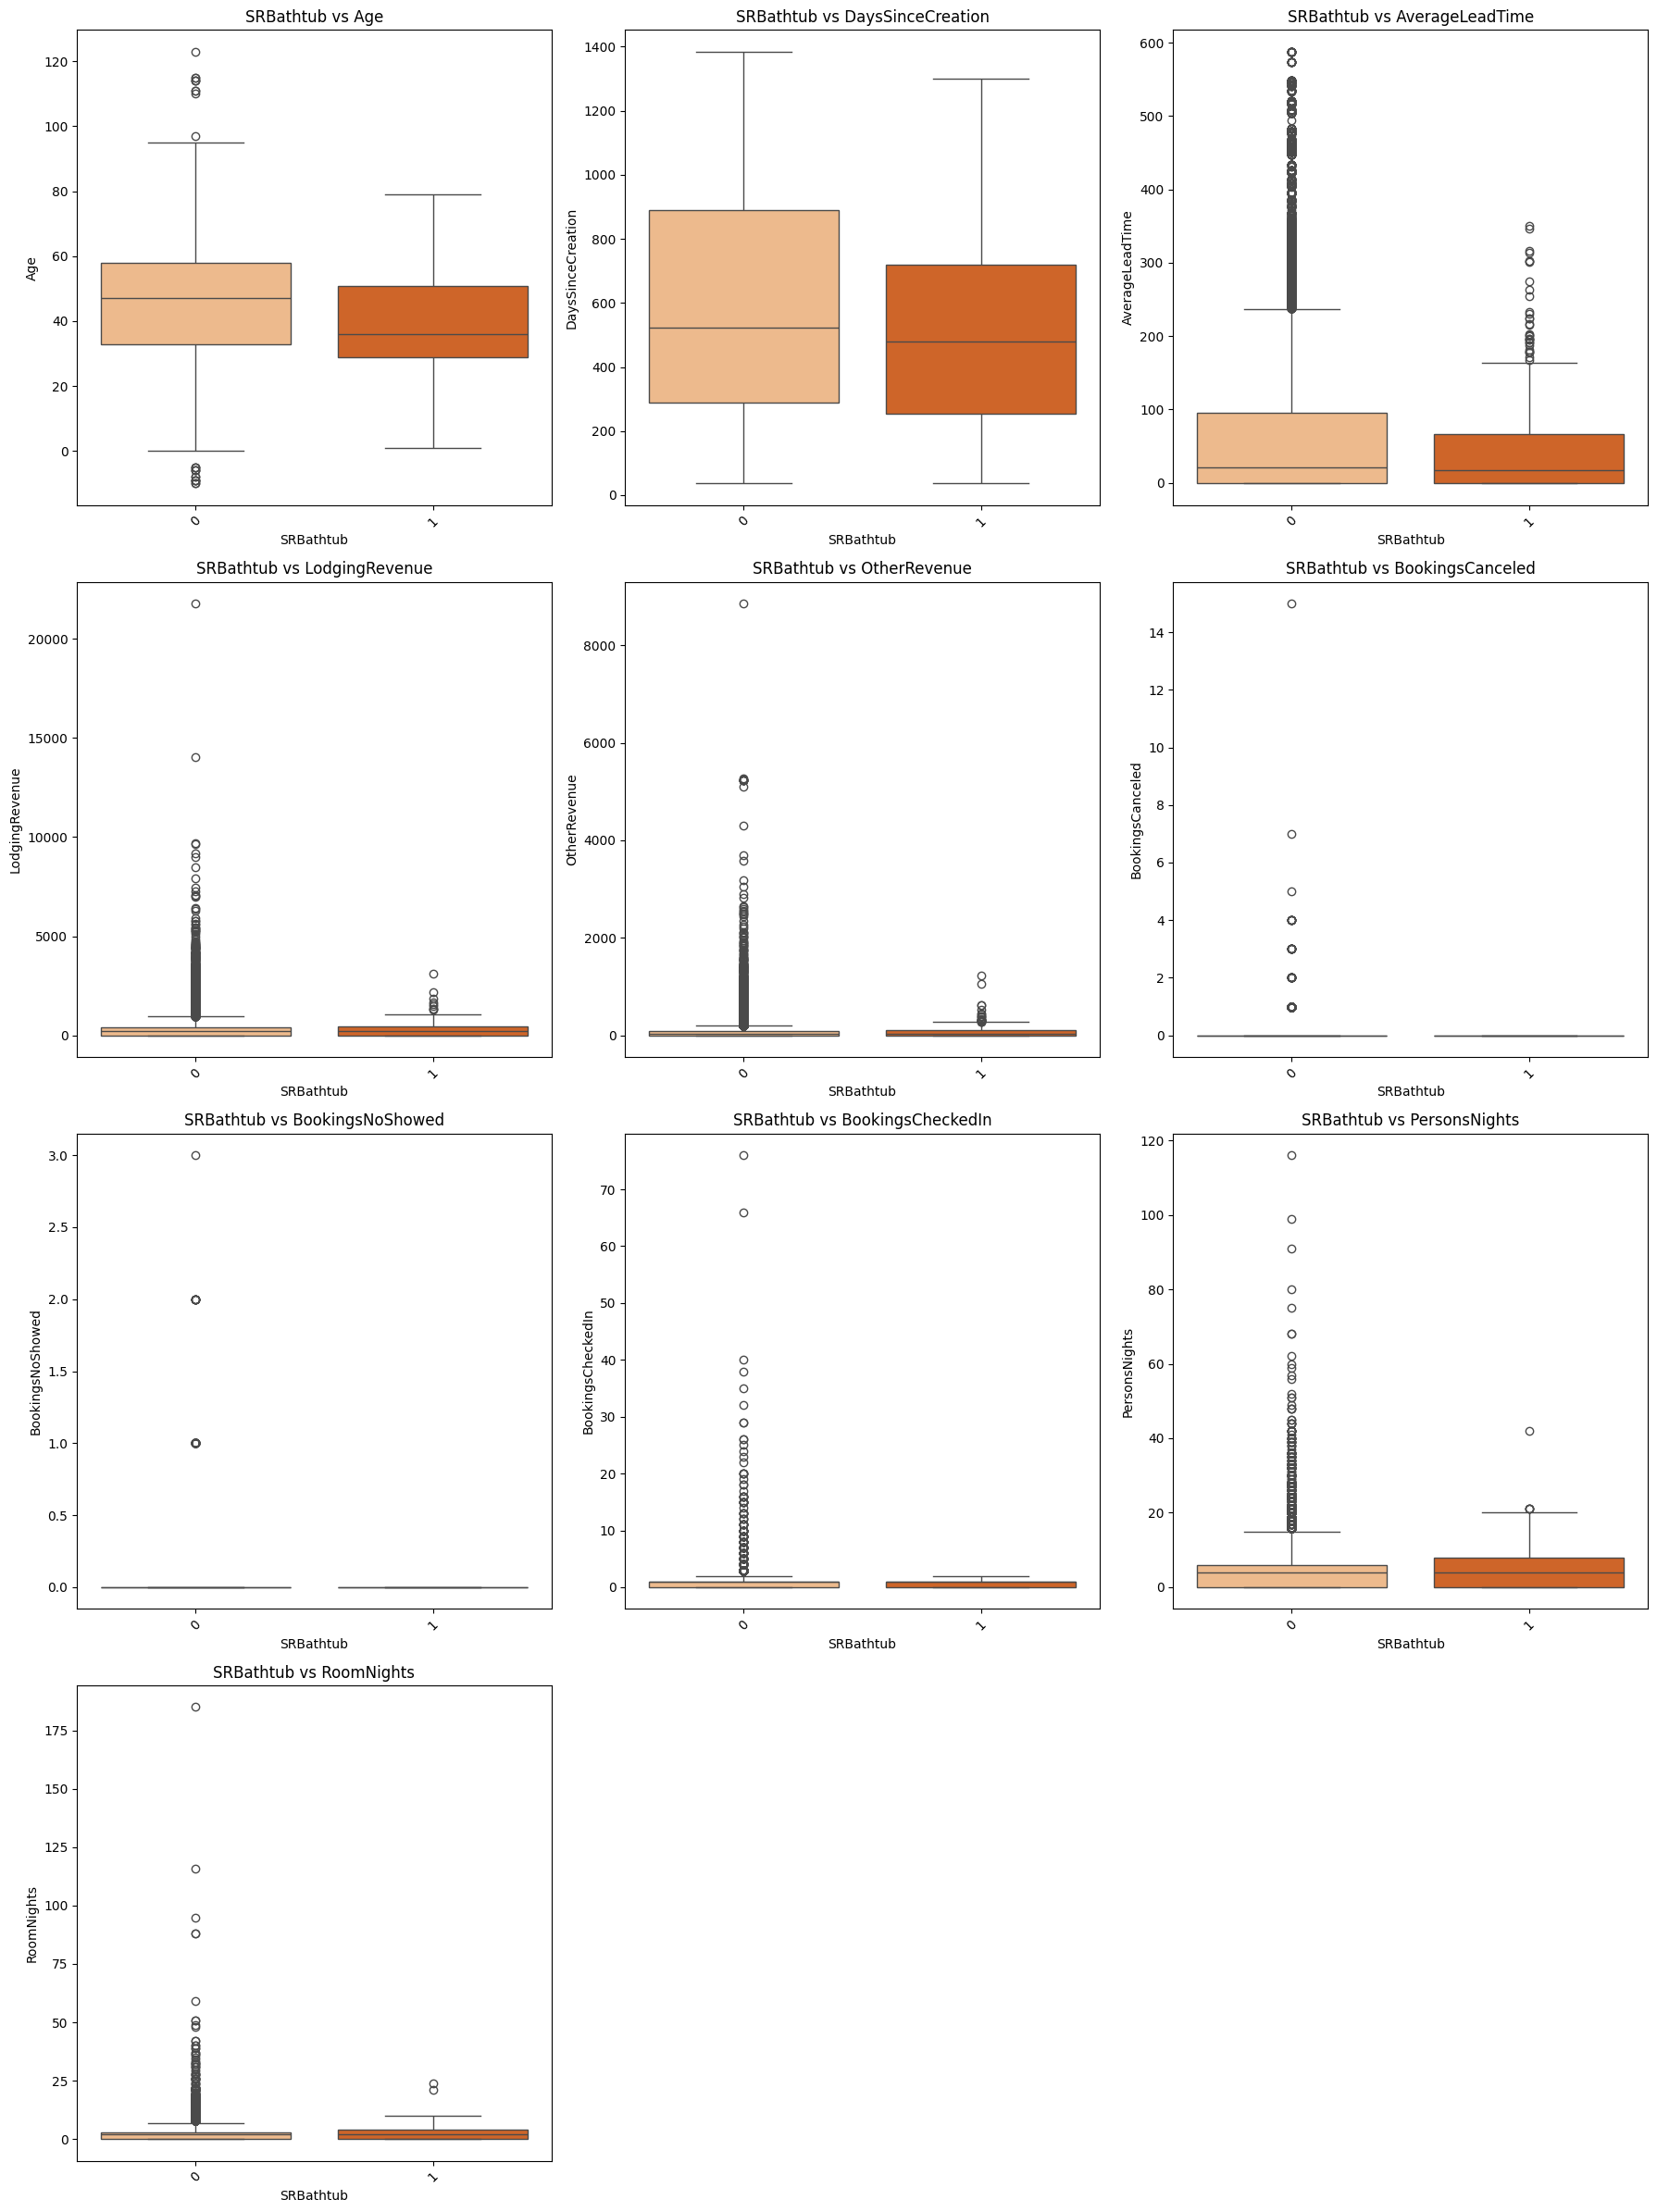

In [73]:
f.boxplots(df, [categ_cols[9]], num_cols)

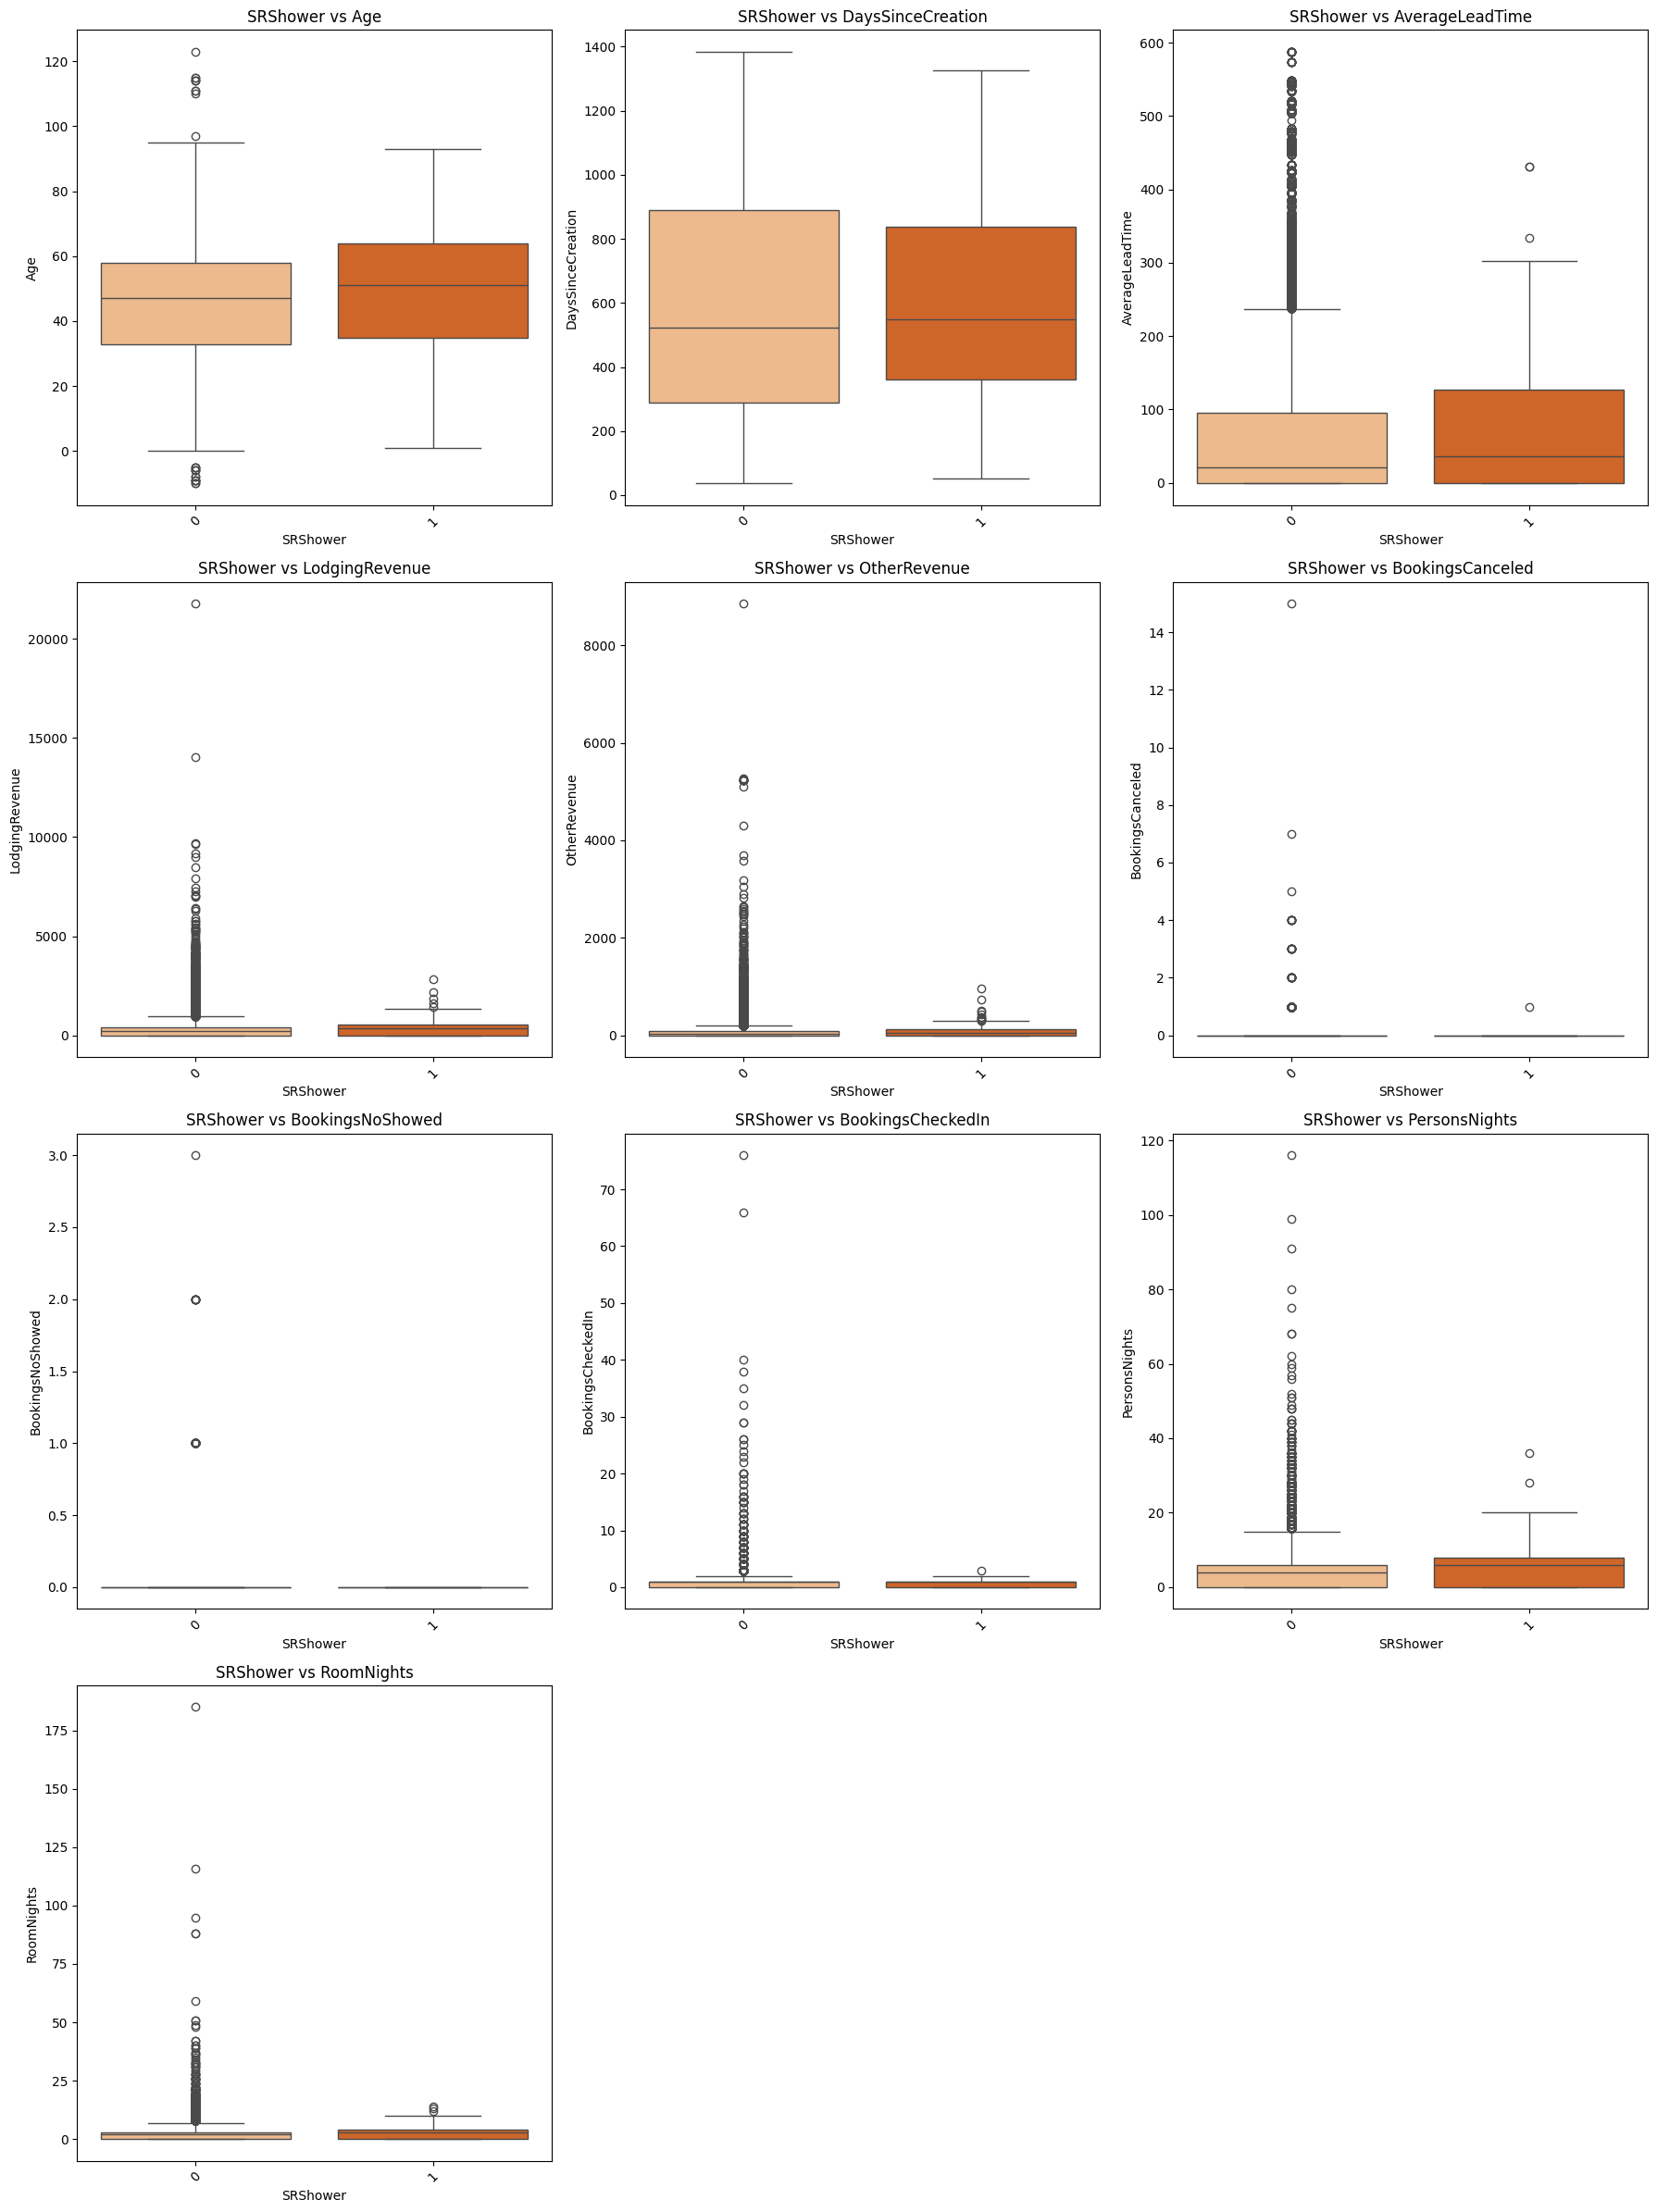

In [74]:
f.boxplots(df, [categ_cols[10]], num_cols)

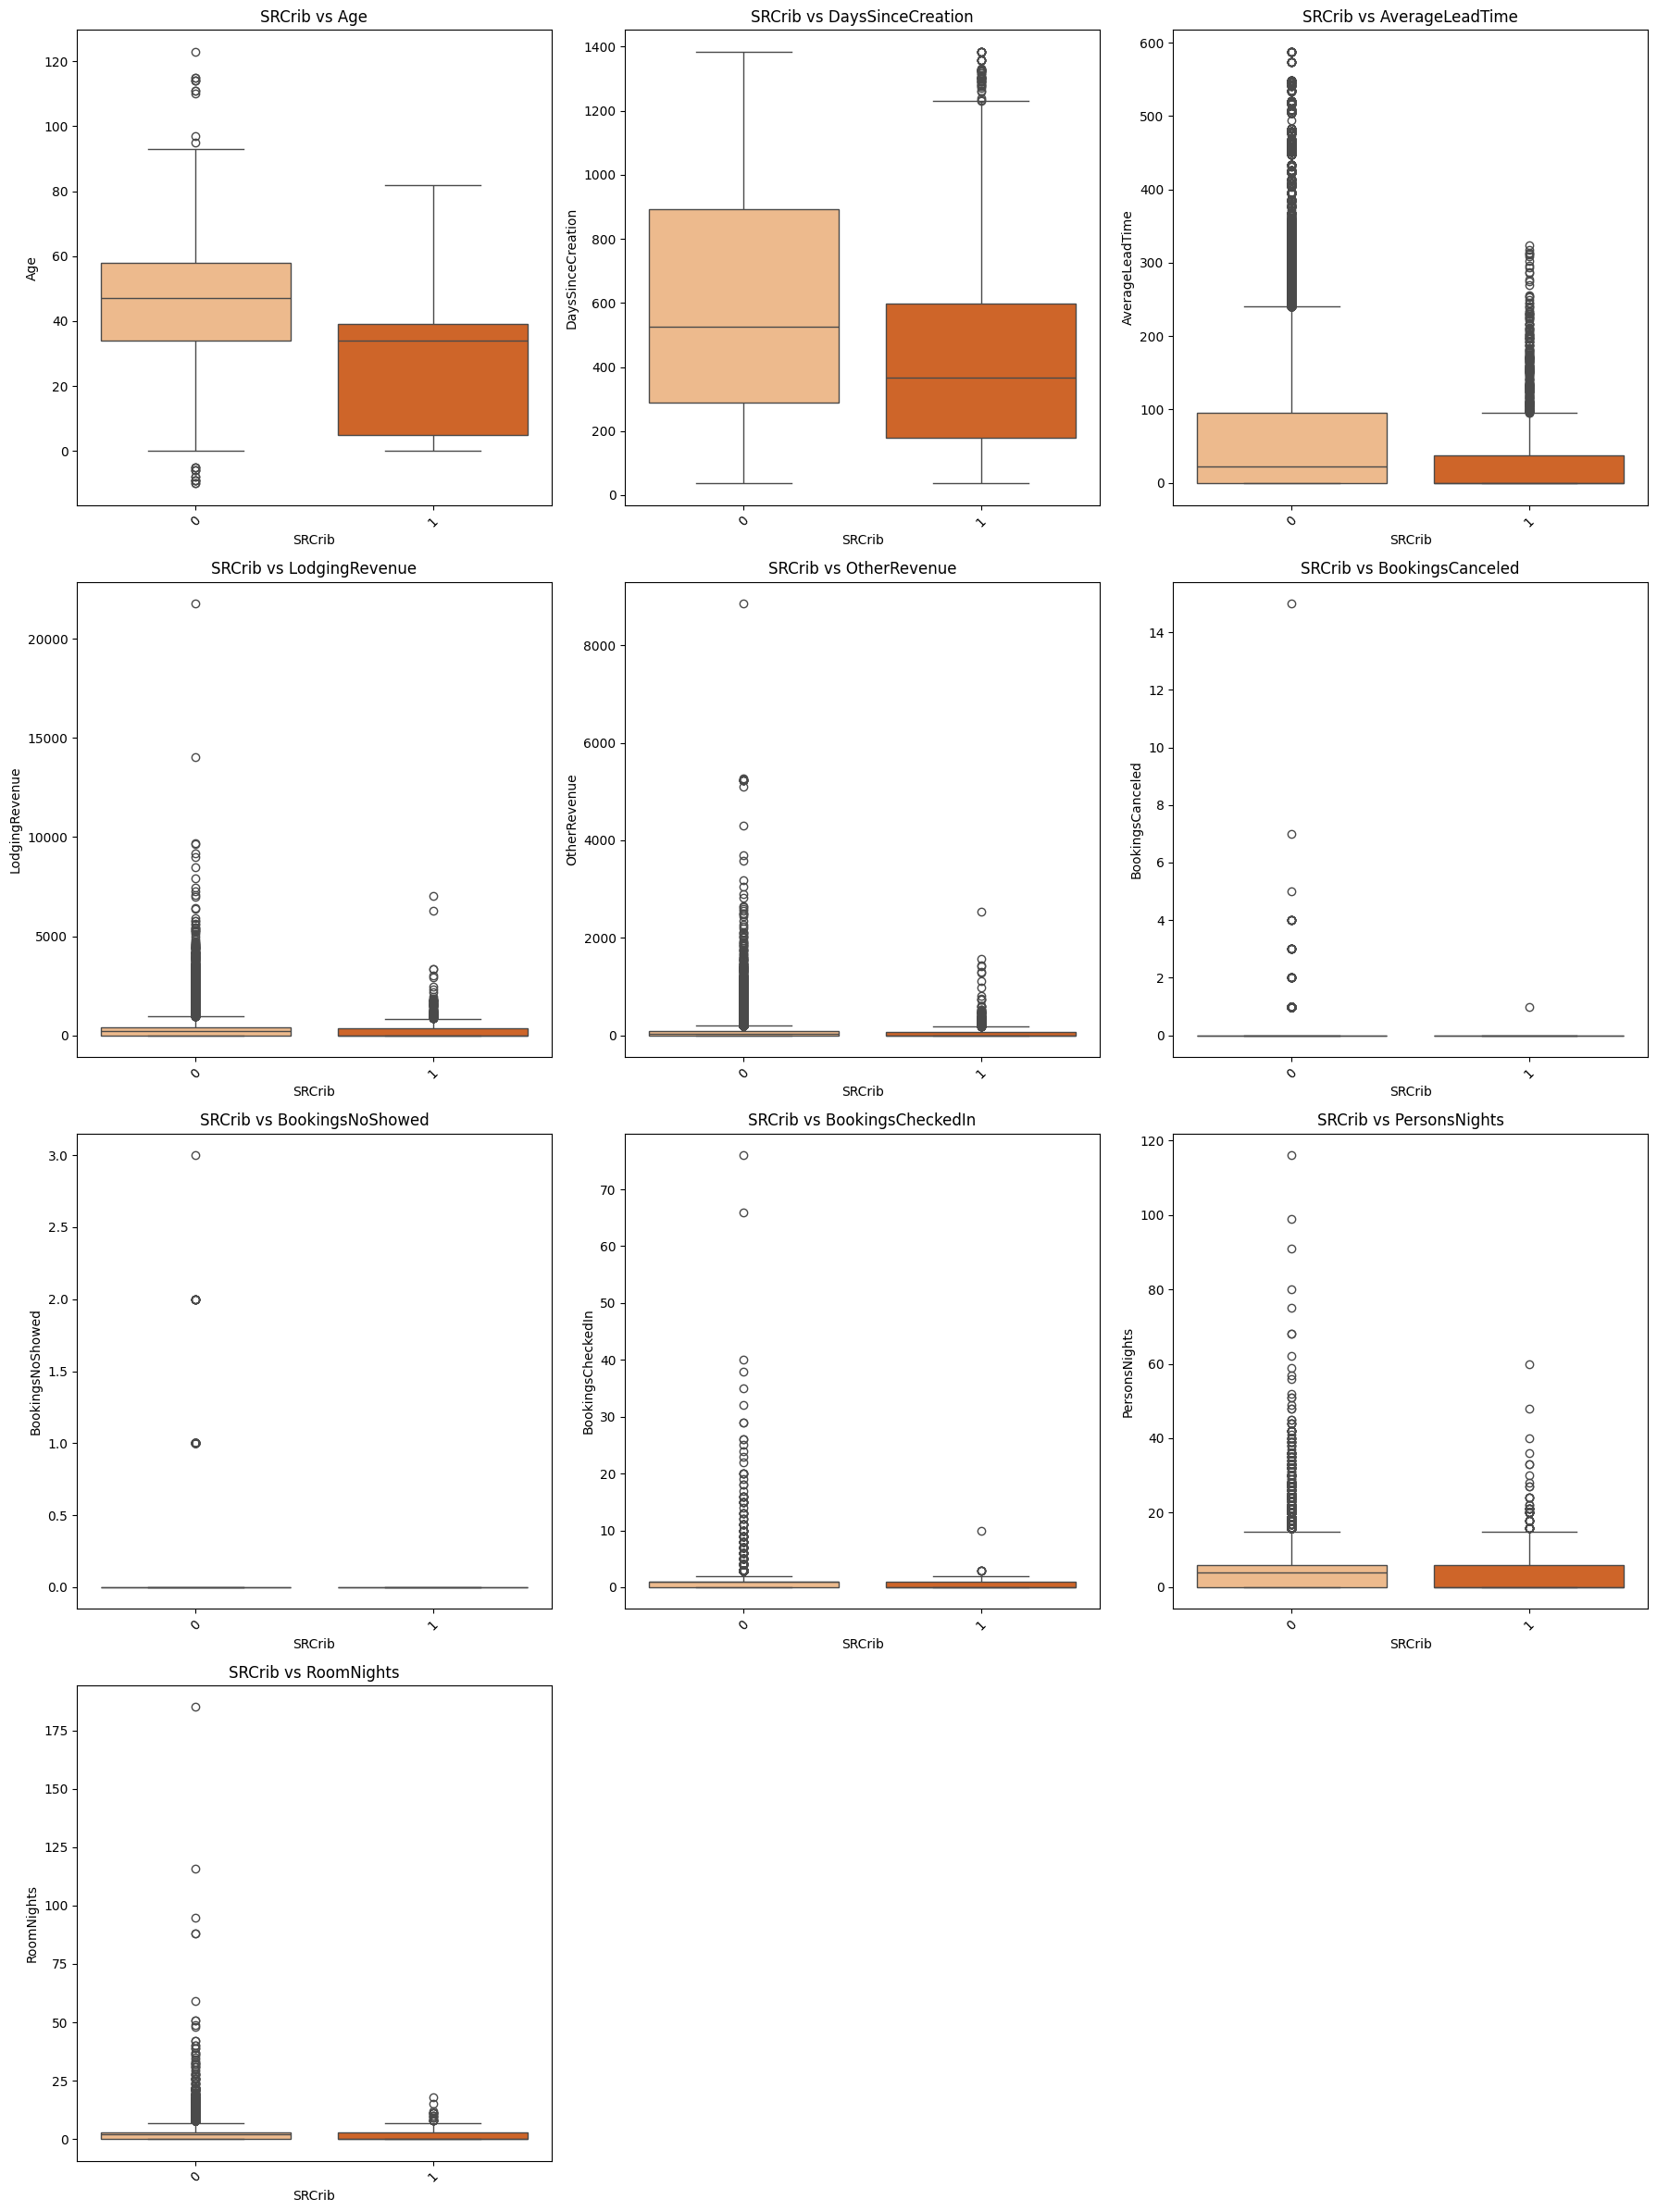

In [75]:
f.boxplots(df, [categ_cols[11]], num_cols)

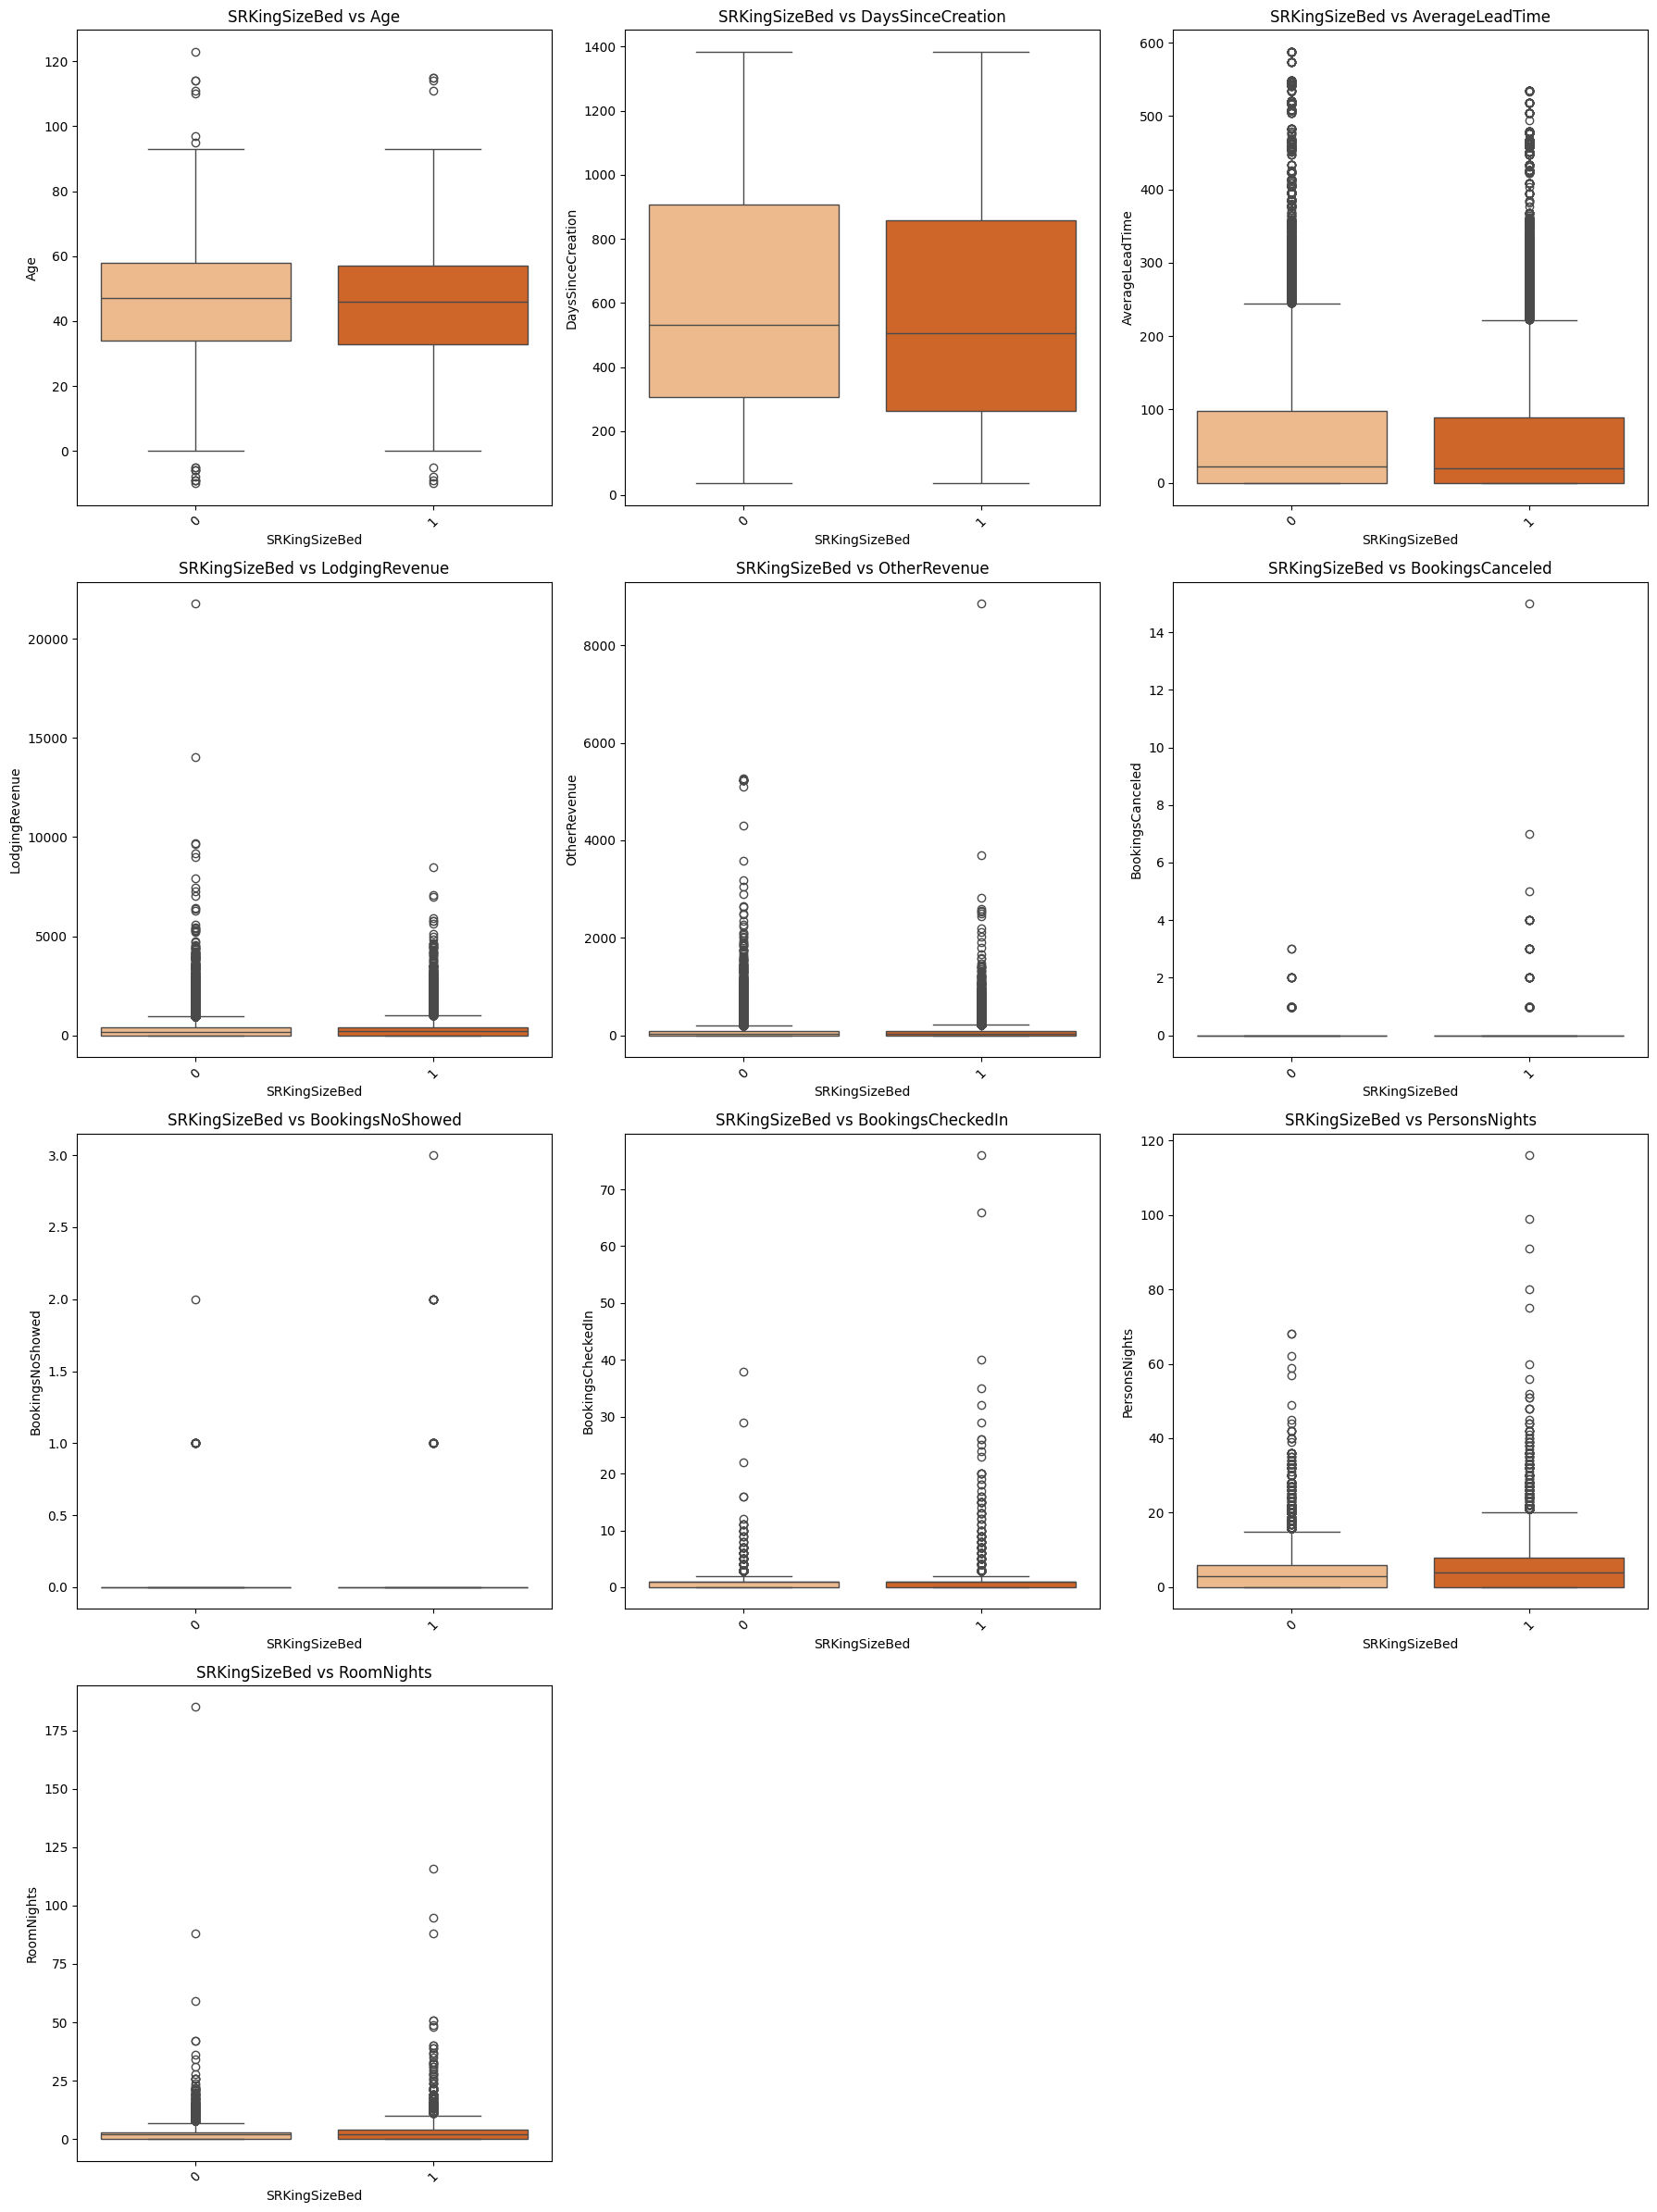

In [76]:
f.boxplots(df, [categ_cols[12]], num_cols)

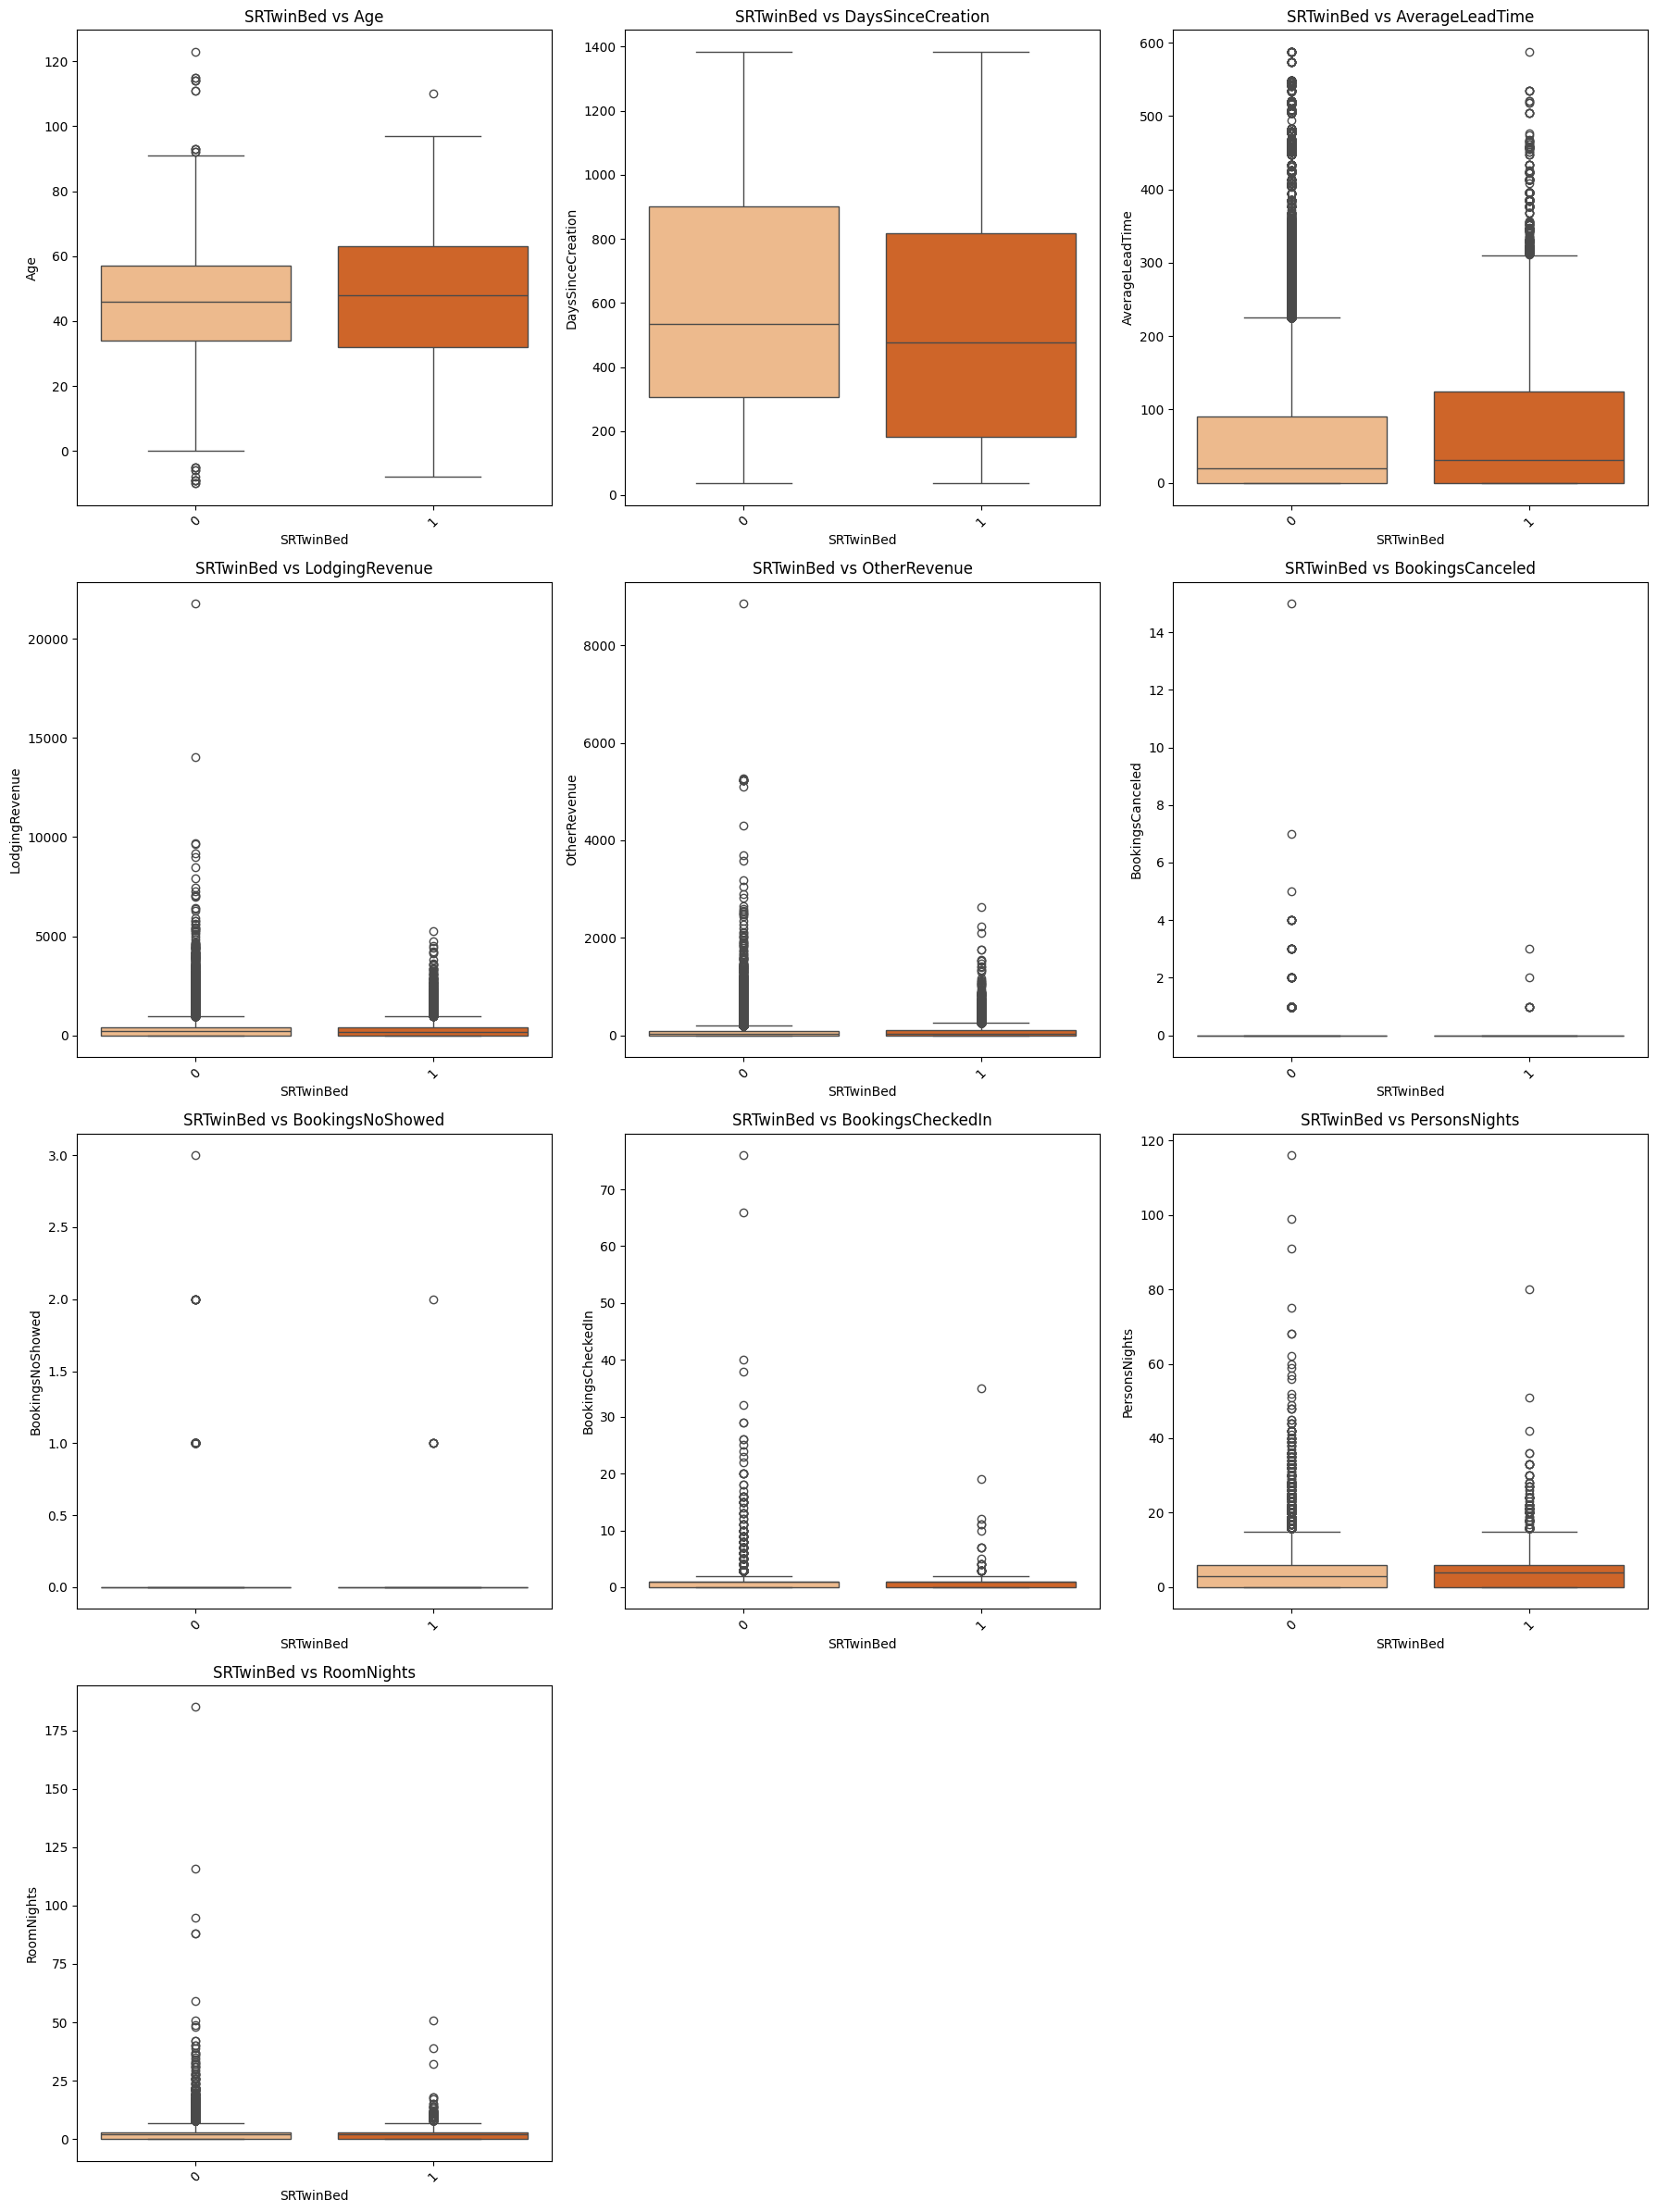

In [77]:
f.boxplots(df, [categ_cols[13]], num_cols)

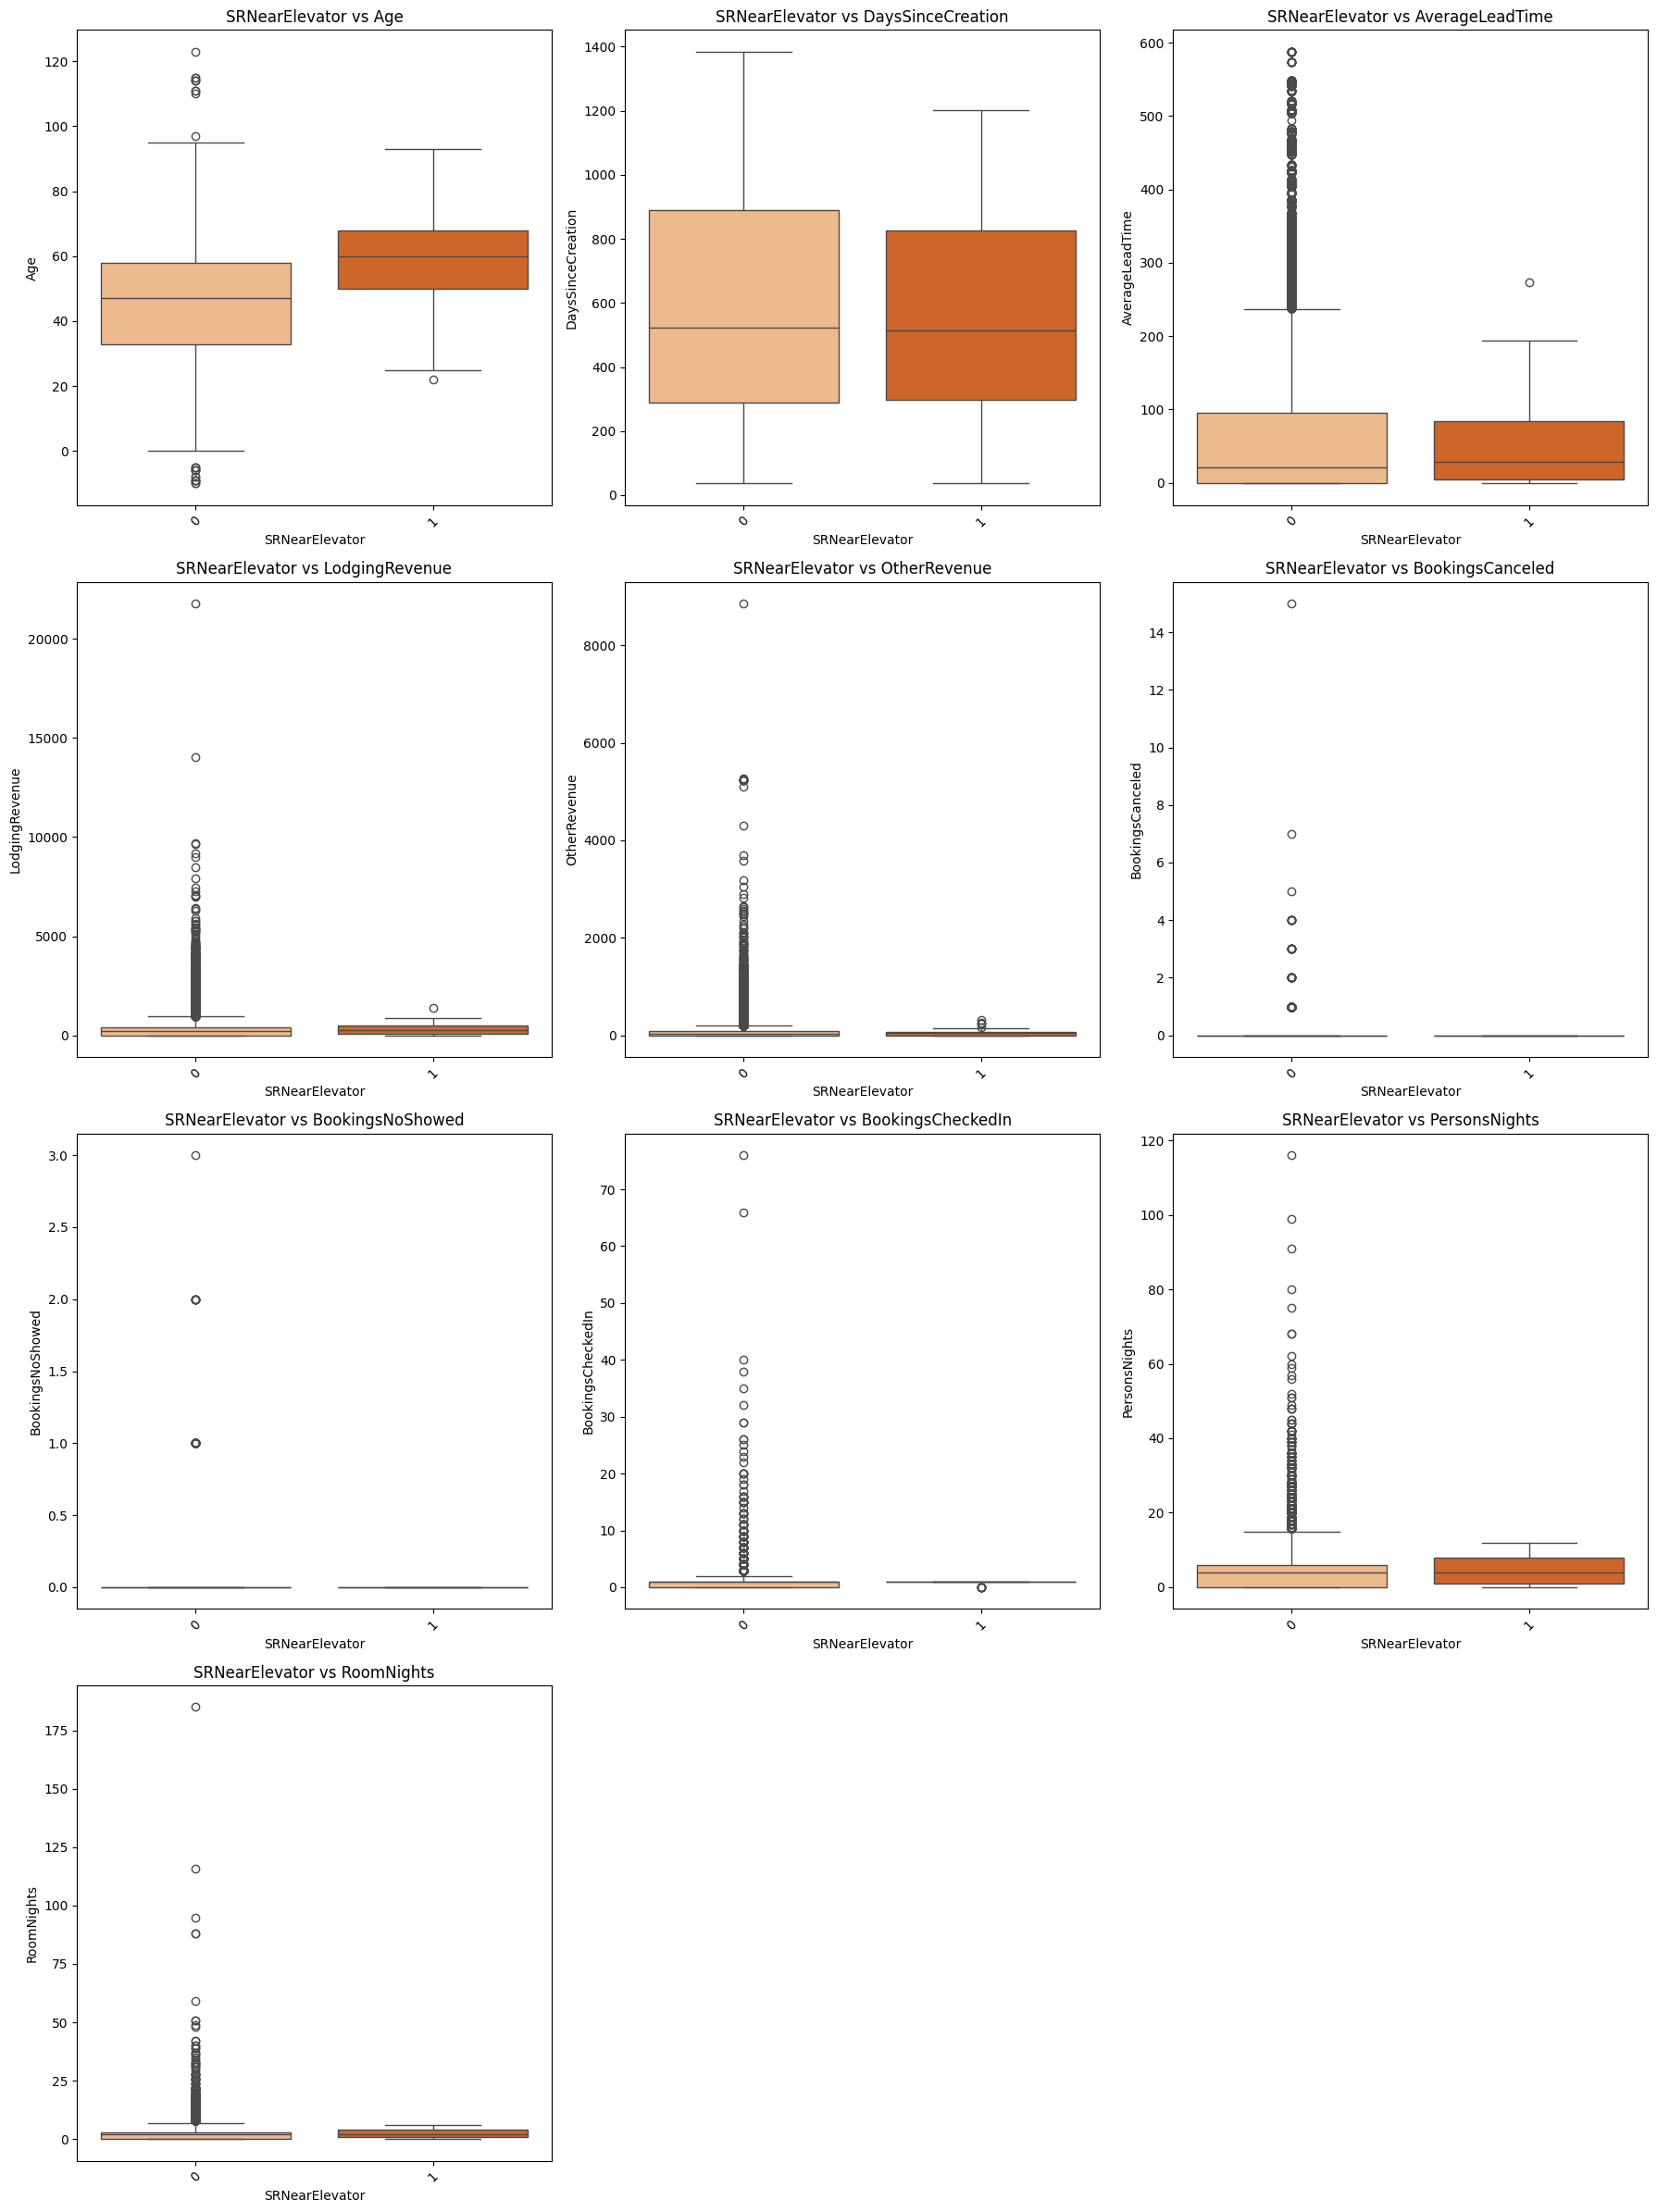

In [78]:
f.boxplots(df, [categ_cols[14]], num_cols)

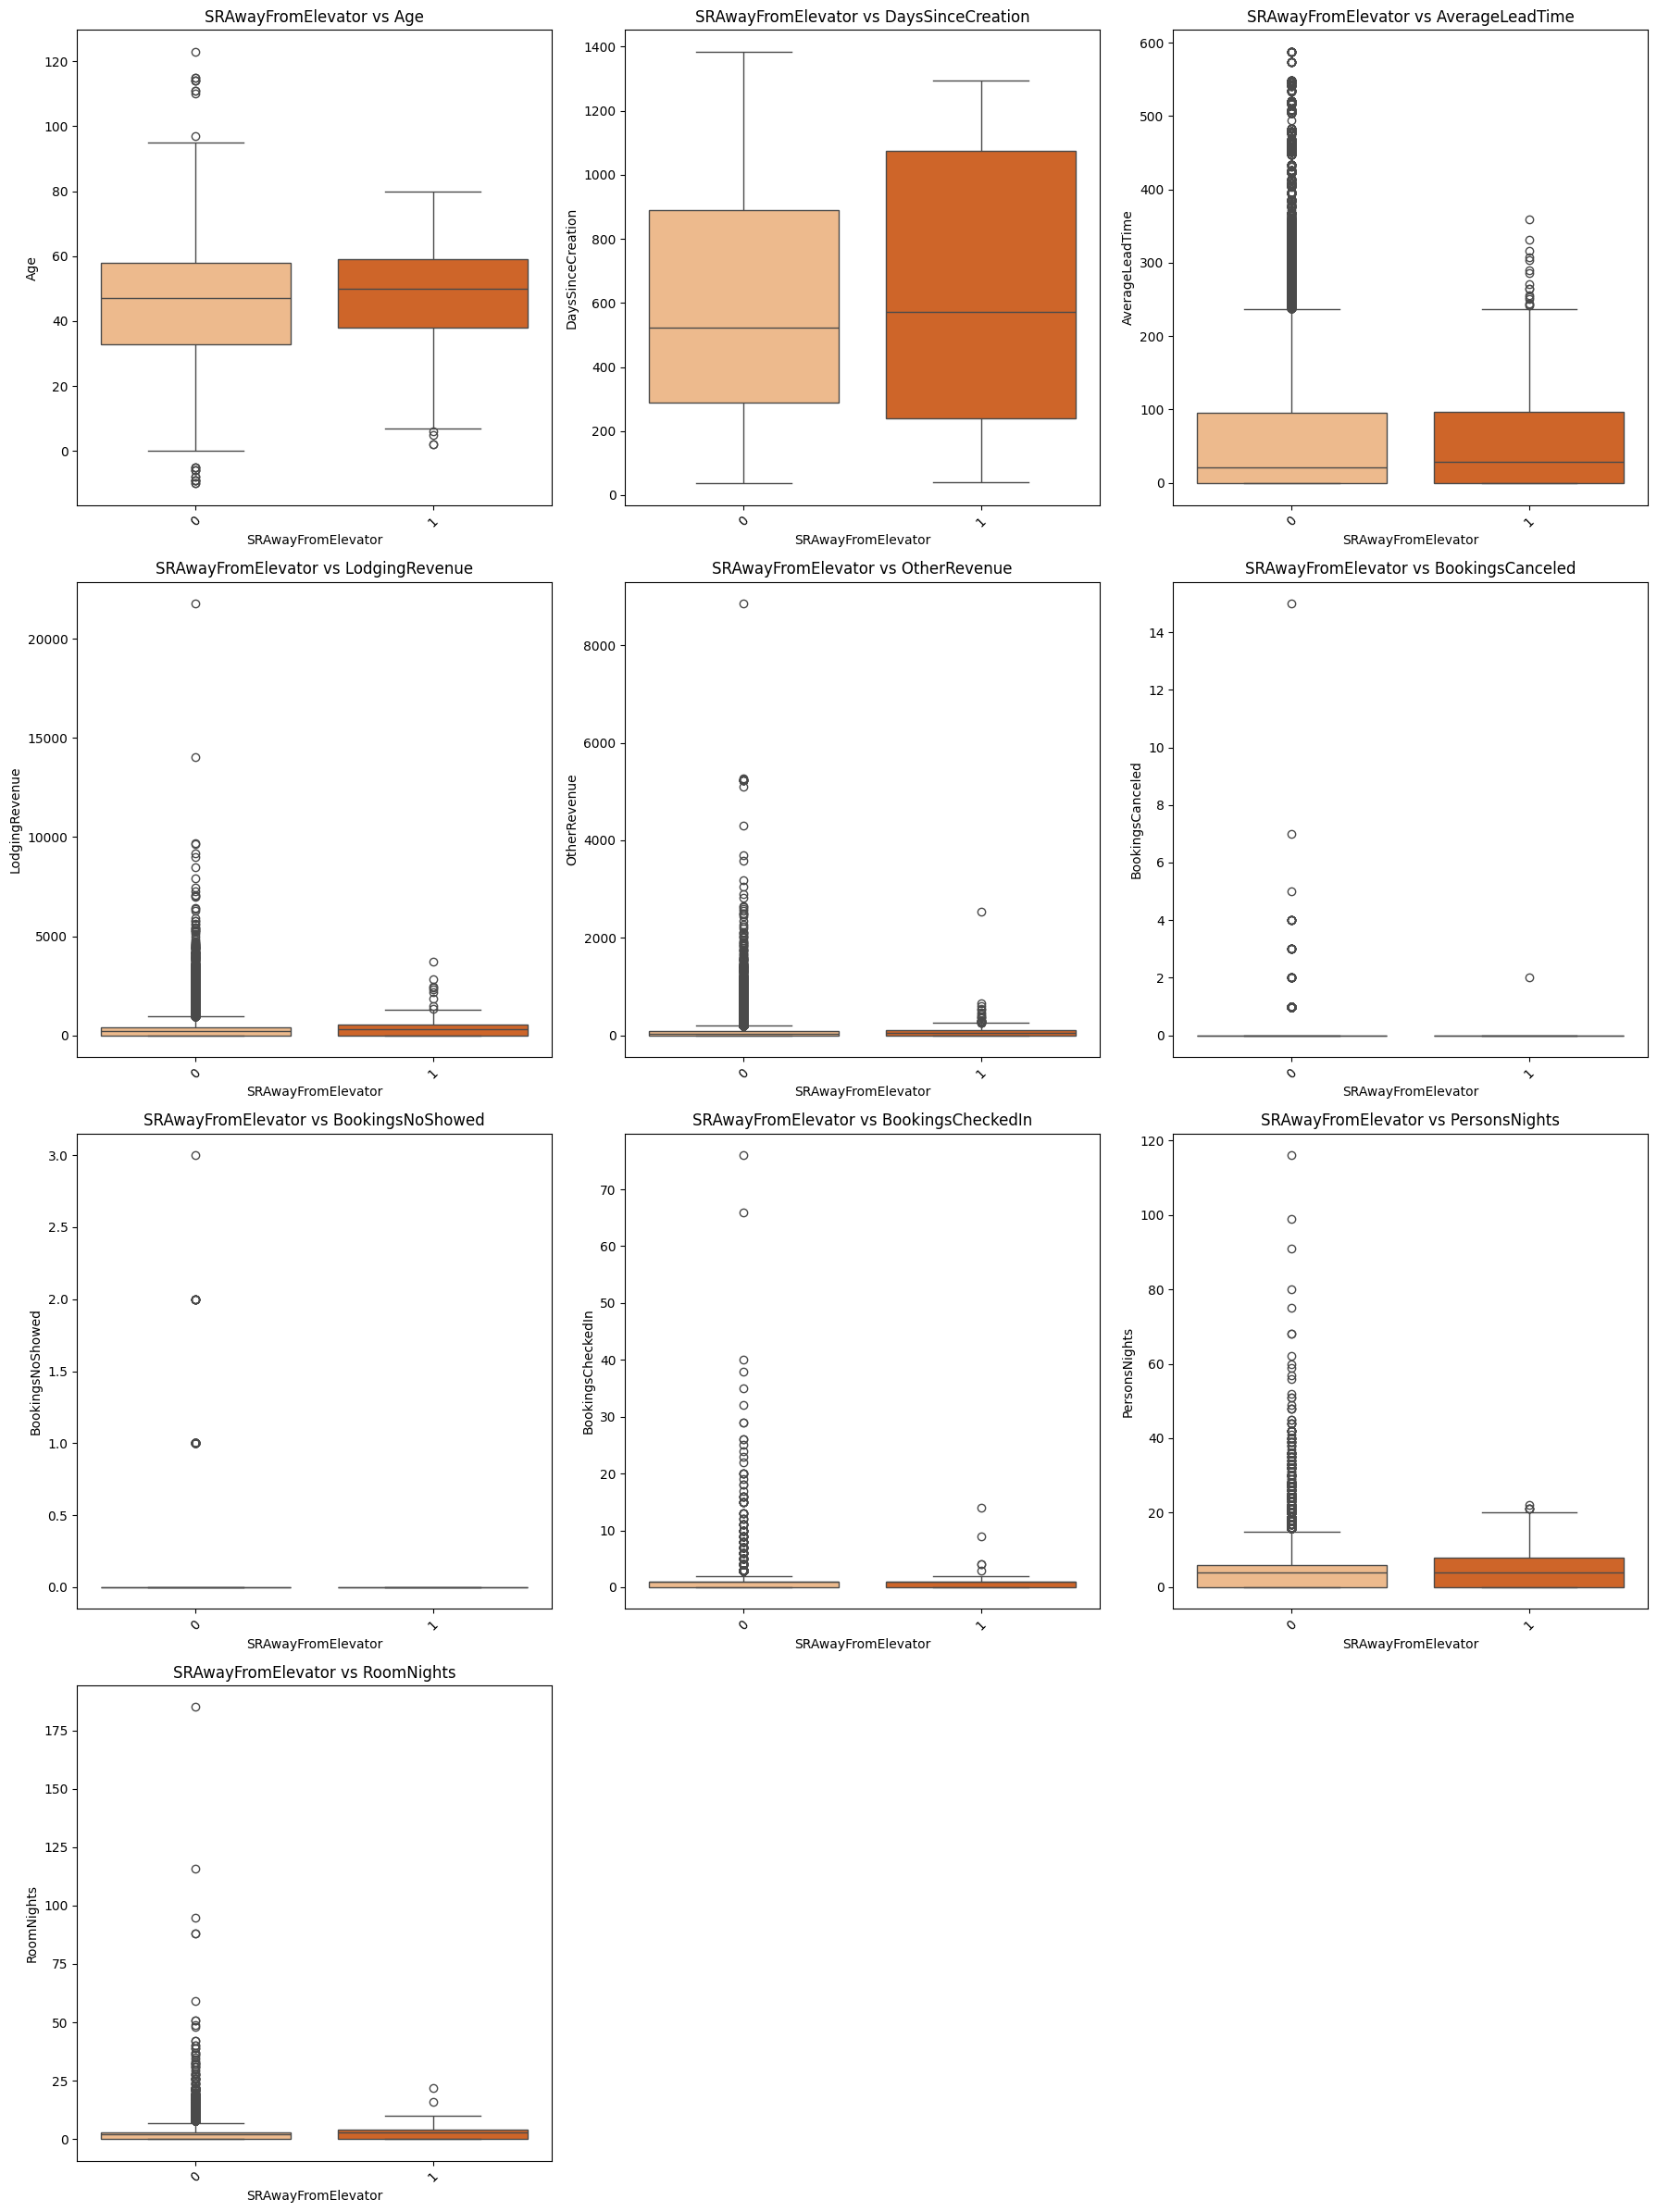

In [79]:
f.boxplots(df, [categ_cols[15]], num_cols)

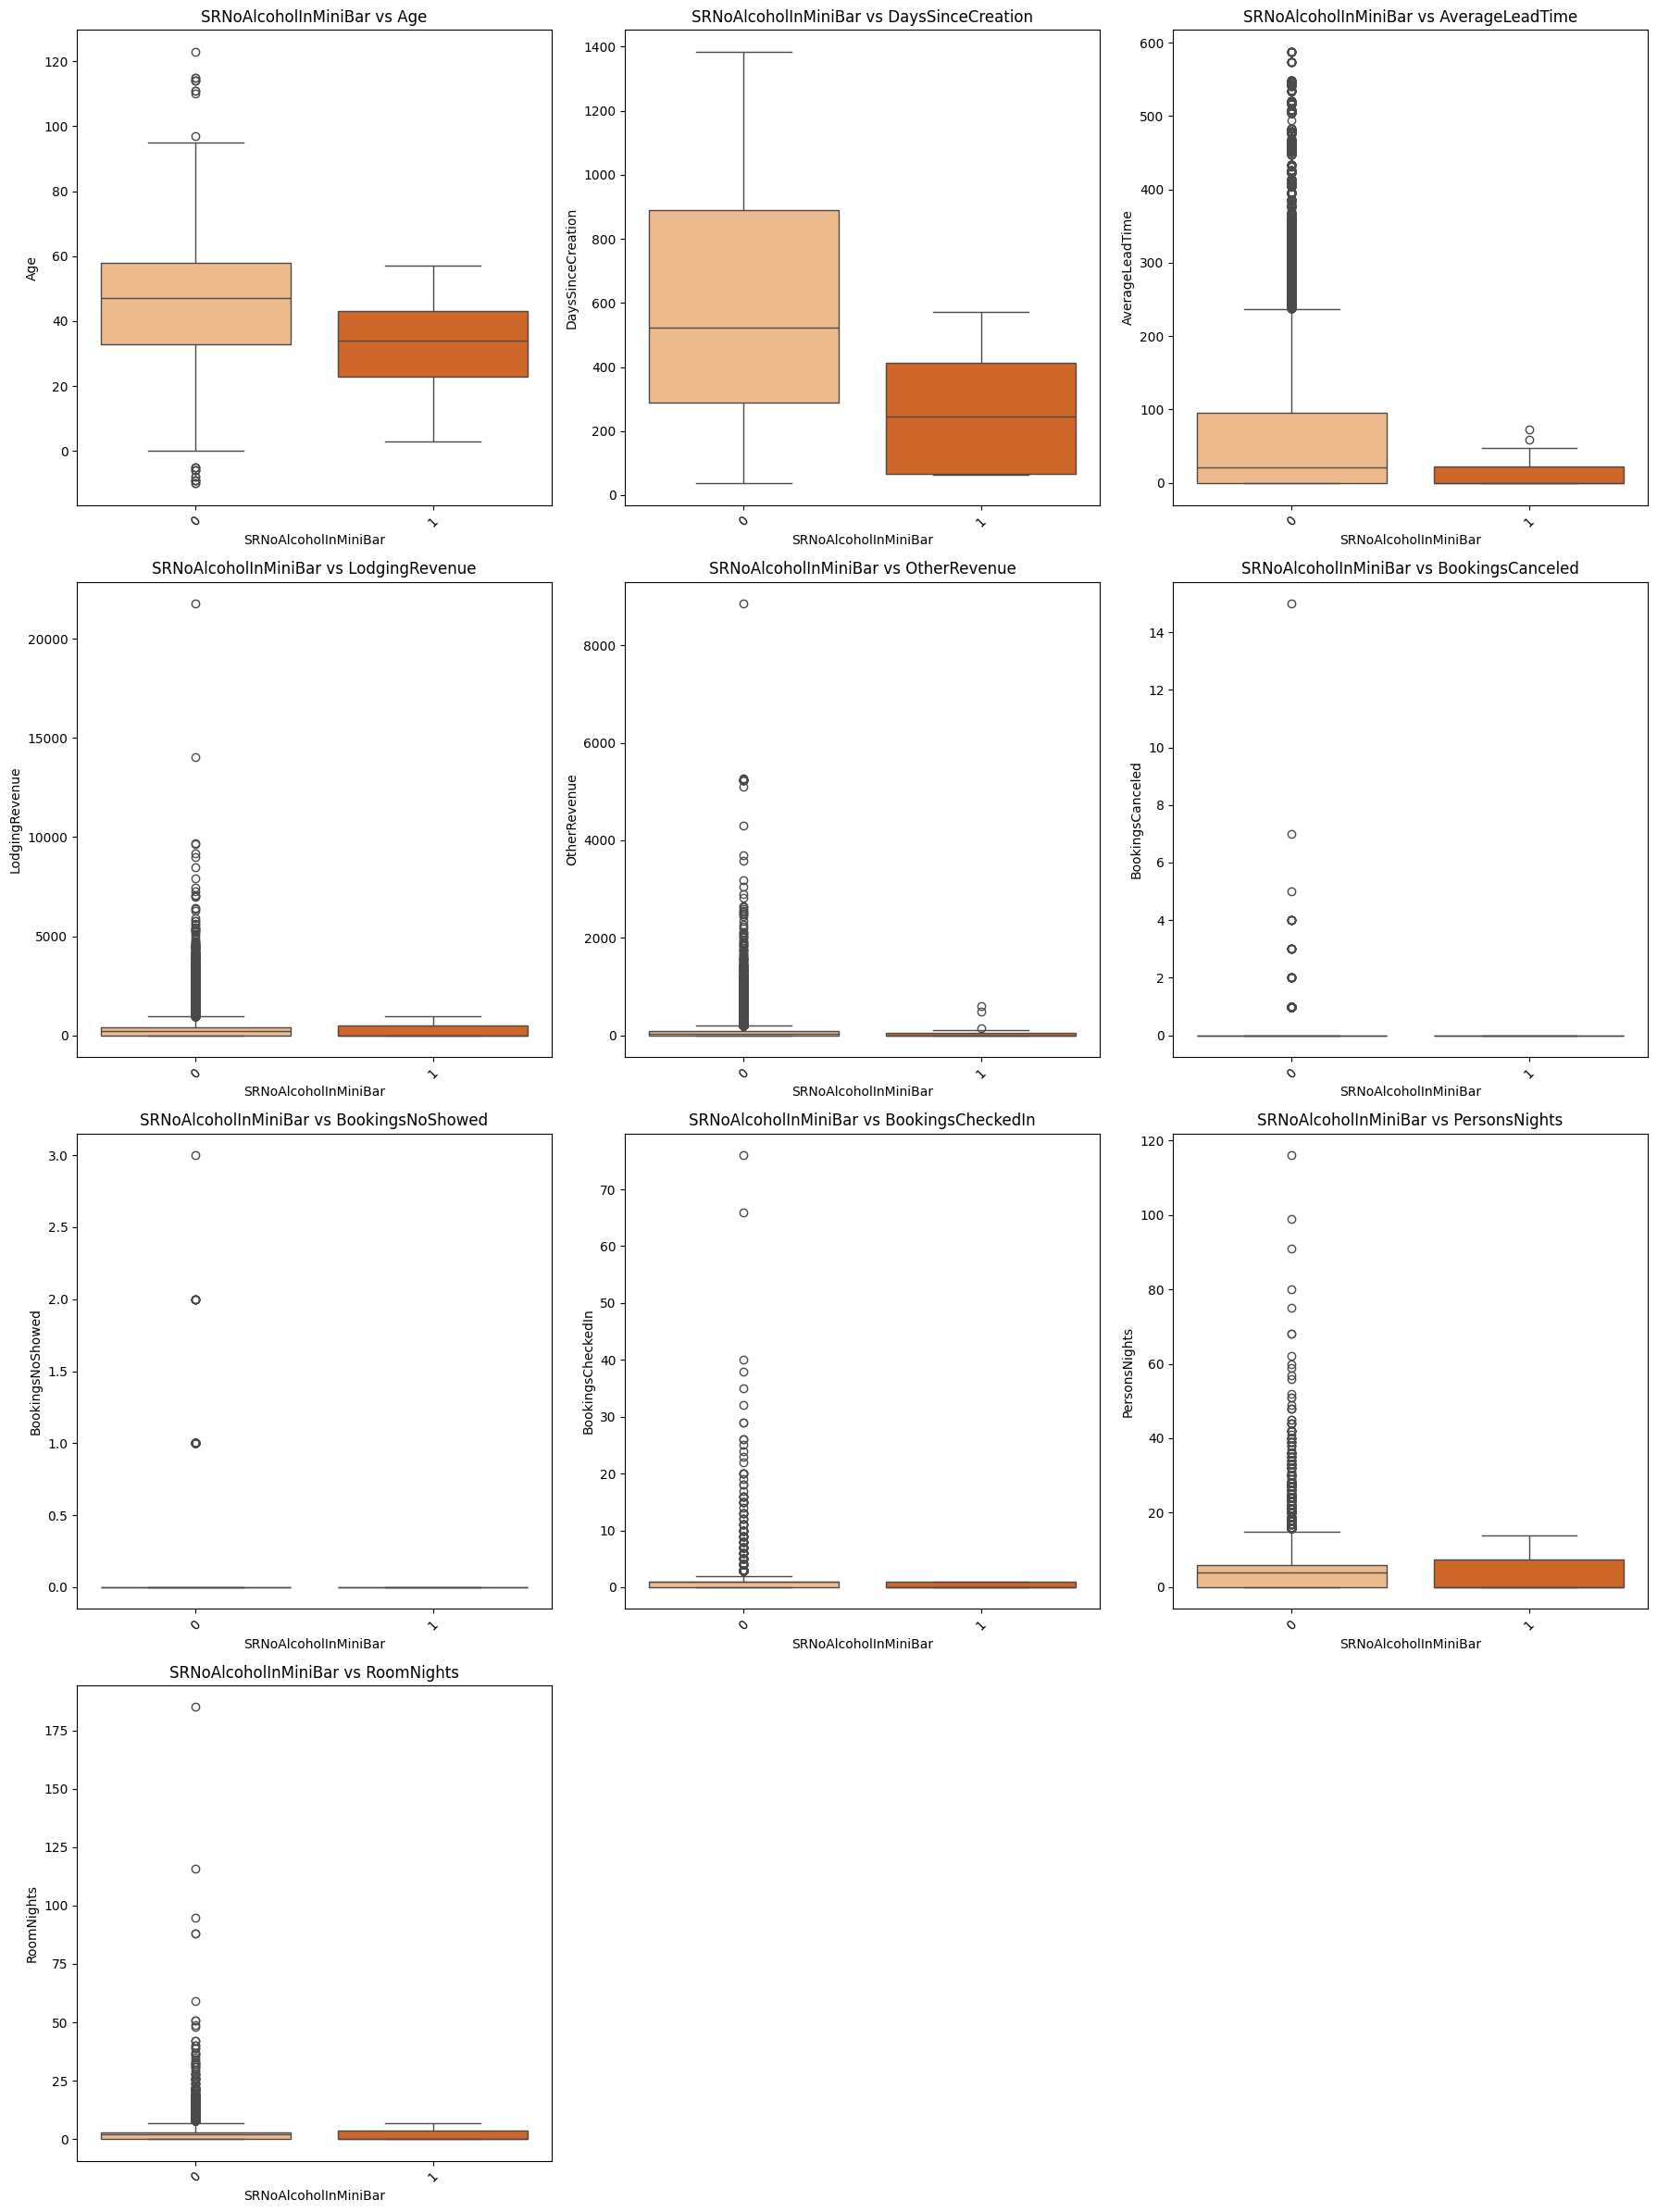

In [80]:
f.boxplots(df, [categ_cols[16]], num_cols)

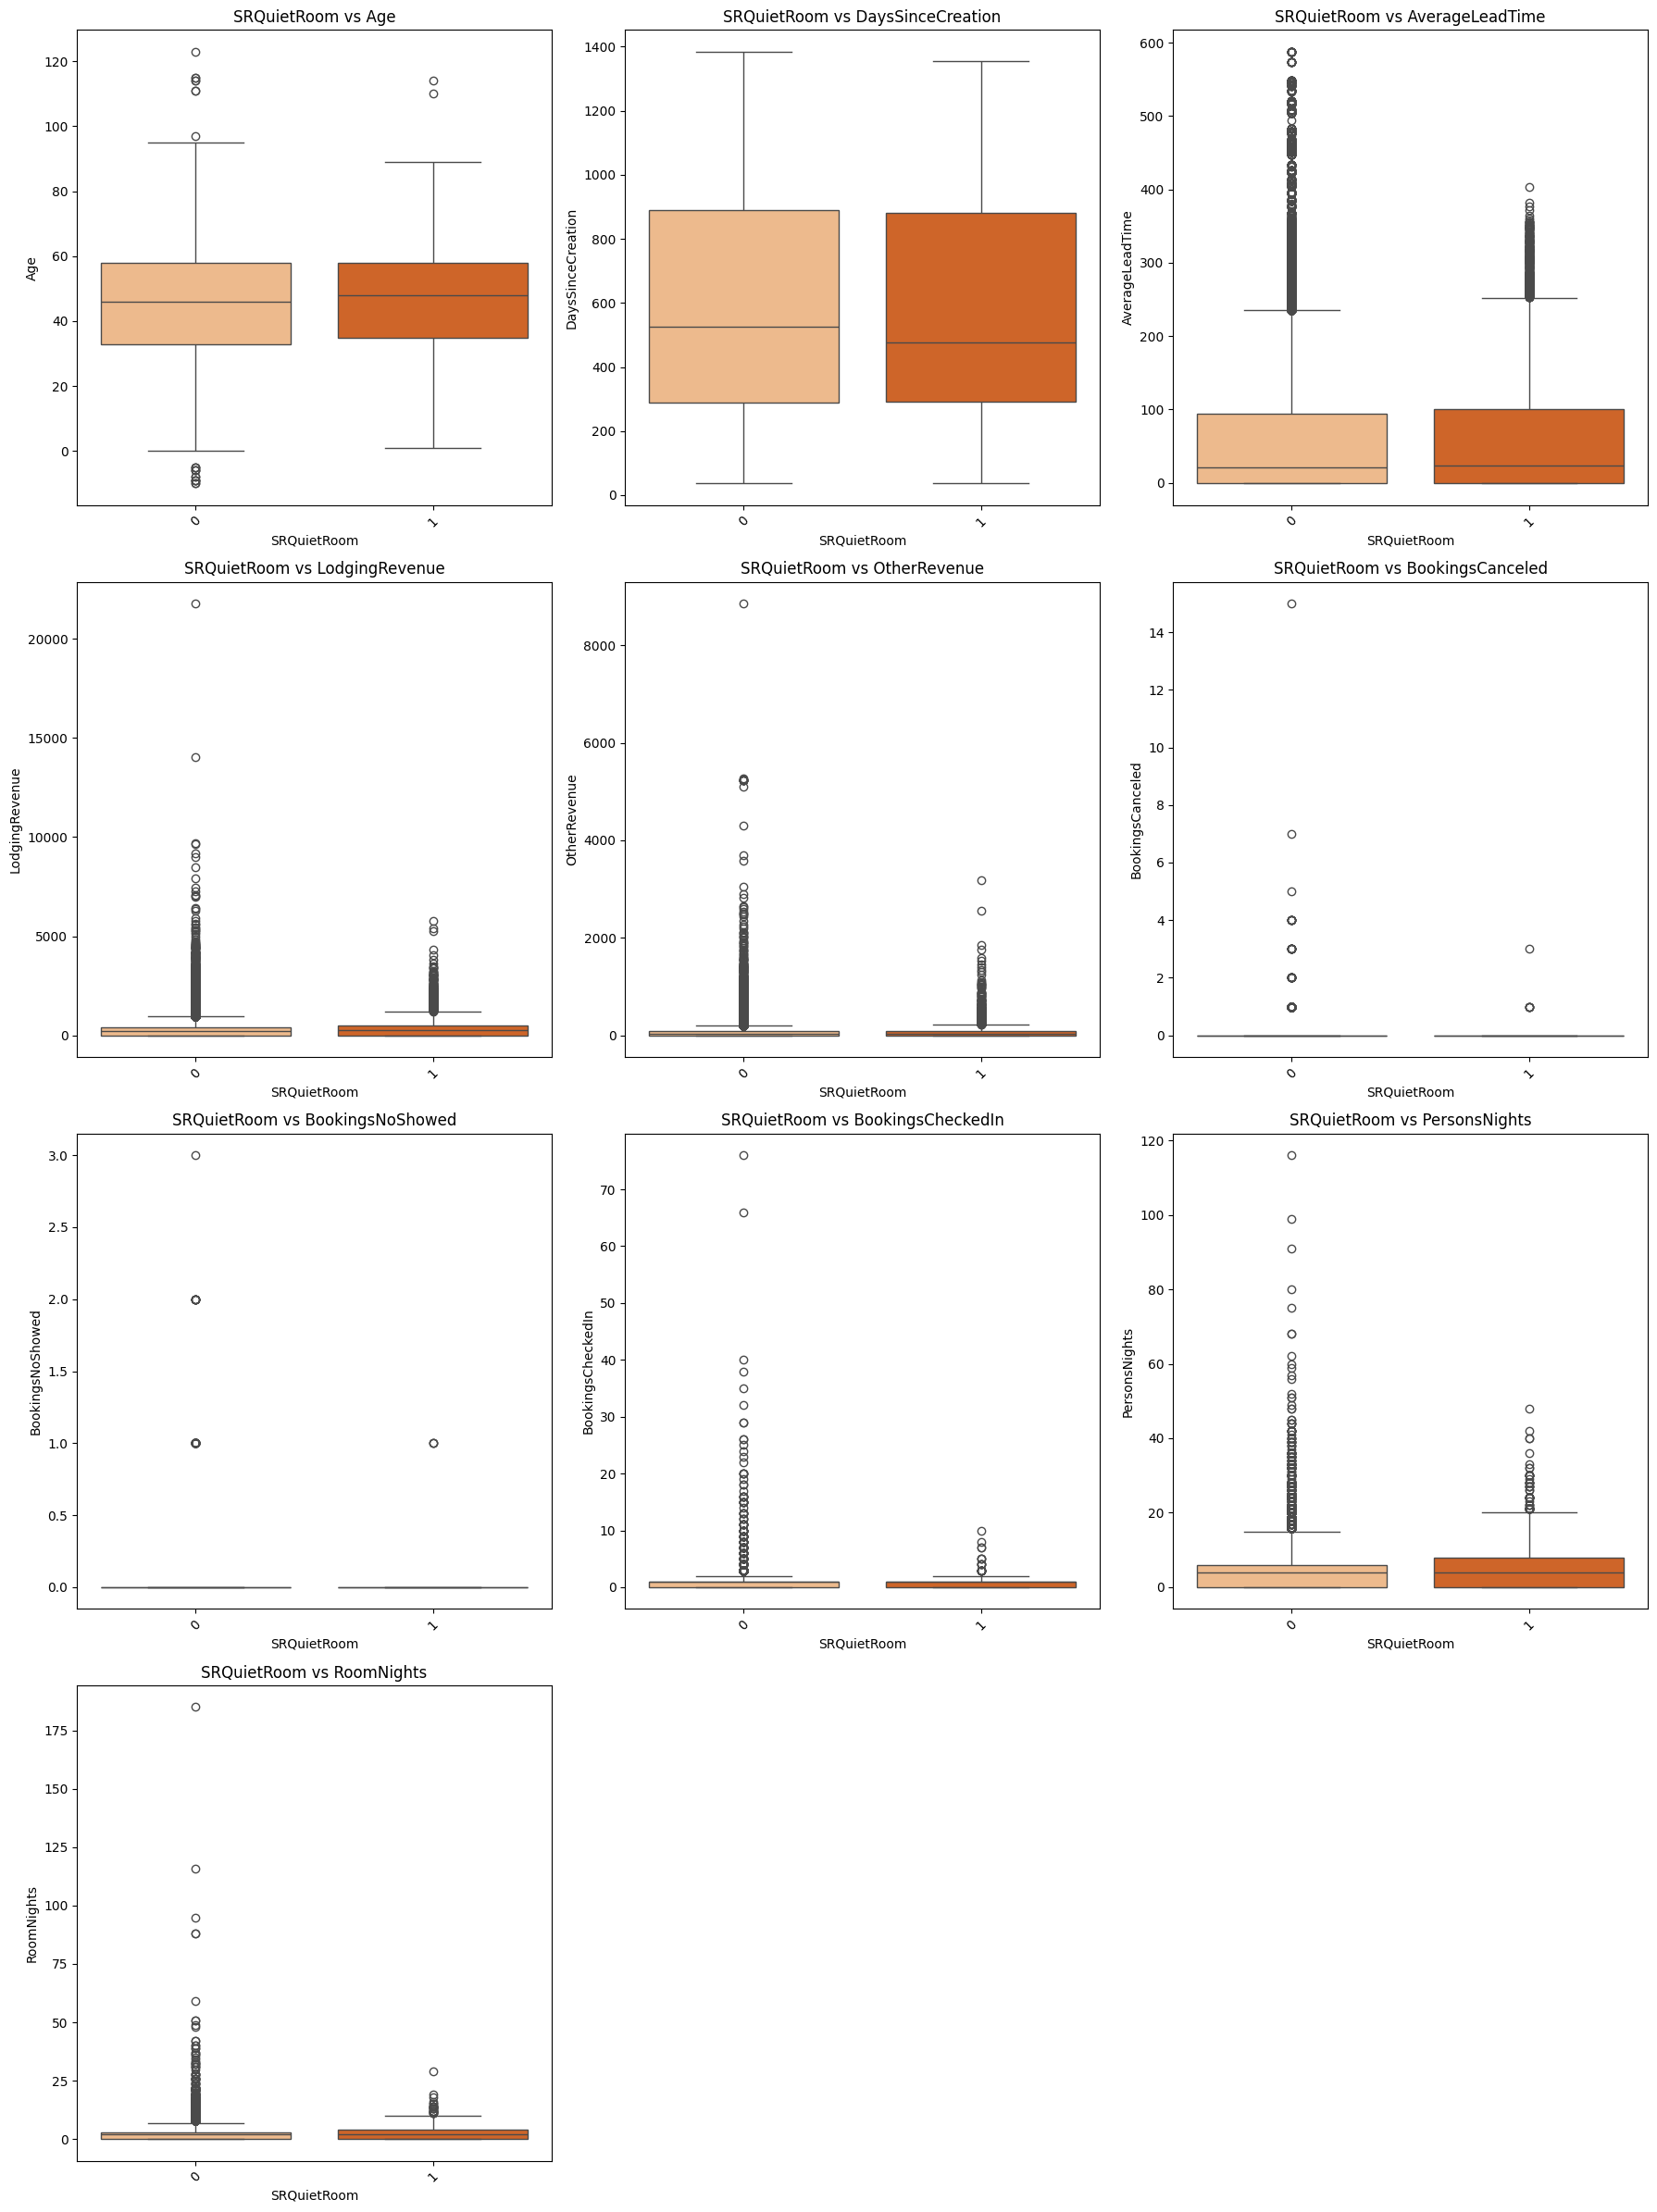

In [81]:
f.boxplots(df, [categ_cols[17]], num_cols)

**Categorical vs Categorical**

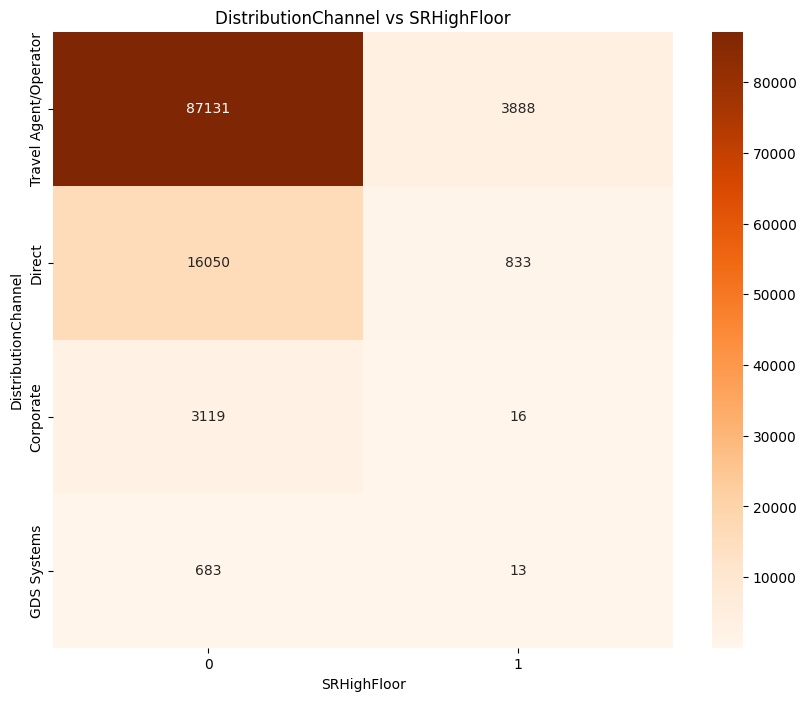

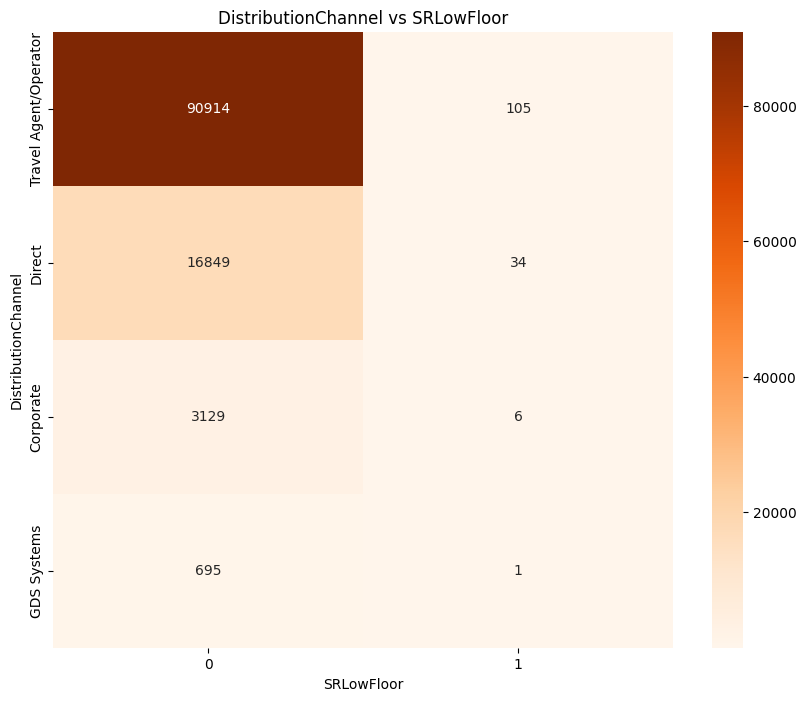

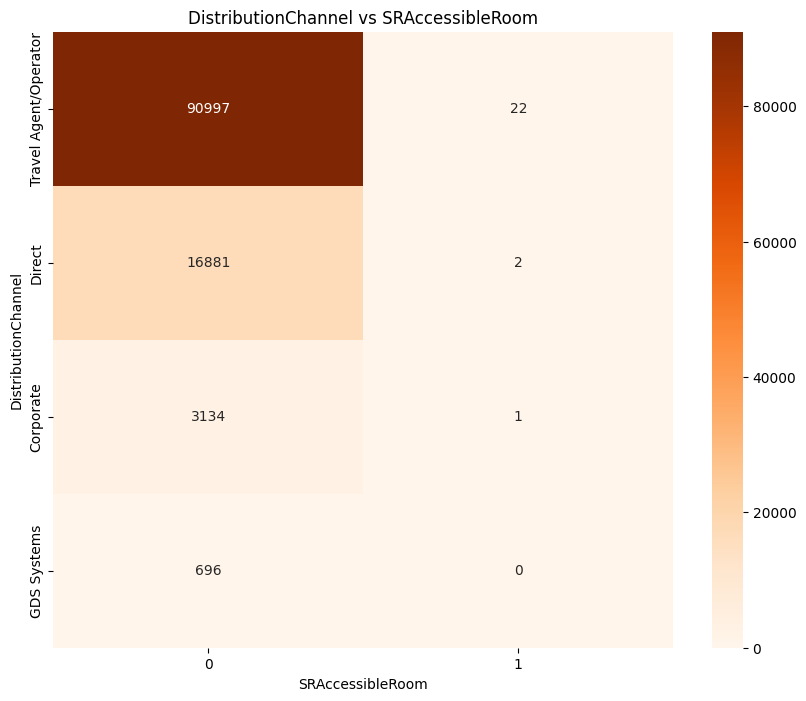

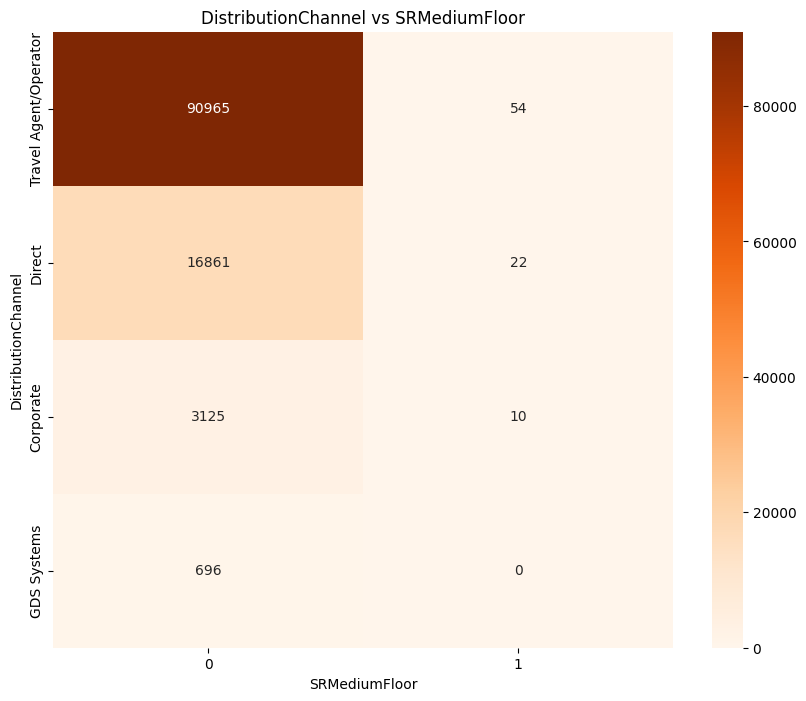

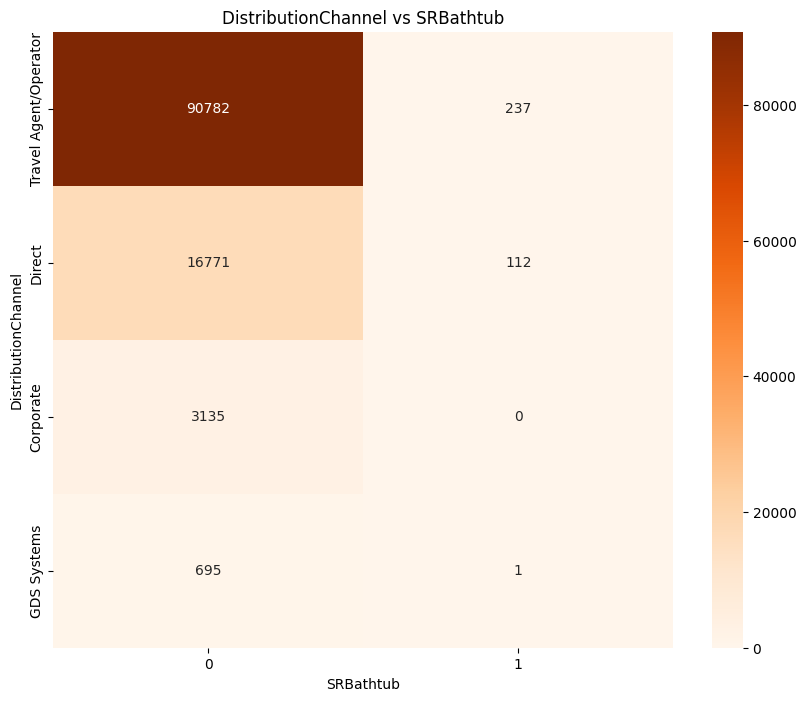

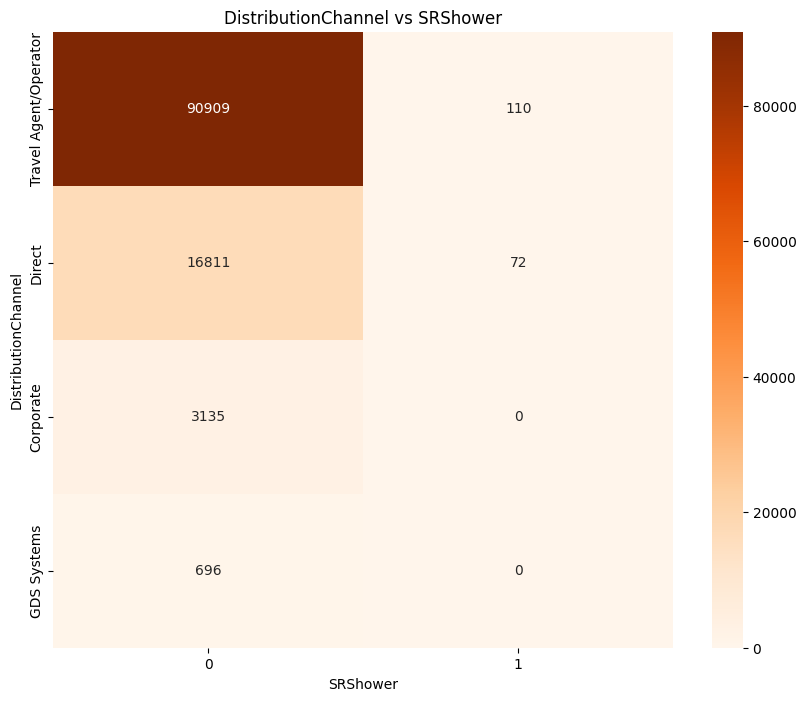

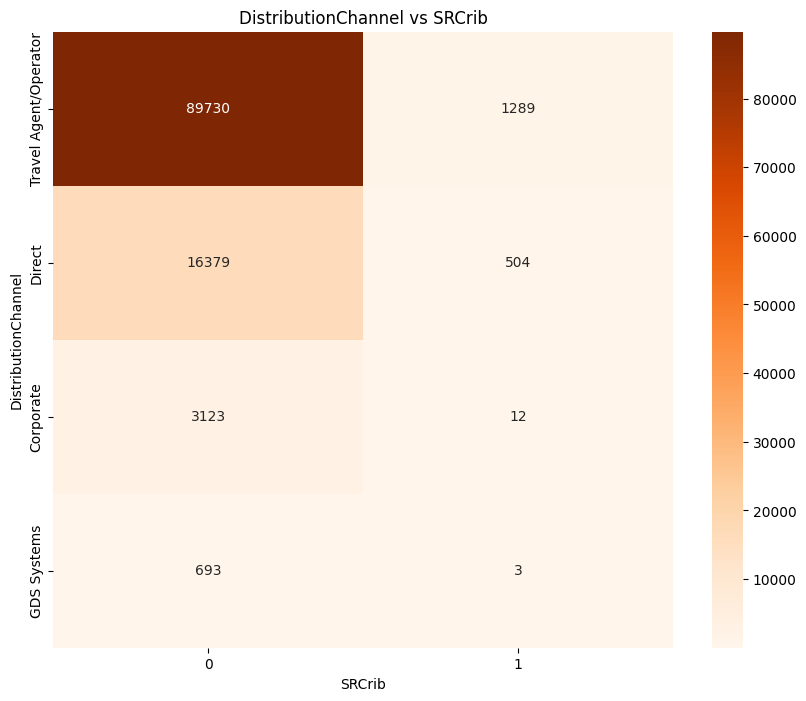

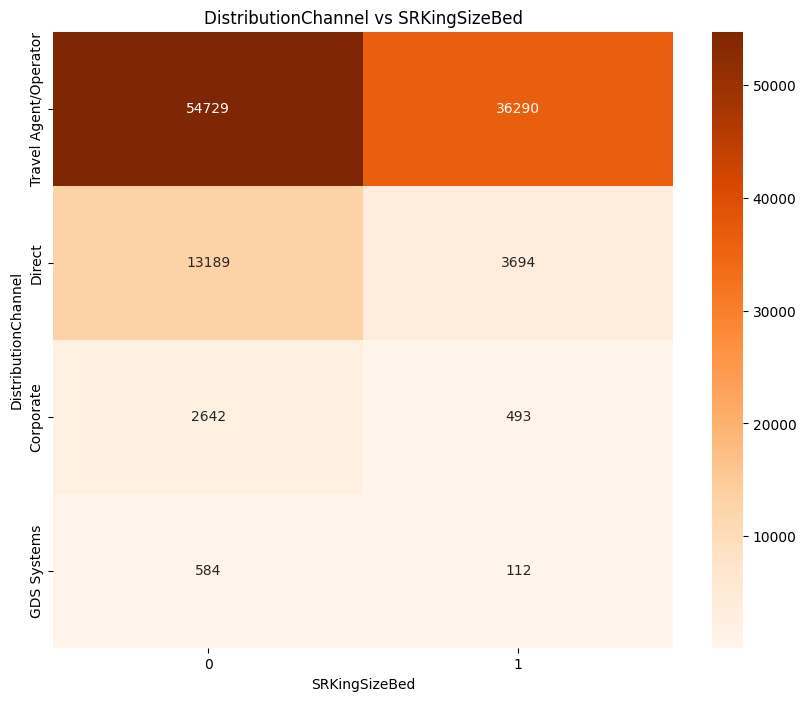

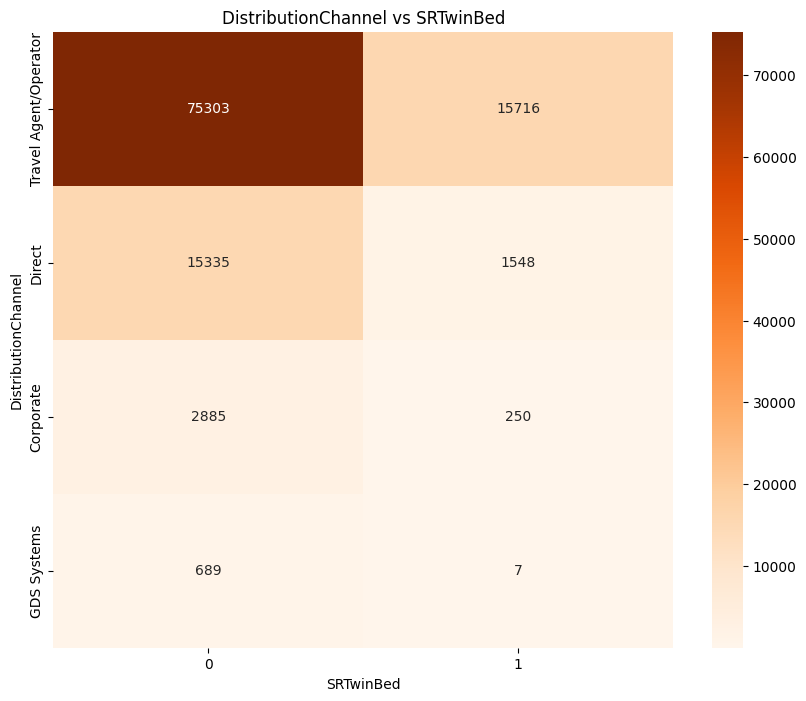

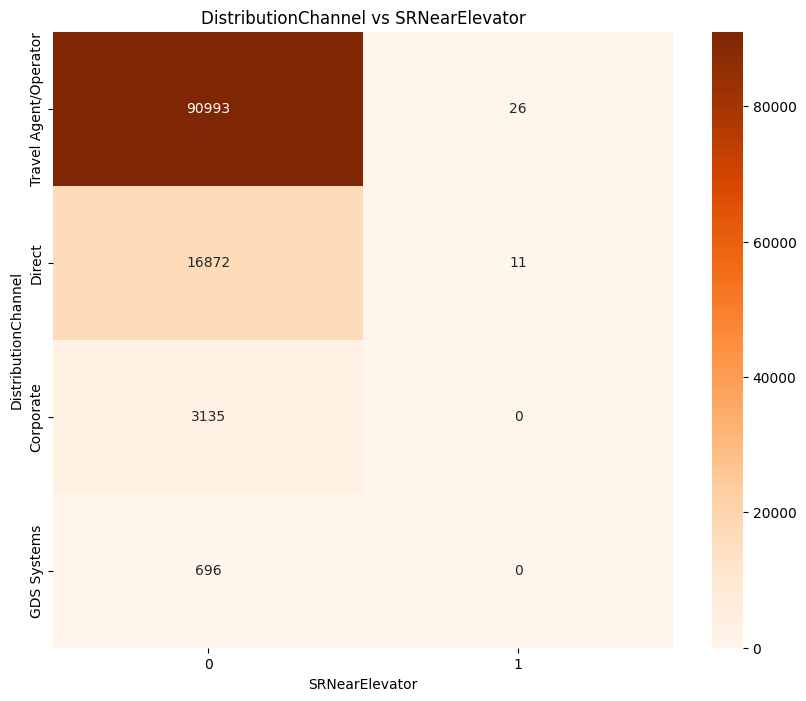

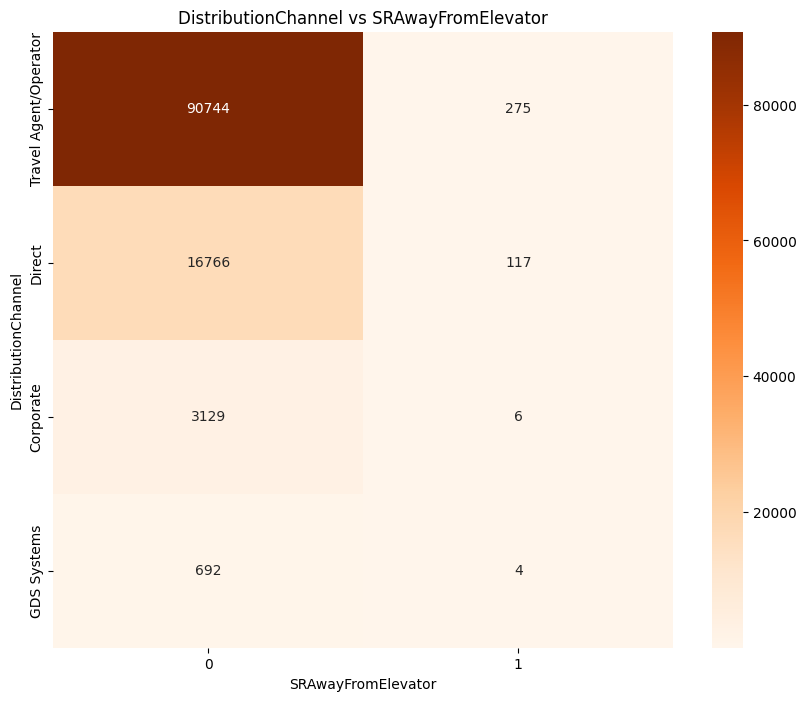

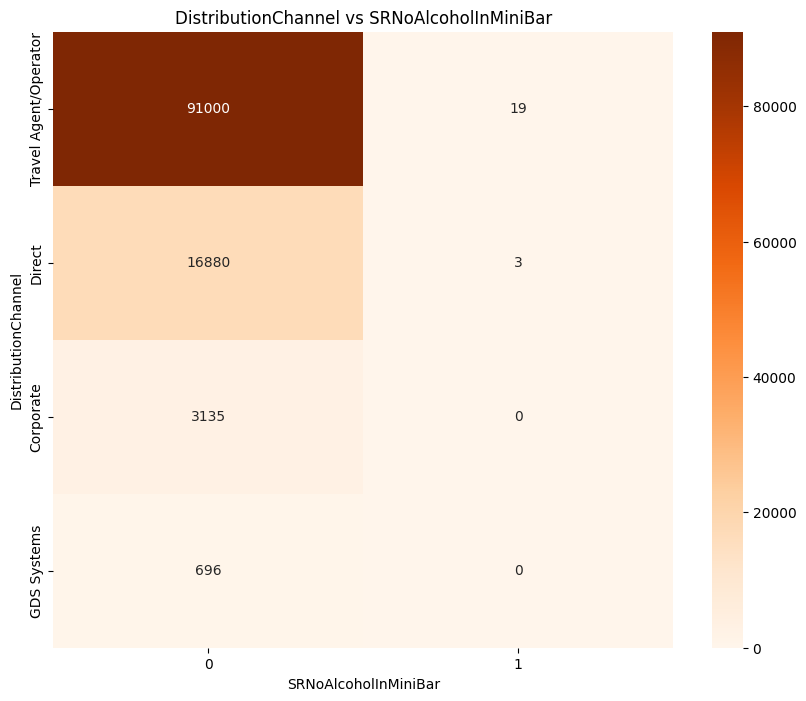

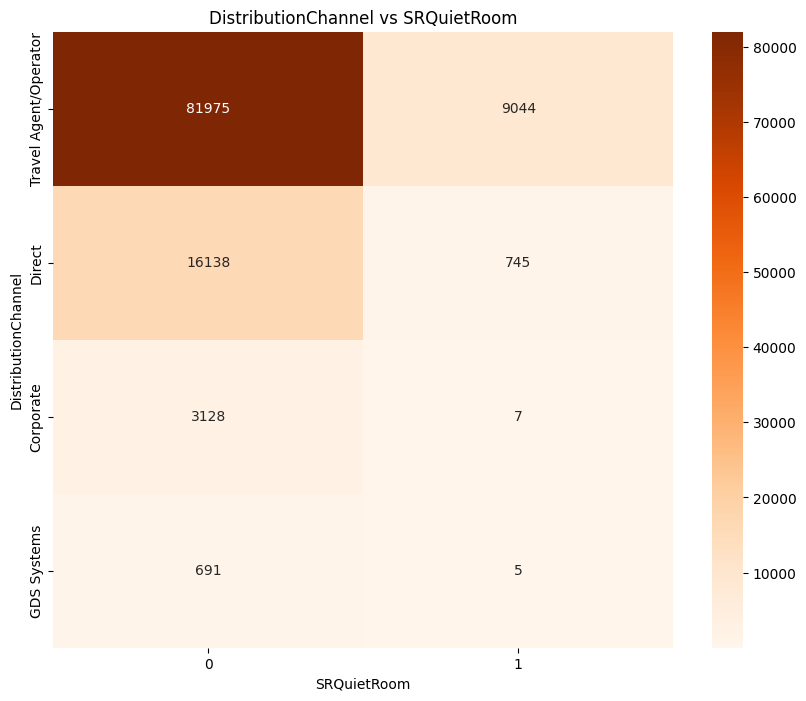

In [82]:
for col in sr_cols:
    f.plot_crosstab(df, 'DistributionChannel', col,
                  annot_kws={"rotation": 0})

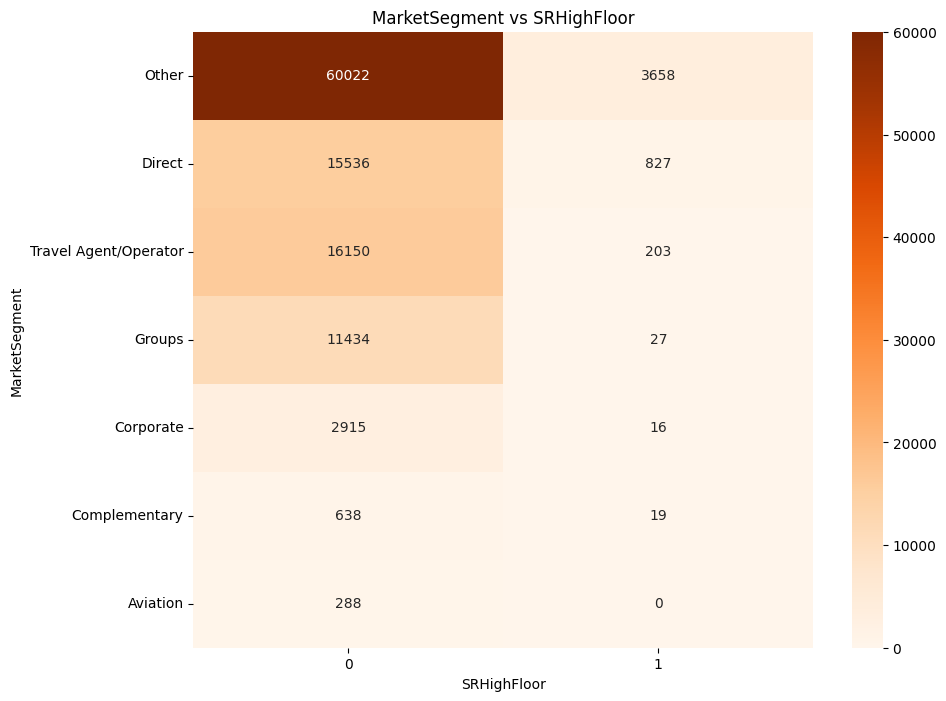

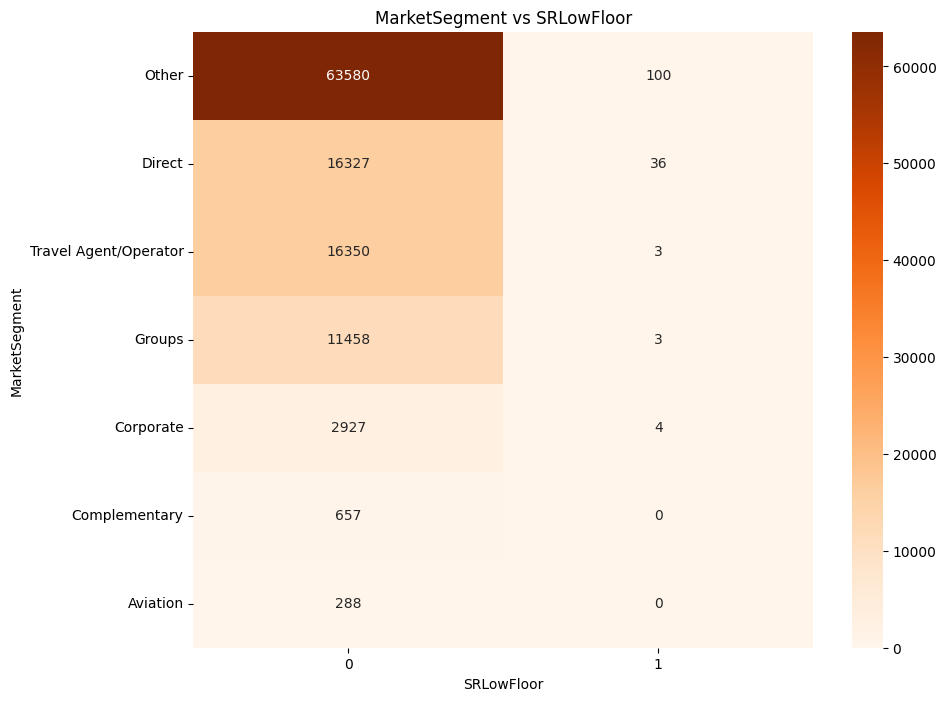

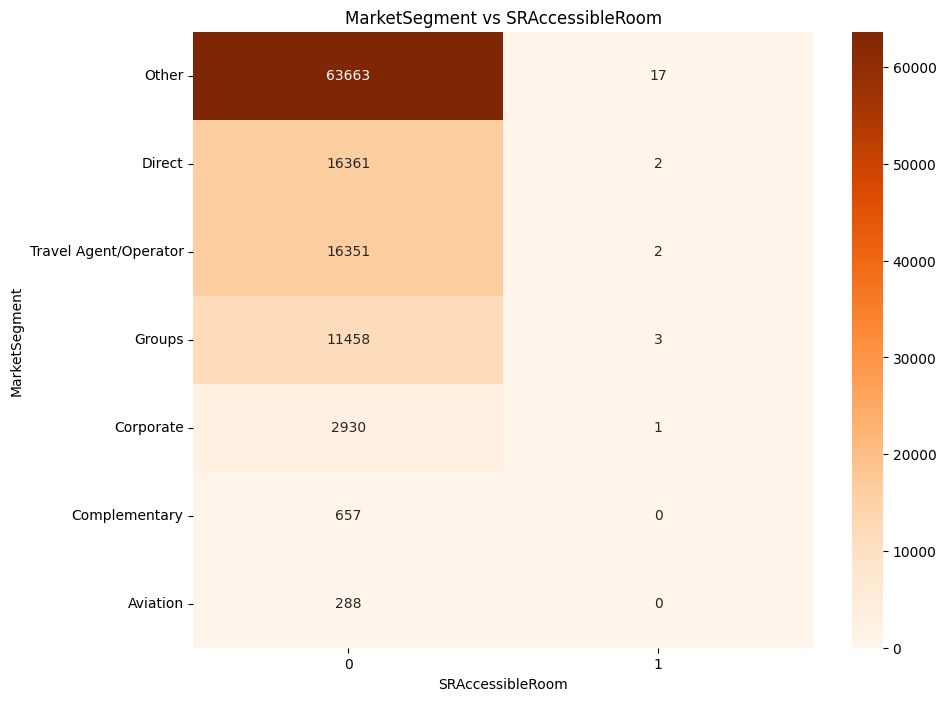

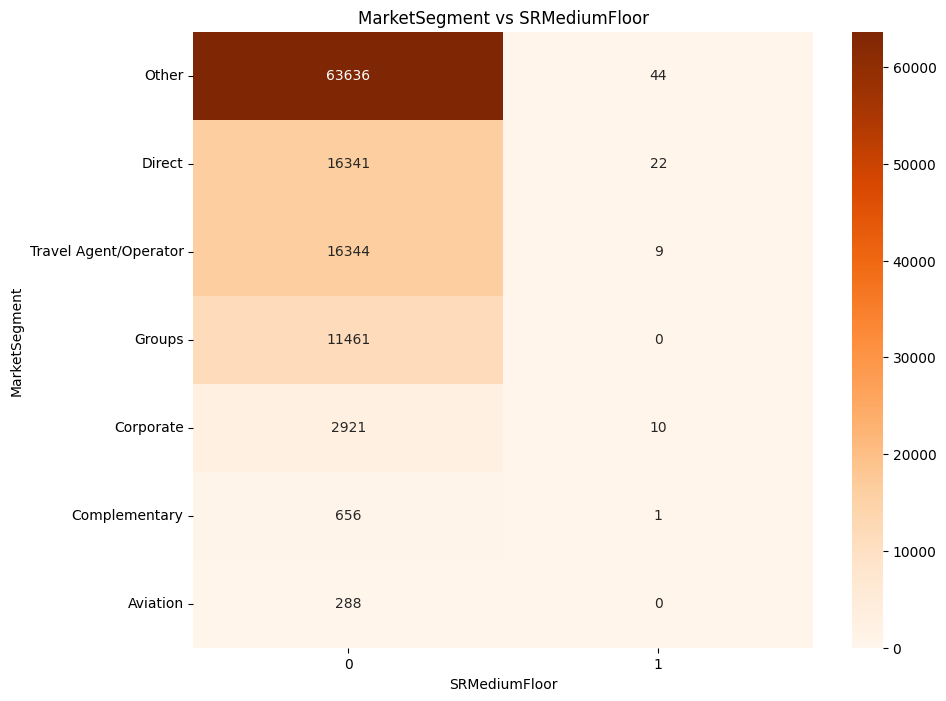

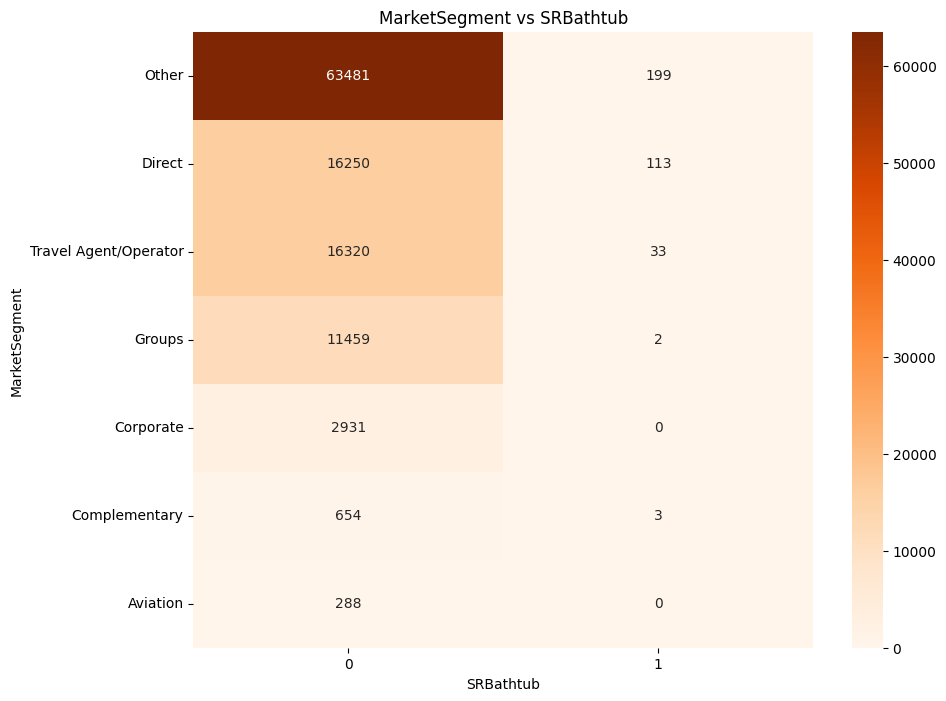

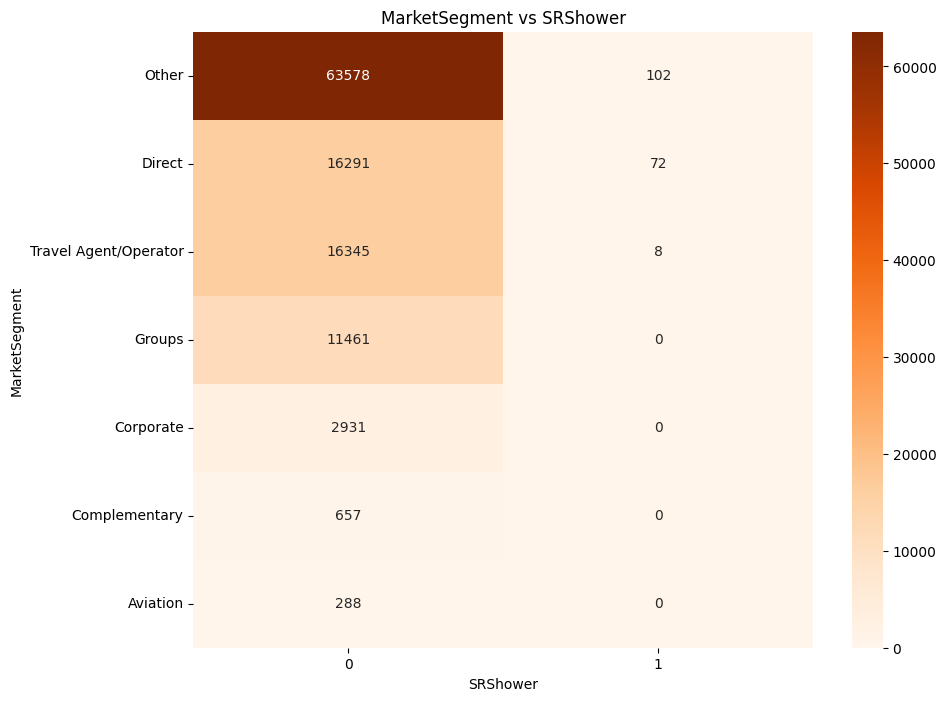

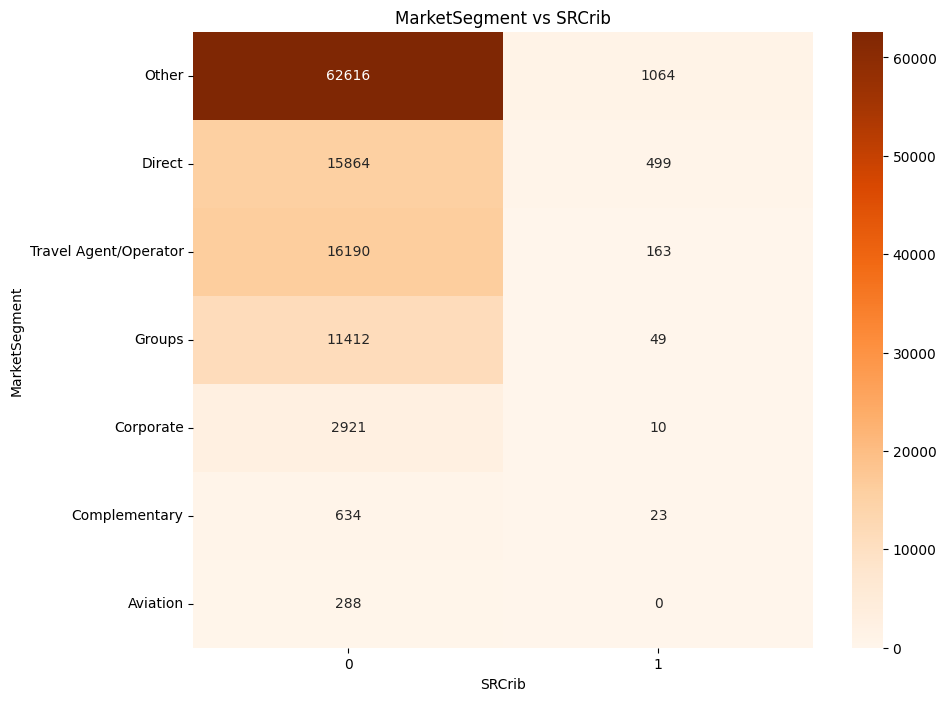

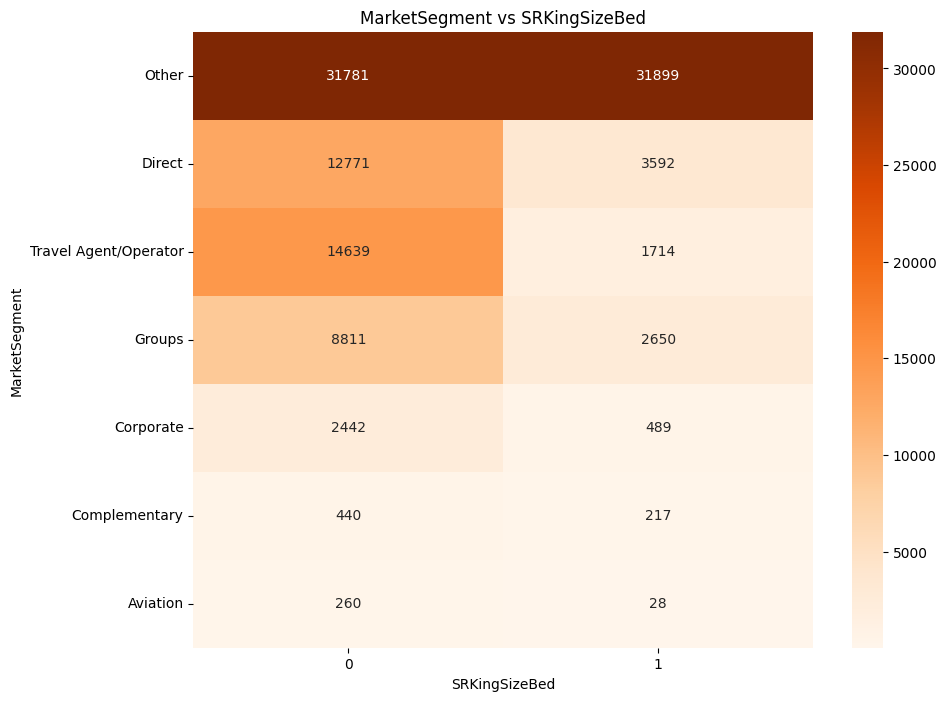

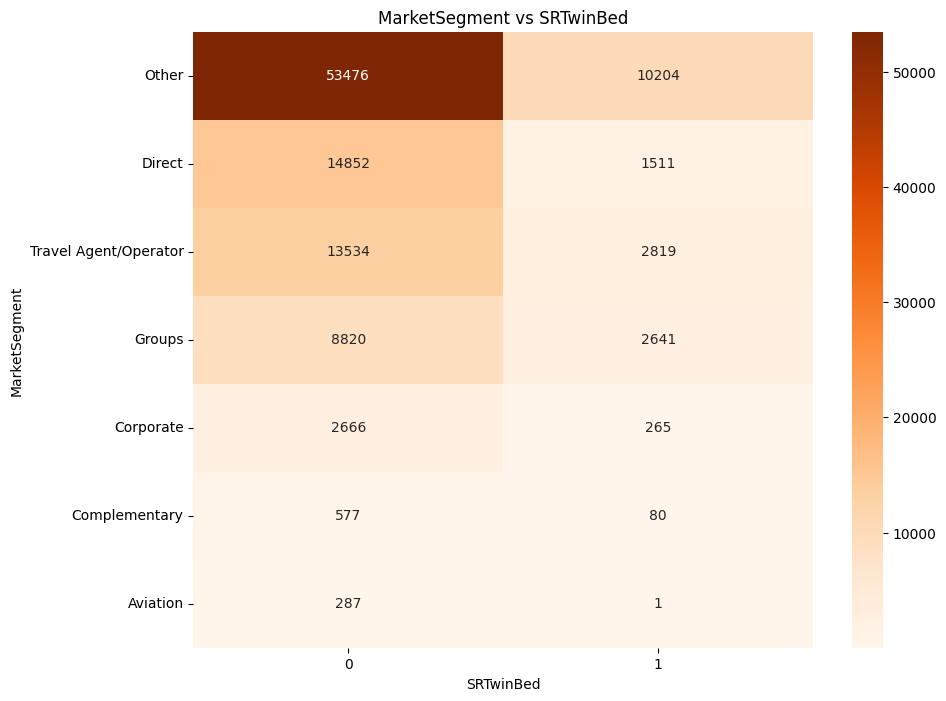

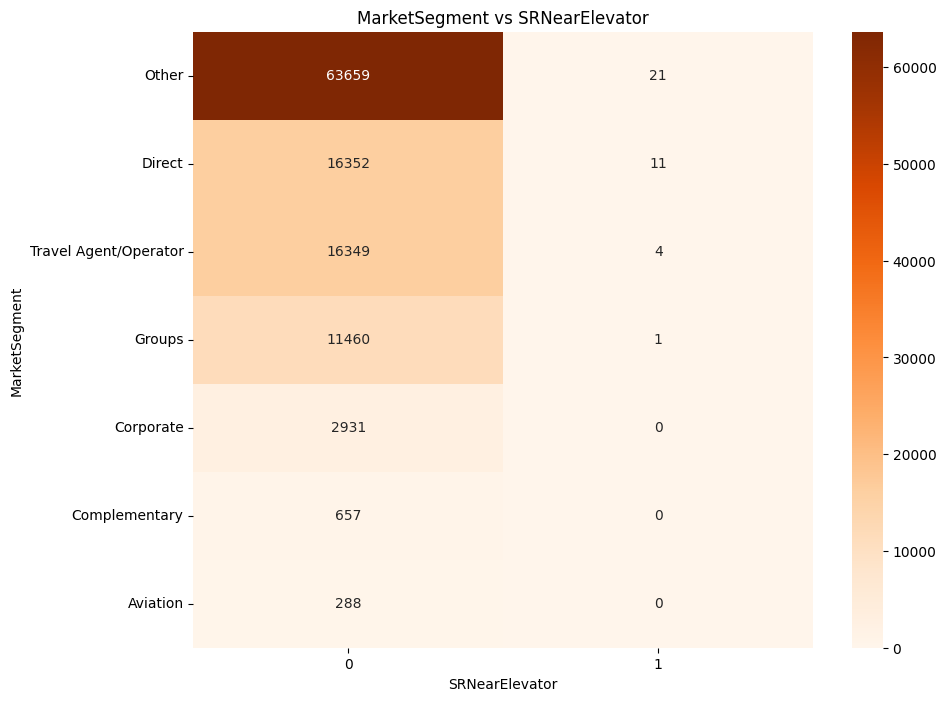

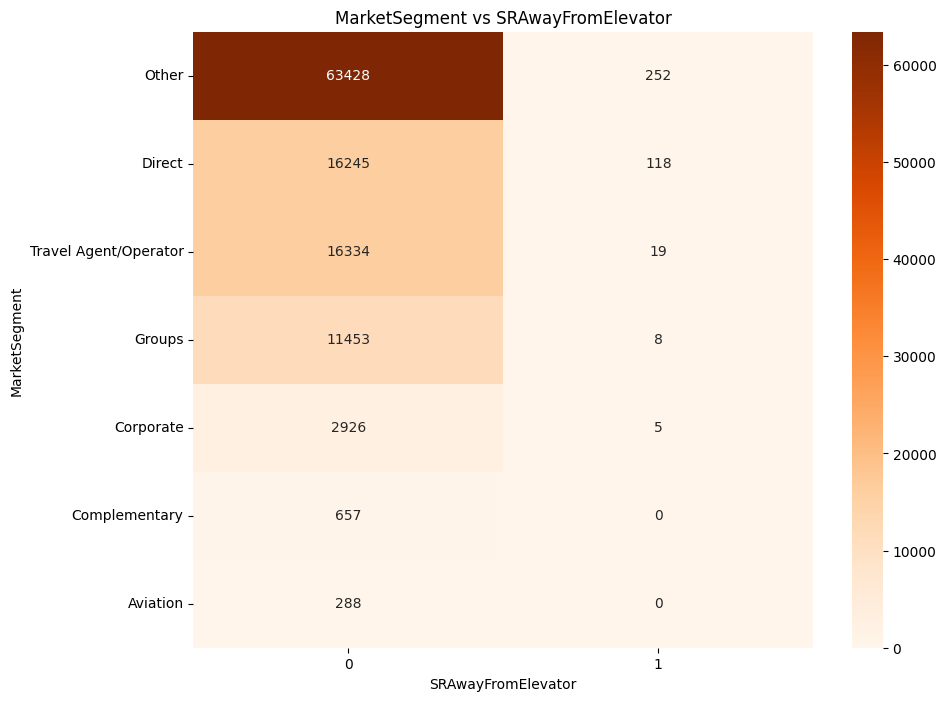

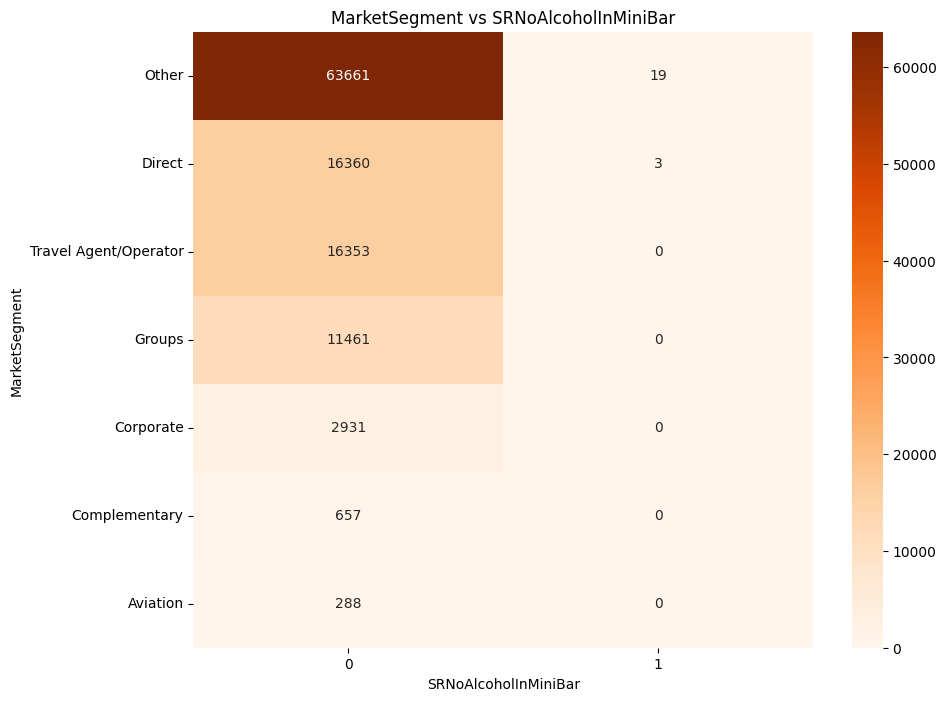

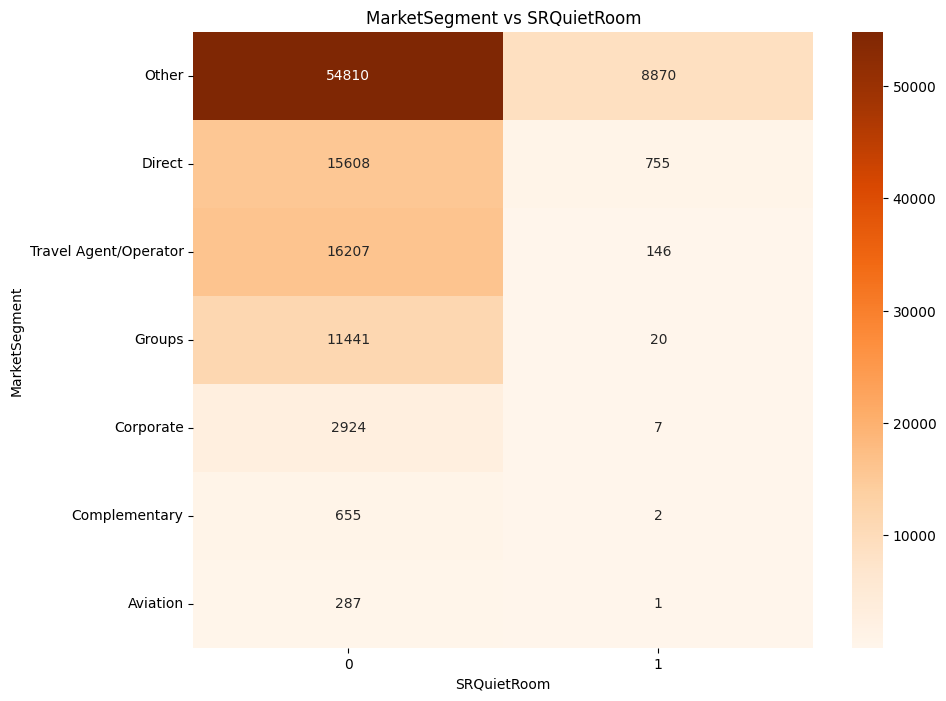

In [83]:
for col in sr_cols:
    f.plot_crosstab(df, 'MarketSegment', col,
                  annot_kws={"rotation": 0})

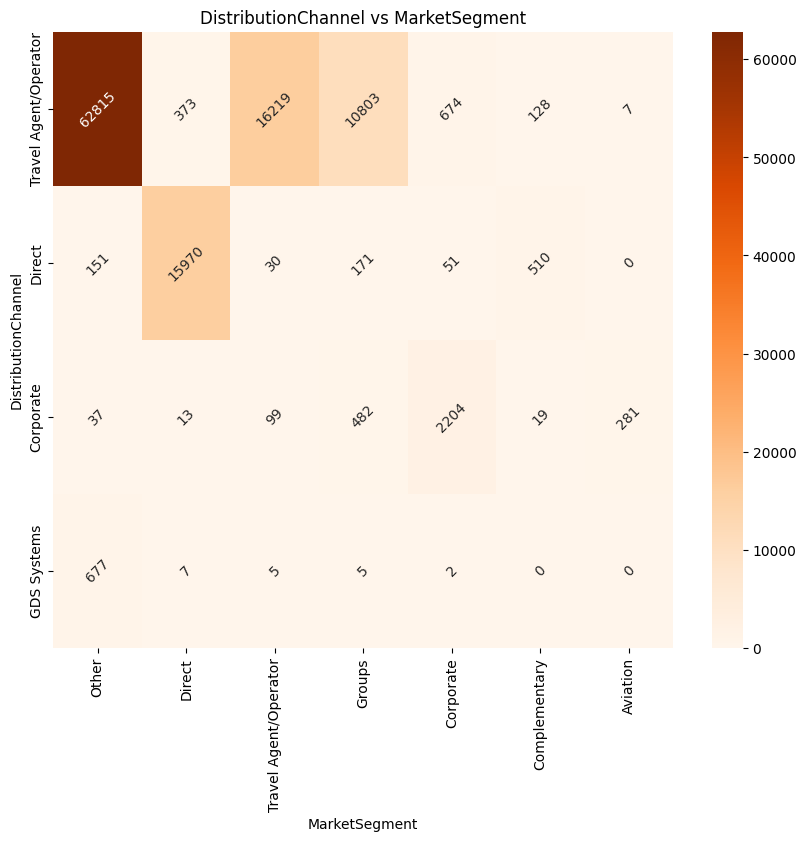

In [84]:
f.plot_crosstab(df, 'DistributionChannel', 
              'MarketSegment', annot_kws={"rotation": 45})

# 3. Data Cleaning and Preprocessing

## 3.1 Duplicates

As previously identified, 111 duplicate value were found therefore we proceed to removing them from the dataset.

In [85]:
df.drop_duplicates(inplace = True)

<br>

## 3.2 Fixing inconsistencies

**Customers' age**

To ensure data consistency, we will treat ages below 16 and 90 or above as inconsistent and mark them as missing. This will help improve the quality of the booking data.

In [86]:
df.loc[(df['Age'] < 16) | (df['Age'] > 90), 'Age'] = np.nan

<br>

**Hash of customer identification number**

For this feature, we considered merging records based on `NameHash`, `DocIDHash` and `DistributionChannel`, this will allow to keep a record for the same customer. This approach ensures that each customer is represented by a single record while still accounting for repeated DocIDHash values. These duplicates may arise due to bookings made through different channels or corporate reservations where multiple names are linked to the same document (DEPENDENDO DO QUE O PROF DIZER TALVEZ AQUI POSSAMOS TB DIZER QUE ISTO PODERÁ ACONTECER PQ SÃO OS FILHOS, POR ISSO APARECE NOMES DIFERENTES, MAS COM O MESMO ID).

In [87]:
# Function to apply the mode to columns with categorical data, returning the most frequent value and the mode(x) otherwise,
# if the rows don't have the mode

def moda(x):
    mode_val = x.mode()
    if not mode_val.empty:
        return mode_val[0]
    else:
        return x.iloc[-1] 

# Function to aggregate data based on 'DocIDHash','NameHash','Nationality' - this indicates the same person
# we are not aggregating based on age as some of the data was imputed manually, and for the examples that were analysed age stays the same
# in all rows
def _aggregated(df):
    agg_rules = {
        'Nationality': moda,
        'Age': moda,
        'DaysSinceCreation': 'max',
        'AverageLeadTime': 'mean',
        'LodgingRevenue': 'sum',
        'OtherRevenue': 'sum',
        'BookingsCanceled': 'sum',
        'BookingsNoShowed': 'sum',
        'BookingsCheckedIn': 'sum',
        'PersonsNights': 'sum',
        'RoomNights': 'sum',
        'MarketSegment': moda,
        'SRHighFloor': moda,
        'SRLowFloor': moda,
        'SRAccessibleRoom': moda,
        'SRMediumFloor': moda,
        'SRBathtub': moda,
        'SRShower': moda,
        'SRCrib': moda,
        'SRKingSizeBed': moda,
        'SRTwinBed': moda,
        'SRNearElevator': moda,
        'SRAwayFromElevator': moda,
        'SRNoAlcoholInMiniBar': moda,
        'SRQuietRoom': moda
    }
    
    return df.groupby(['DocIDHash','NameHash', 'DistributionChannel']).agg(agg_rules).reset_index()

In [88]:
ds_neighbors = df.dropna(subset=['DocIDHash'])
ds_neighbors

Nationality   Age  DaysSinceCreation  \
ID                                            
1              PRT  52.0                440   
2              PRT   NaN               1385   
3              DEU  32.0               1385   
4              FRA  61.0               1385   
5              FRA  52.0               1385   
...            ...   ...                ...   
111729         DEU  31.0                 36   
111730         BRA  43.0                 36   
111731         BRA  37.0                 36   
111732         DEU  48.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
1       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111730  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111732  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
1       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111730  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111732  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
1               292.00          82.3                 1                 0   
2               280.00          53.0                 0                 0   
3                 0.00           0.0                 0                 0   
4               240.00          60.0                 0                 0   
5                 0.00           0.0                 0                 0   
...                ...           ...               ...               ...   
111729            0.00           0.0                 0                 0   
111730          755.25          20.0                 0                 0   
111731            0.00           0.0                 0                 0   
111732          708.00         185.0                 0                 0   
111733            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
1                       2              6           4              Corporate   
2                       1             10           5  Travel Agent/Operator   
3                       0              0           0  Travel Agent/Operator   
4                       1             10           5  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
...                   ...            ...    

In [89]:
filtered_DocIDHash = _aggregated(ds_neighbors)

: 

In [92]:
filtered_DocIDHash

DocIDHash  \
0       0x00006E606D590F336C289D2CC995A0C726878BCAC001...   
1       0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...   
2       0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...   
3       0x0002AE77553DBEBD734F0C644E6BE142EA0B4C5D5D83...   
4       0x0002DDD31332B77DA9499876CD3577B08844812E95F2...   
...                                                   ...   
107623  0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...   
107624  0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...   
107625  0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...   
107626  0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...   
107627  0xFFFF697C455DCDFA906747736B03F3A61D20A92C8F74...   

                                                 NameHash Nationality   Age  \
0       0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...         FRA  60.0   
1       0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...         DEU  54.0   
2       0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...         USA  34.0   
3       0xF47414CC56472838252EE0BB9C0639AEA24312985ECA...         IND   NaN   
4       0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...         ESP  53.0   
...                                                   ...         ...   ...   
107623  0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...         USA  49.0   
107624  0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...         CAN  41.0   
107625  0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...         FRA  19.0   
107626  0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...         IRL  26.0   
107627  0xFADD4AC7A38534209C862EF3C9FC47C74509433C8A23...         ITA  60.0   

        DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0                     480             64.0           495.0         162.0   
1                    1197             14.0           695.0         100.0   
2                     120              0.0             0.0           0.0   
3                     569              0.0             0.0           0.0   
4                     755             56.0           165.0          12.0   
...                   ...              ...             ...           ...   
107623                123              0.0             0.0           0.0   
107624                783             58.0           218.0          14.0   
107625                 46             89.0           911.7          31.0   
107626                507              0.0             0.0           0.0   
107627                 55            176.0           730.8          96.0   

        BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                      0                 0                  2              6   
1                      0                 0                  1             10   
2                      0                 0                  0              0   
3                      0                 0                  0              0   
4                      0                 0                  1              3   
...                  ...               ...                ...            ...   
107623                 0                 0                  0              0   
107624                 0                 0                  1              2   
107625                 0                 0                  1             14   
107626                 0                 0                  0              0   
107627                 0                 0                  1             12   

        RoomNights    DistributionChannel MarketSegment SRHighFloor  \
0                3  Travel Agent/Operator         Other           0   
1                5  Travel Agent/Operator         Other           1   
2                0                 Direct        Direct           1   
3                0  Travel Agent/Operator         Other           0   
4                1  Travel Agent/Operator         Other           0   
...            ...                    ...           ...         ..

In [94]:
filtered_DocIDHash['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    2826
0x1B16B1DF538BA12DC3F97EDBB85CAA7050D46C148134290FEBA80F8236C83DB9      10
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B       9
0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BDB7DBBA7E32620809C799       7
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52       6
                                                                      ... 
0x55713C590EACE707723AC0C7939749D4304EB61F11EDB55E4C9FF44A11ECDFEB       1
0x556F73EB7ACA9C91598C1E04FE463860C822781CD05AD21F6533079227ABBD69       1
0x556F0B4E151B9169A66A1818E5BA24D440D8844CB63F240CB24D02E27D7E62ED       1
0x556DD77B51C0F5CEAB56E867CB45ACB9EB2B1E57A07E83BDCE0FA7A586F4C837       1
0xFFFF697C455DCDFA906747736B03F3A61D20A92C8F741ED432C03B2E7E5DD6AD       1
Name: count, Length: 103480, dtype: int64

In [93]:
df

Nationality   Age  DaysSinceCreation  \
ID                                            
1              PRT  52.0                440   
2              PRT   NaN               1385   
3              DEU  32.0               1385   
4              FRA  61.0               1385   
5              FRA  52.0               1385   
...            ...   ...                ...   
111729         DEU  31.0                 36   
111730         BRA  43.0                 36   
111731         BRA  37.0                 36   
111732         DEU  48.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
1       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111729  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111730  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111731  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111732  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111733  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
ID                                                                           
1       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111729  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111730  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111731  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111732  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111733  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                         
1               292.00          82.3                 1                 0   
2               280.00          53.0                 0                 0   
3                 0.00           0.0                 0                 0   
4               240.00          60.0                 0                 0   
5                 0.00           0.0                 0                 0   
...                ...           ...               ...               ...   
111729            0.00           0.0                 0                 0   
111730          755.25          20.0                 0                 0   
111731            0.00           0.0                 0                 0   
111732          708.00         185.0                 0                 0   
111733            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                            
1                       2              6           4              Corporate   
2                       1             10           5  Travel Agent/Operator   
3                       0              0           0  Travel Agent/Operator   
4                       1             10           5  Travel Agent/Operator   
5                       0              0           0  Travel Agent/Operator   
...                   ...            ...    

<br>

## 3.3 Feature Engineering

### 3.3.1 Creating Features

TotalRevenue

In [ ]:
df["TotalRevenue"] = df["LodgingRevenue"] + df["OtherRevenue"]

Lifetime Value (LTV)

In [ ]:
df["LTV"] = df["TotalRevenue"] / (df["DaysSinceCreation"] + 1)

RetentionRate

In [ ]:
df["RetentionRate"] = df["BookingsCheckedIn"] / (
    df["BookingsCanceled"] + df["BookingsNoShowed"] + df["BookingsCheckedIn"] + 1
)

RevenuePerNight

In [ ]:
df["RevenuePerNight"] = df["TotalRevenue"] / (df["RoomNights"] + 1)

RevenuePerPersonNight

In [ ]:
df["RevenuePerPersonNight"] = df["TotalRevenue"] / (df["PersonsNights"] + 1)

PreferenceScore

In [ ]:
df["PreferenceScore"] = df.iloc[:, 15:27].sum(axis=1)

LeadTimeCategory

In [ ]:
df["LeadTimeCategory"] = pd.cut(
    df["AverageLeadTime"],
    bins=[0, 3, 30, np.inf],
    labels=["Last-minute", "Planner", "Early Booker"],
)

AgeGroup

In [ ]:
df["AgeGroup"] = pd.cut(
    df["Age"], bins=[0, 30, 50, np.inf], labels=["Young", "Adult", "Senior"]
)

CustomerCategory

In [ ]:
df["CustomerCategory"] = pd.cut(
    df["DaysSinceCreation"], bins=[0, 365, 1095, np.inf], labels=["New", "Recent", "Loyal"]
)

### 3.2.2 Encoding

In [ ]:
categorical_cols = ["Nationality", "DistributionChannel", "MarketSegment", "LeadTimeCategory", "AgeGroup", "CustomerCategory"]
ohe = OneHotEncoder(sparse_output=False, drop="first")
categorical_encoded = ohe.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out())

df = df.drop(columns=categorical_cols)
df = pd.concat([df, categorical_df], axis=1)

## 3.3 Missing Values

## 3.4 Outliers

### 3.3.1 Univariate Outliers

In [62]:
outliers_dict = {'Age': {"n_bins": 15, "left_out": 0, "right_out": 95},
                 'DaysSinceCreation': {"n_bins": 15, "left_out": None, "right_out": None},
                 'AverageLeadTime': {"n_bins": 15, "left_out": None, "right_out": 570},
                 'LodgingRevenue': {"n_bins": 15, "left_out": None, "right_out": 10500},
                 'OtherRevenue': {"n_bins": 15, "left_out": None, "right_out": 3500},
                 'BookingsCanceled': {"n_bins": 15, "left_out": None, "right_out": 4.5},
                 'BookingsNoShowed': {"n_bins": 15, "left_out": None, "right_out": 2.5},
                 'BookingsCheckedIn': {"n_bins": 15, "left_out": None, "right_out": 45},
                 'PersonsNights': {"n_bins": 15, "left_out": None, "right_out": 65},
                 'RoomNights': {"n_bins": 15, "left_out": None, "right_out": 75}}

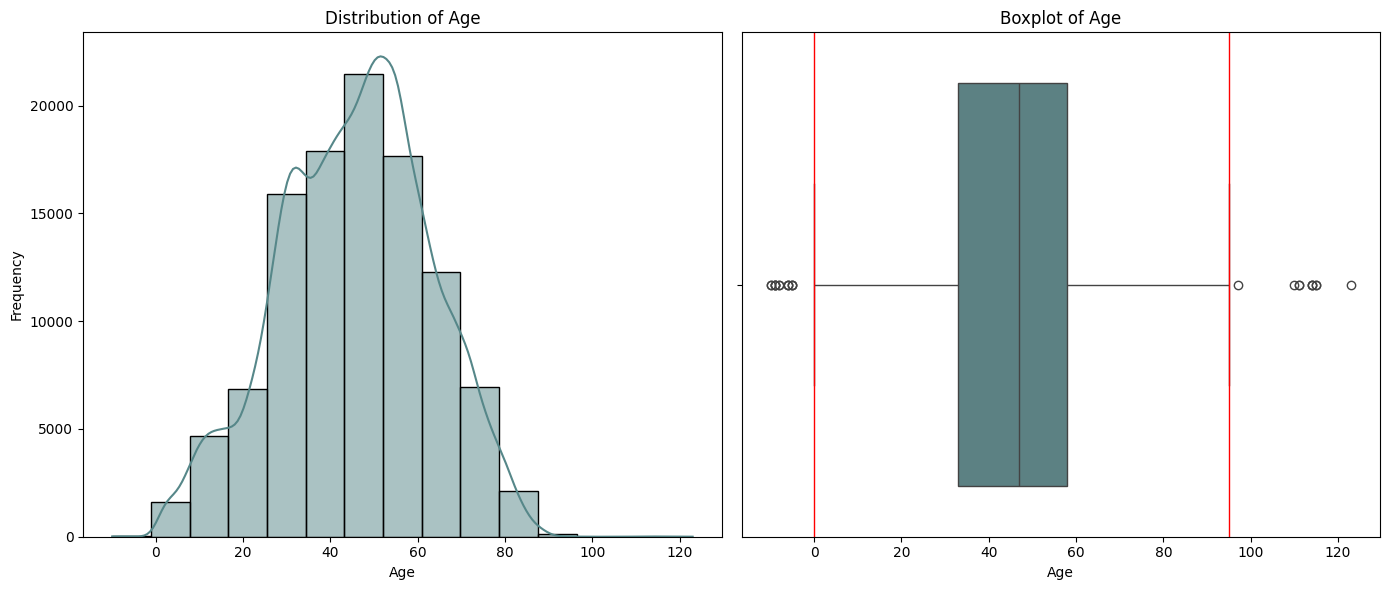

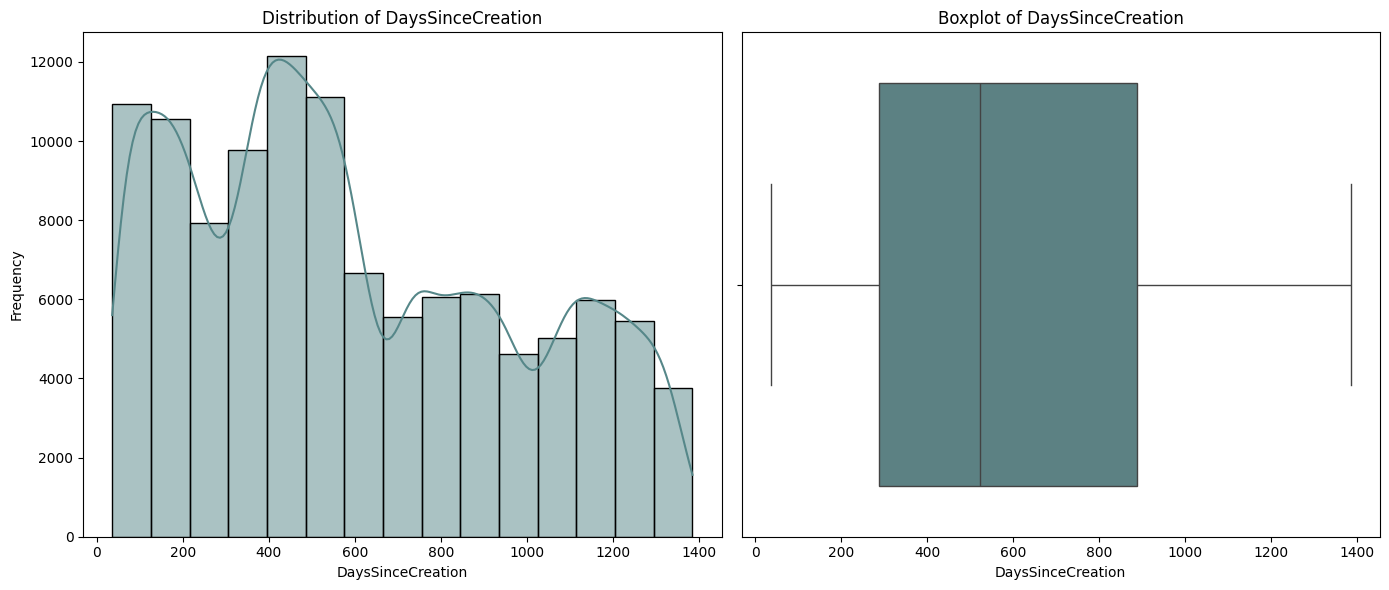

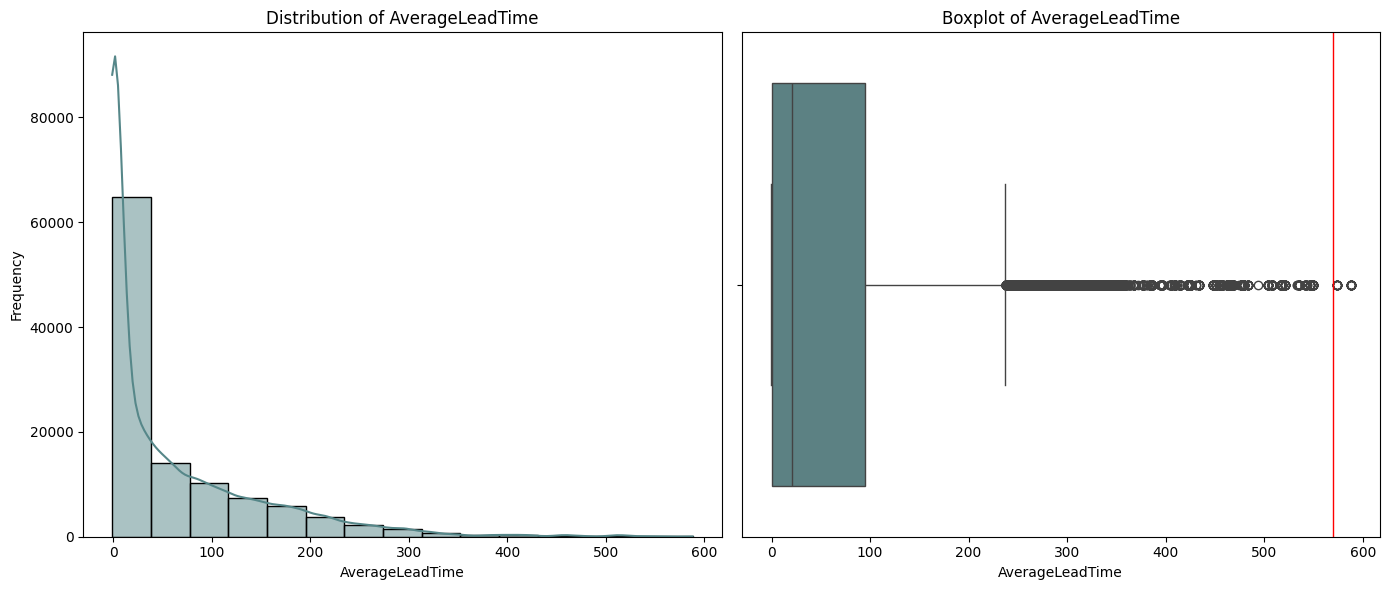

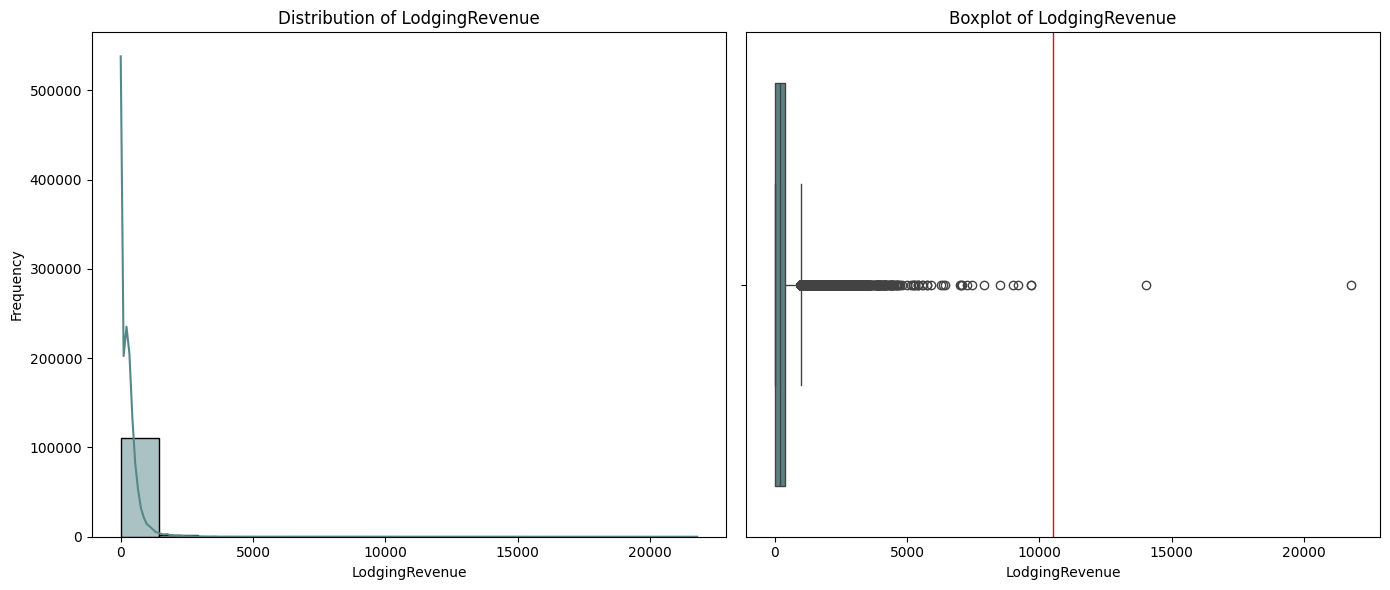

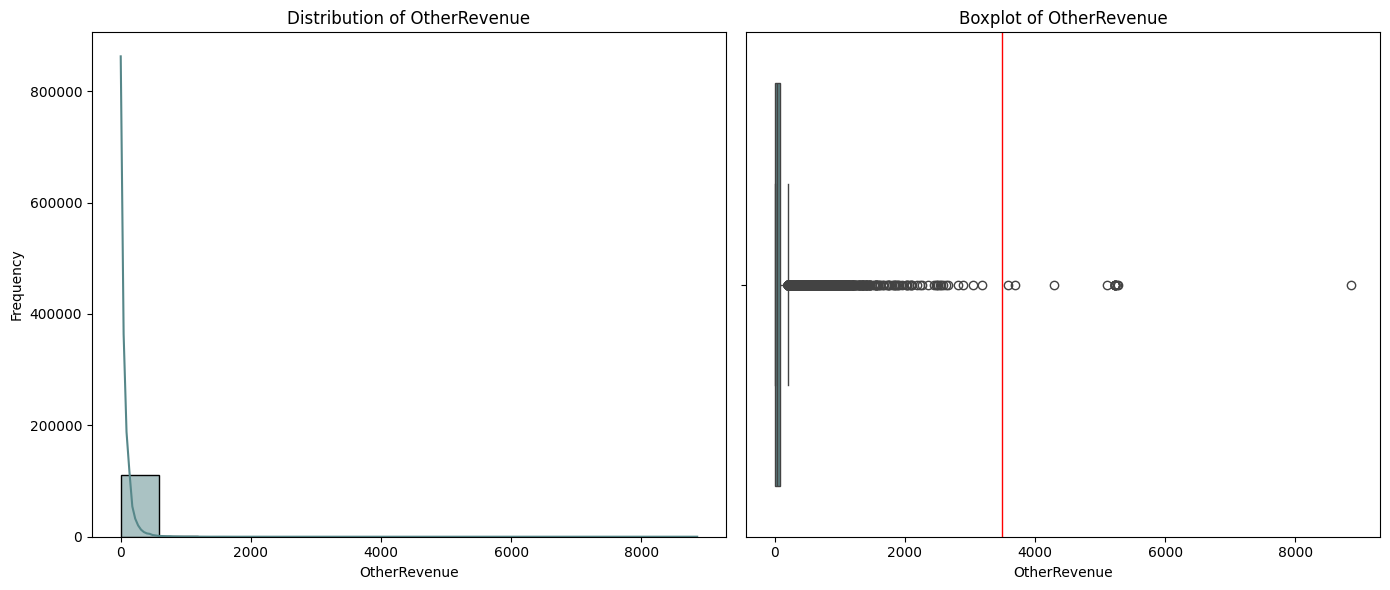

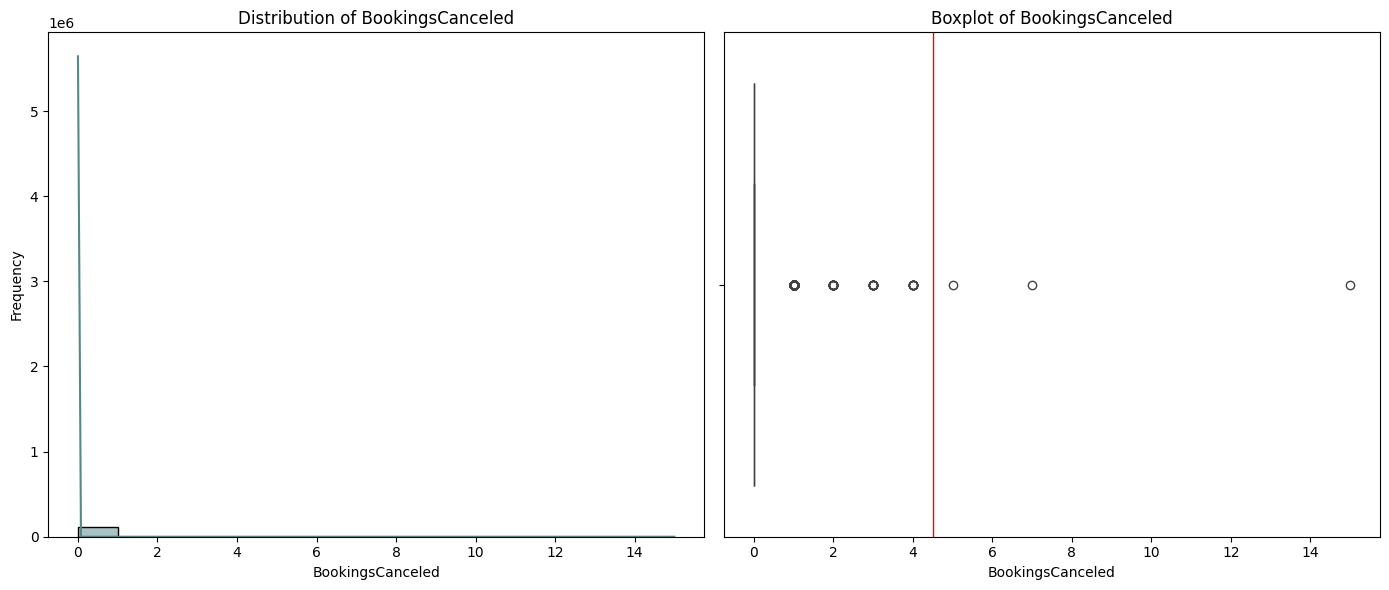

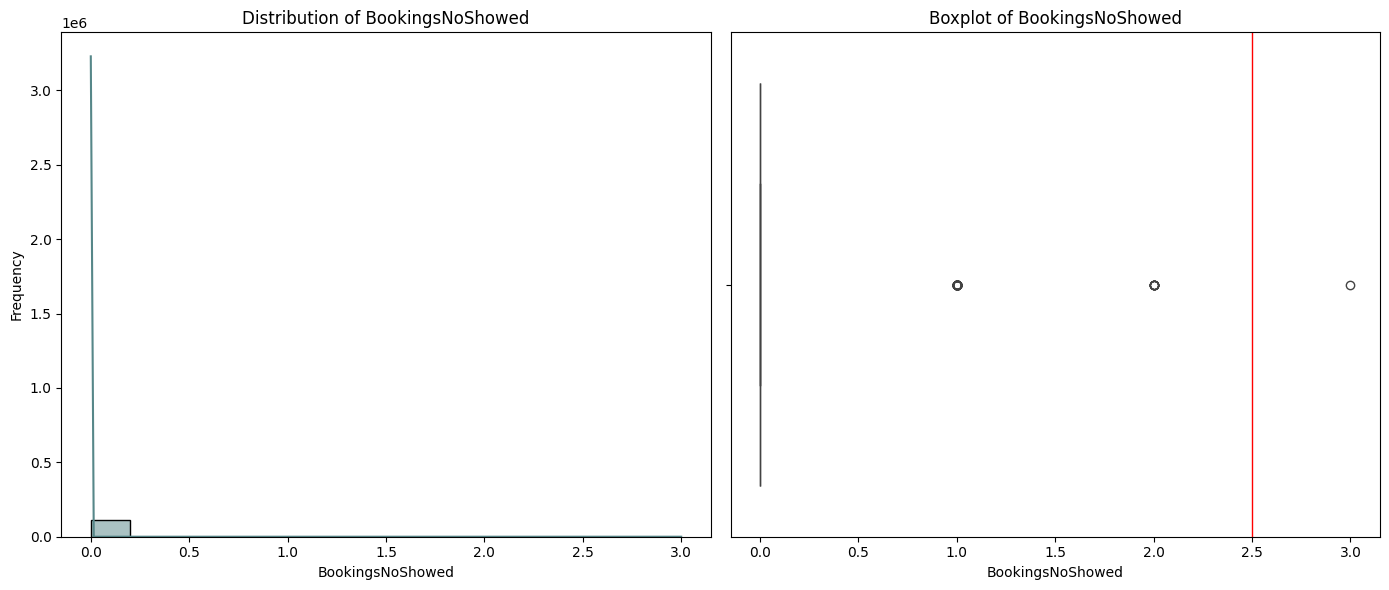

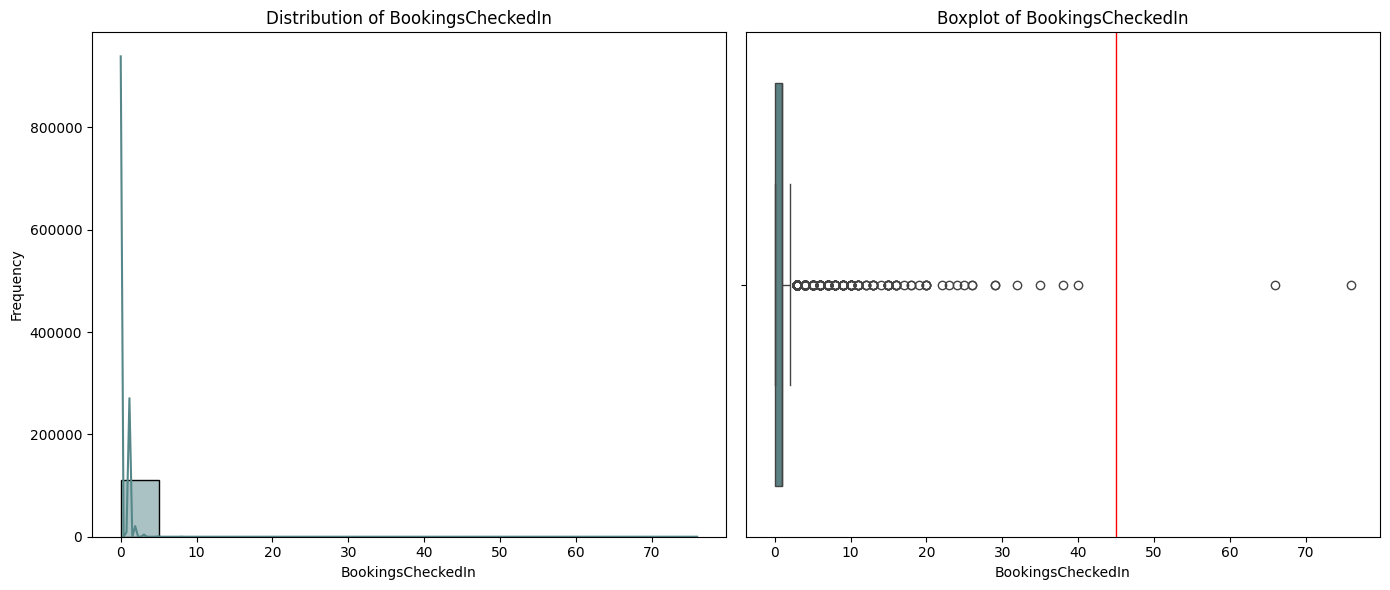

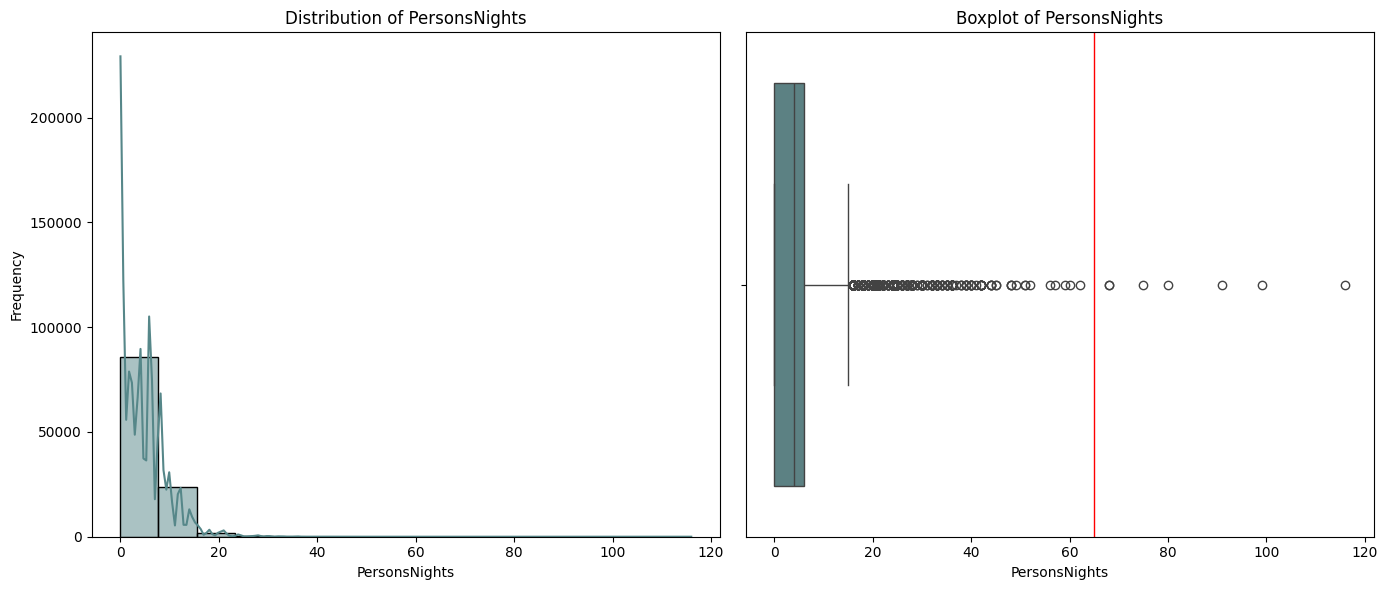

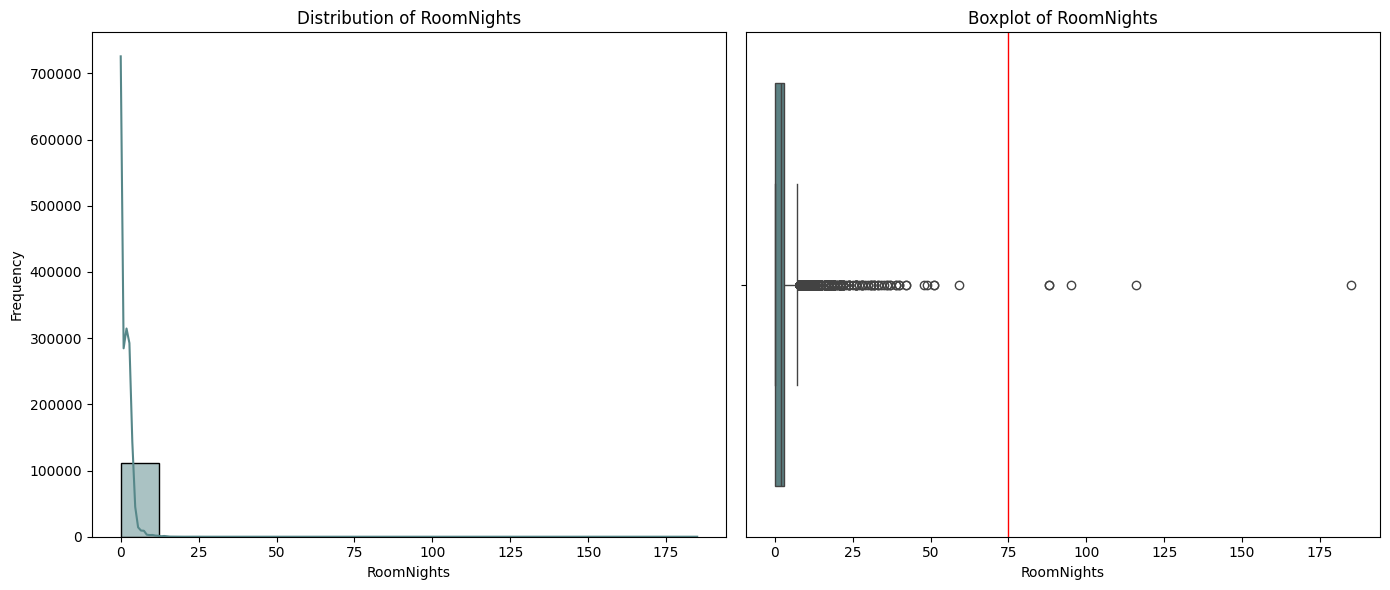

In [68]:
for n_column in range(len(num_cols)):
  f.plot_distribution_and_boxplot(df, num_cols[n_column],
                                  outliers_dict[num_cols[n_column]]['n_bins'],
                                  outliers_dict[num_cols[n_column]]['left_out'],
                                  outliers_dict[num_cols[n_column]]['right_out'])

### 3.4.2 Multivariate Outliers

# <span style="color: yellow;">Testing</span>

In [83]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

copy_df = df[num_cols].copy().dropna()

# Standardize the data (important!)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(copy_df)

# Initialize Isolation Forest
iso_forest = IsolationForest(
    contamination=0.02,  # Proportion of expected outliers
    random_state=42
)

# Fit the model and predict
outlier_preds = iso_forest.fit_predict(scaled_data)

# Add results to your DataFrame
copy_df['outlier'] = outlier_preds

# In Isolation Forest:
#   -1 means outlier
#    1 means inlier
copy_df['outlier'].value_counts()


outlier
 1    105409
-1      2152
Name: count, dtype: int64

# Export

In [ ]:
# df.to_csv('./treated_data.csv')